In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Project_Data.xlsx')
df.head(5)

Unnamed: 0           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0      PatID                  DOB     Gender    ICDCode   
1      31881  1954-01-01 00:00:00       Male     A01.01   
2      31881  1954-01-01 00:00:00       Male     A01.00   
3      30030  1986-11-15 00:00:00     Female        1.9   
4     174649  1989-01-04 00:00:00       Male      A01.4   

                       Unnamed: 4  
0                         ICDDesc  
1              Typhoid meningitis  
2      Typhoid fever, unspecified  
3                     Cholera NOS  
4  Paratyphoid fever, unspecified

In [3]:
df.columns = df.iloc[0]
df = df[1:]

In [4]:
df = df.reset_index(drop=True)
df.sample()

0     PatID                  DOB Gender ICDCode       ICDDesc
1211  59333  1975-01-01 00:00:00   Male   565.1  Anal fistula

In [22]:
df.shape

(2000, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PatID      2000 non-null   object
 1   DOB        2000 non-null   object
 2   Gender     2000 non-null   object
 3   ICDCode    2000 non-null   object
 4   ICDDesc    2000 non-null   object
 5   Age        2000 non-null   int64 
 6   age_group  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [5]:
from datetime import datetime, date


In [6]:
ad data and make Graph presentations by grouping Age having common ICDs.
Question2: Data for Age Between 0-15, 16-35, 35< to get which common ICD are present .df['DOB'] = pd.to_datetime(df['DOB']).dt.date

In [7]:
# figuring out age
def age(born):
    born = datetime.strptime(str(born), "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  

In [8]:
df['Age'] = df['DOB'].apply(age)


In [9]:
age_groups = {
    '0-15' : (0,15),
    '16-20': (16,20),
    '20-25': (20,25),
    '25-30':(25,30),
    '30-35':(30,35),
    '35+':(36, float('inf'))
}

def get_age_group(age):
    for group, (lower,upper) in age_groups.items():
        if lower <= age <= upper:
            return group

In [10]:
# age_groups = {
#     '0-15': (0, 15),
#     '16-35': (16, 35),
#     '35+': (36, float('inf'))
# }

# def get_age_group(age):
#     for group, (lower, upper) in age_groups.items():
#         if lower <= age <= upper:
#             return group

In [11]:
df['age_group'] = df['Age'].apply(get_age_group)

In [12]:
# task1-  

In [13]:
new = df.groupby(['Age', 'ICDCode','ICDDesc'])['PatID'].count().reset_index()

In [14]:
new.rename(columns={'PatID' : 'count'}, inplace = True)

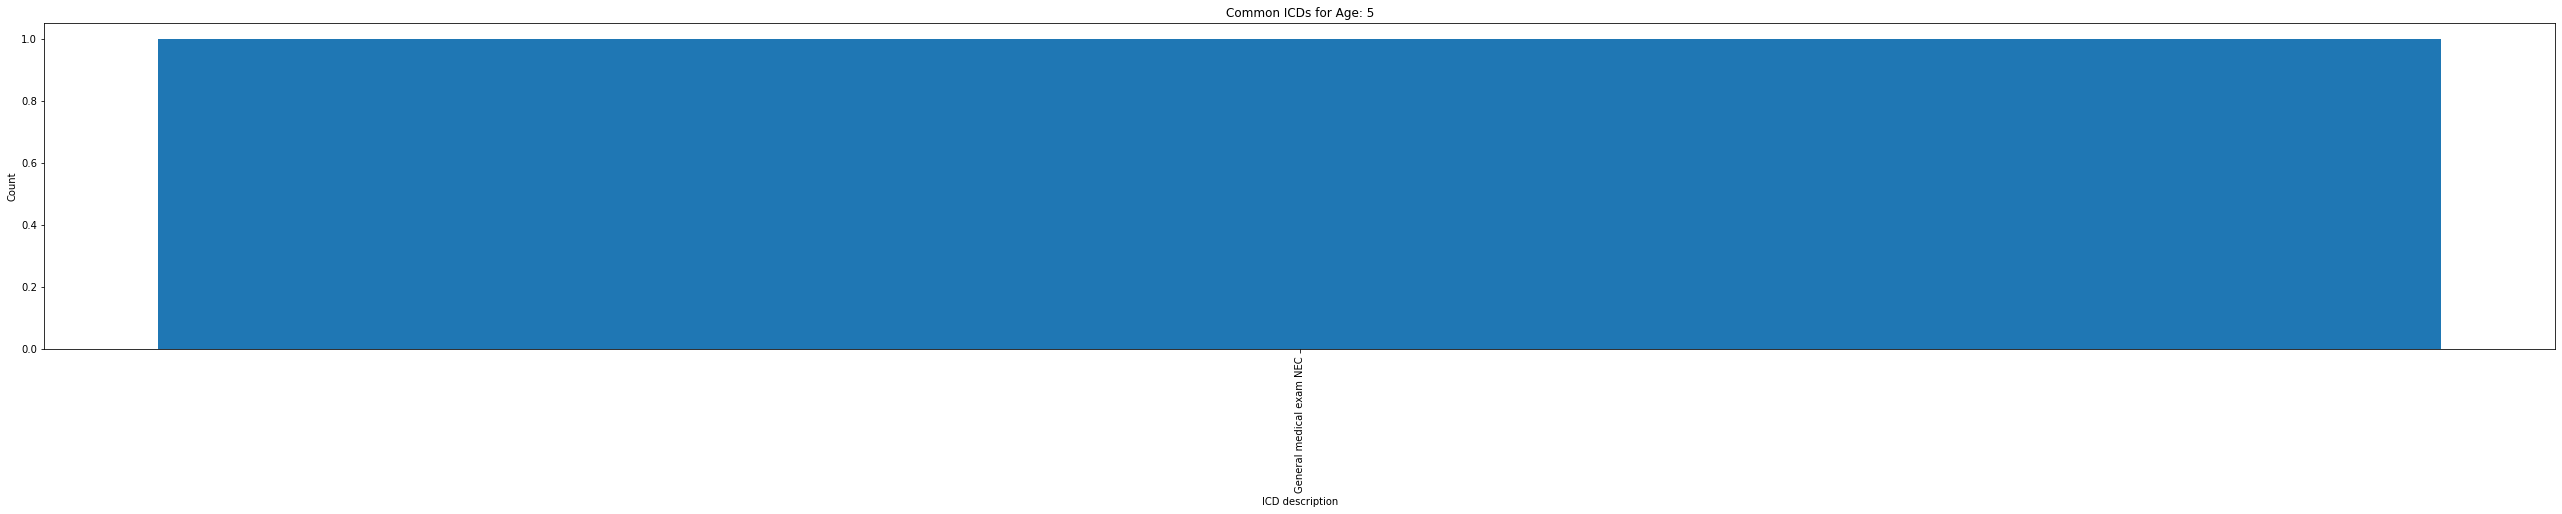

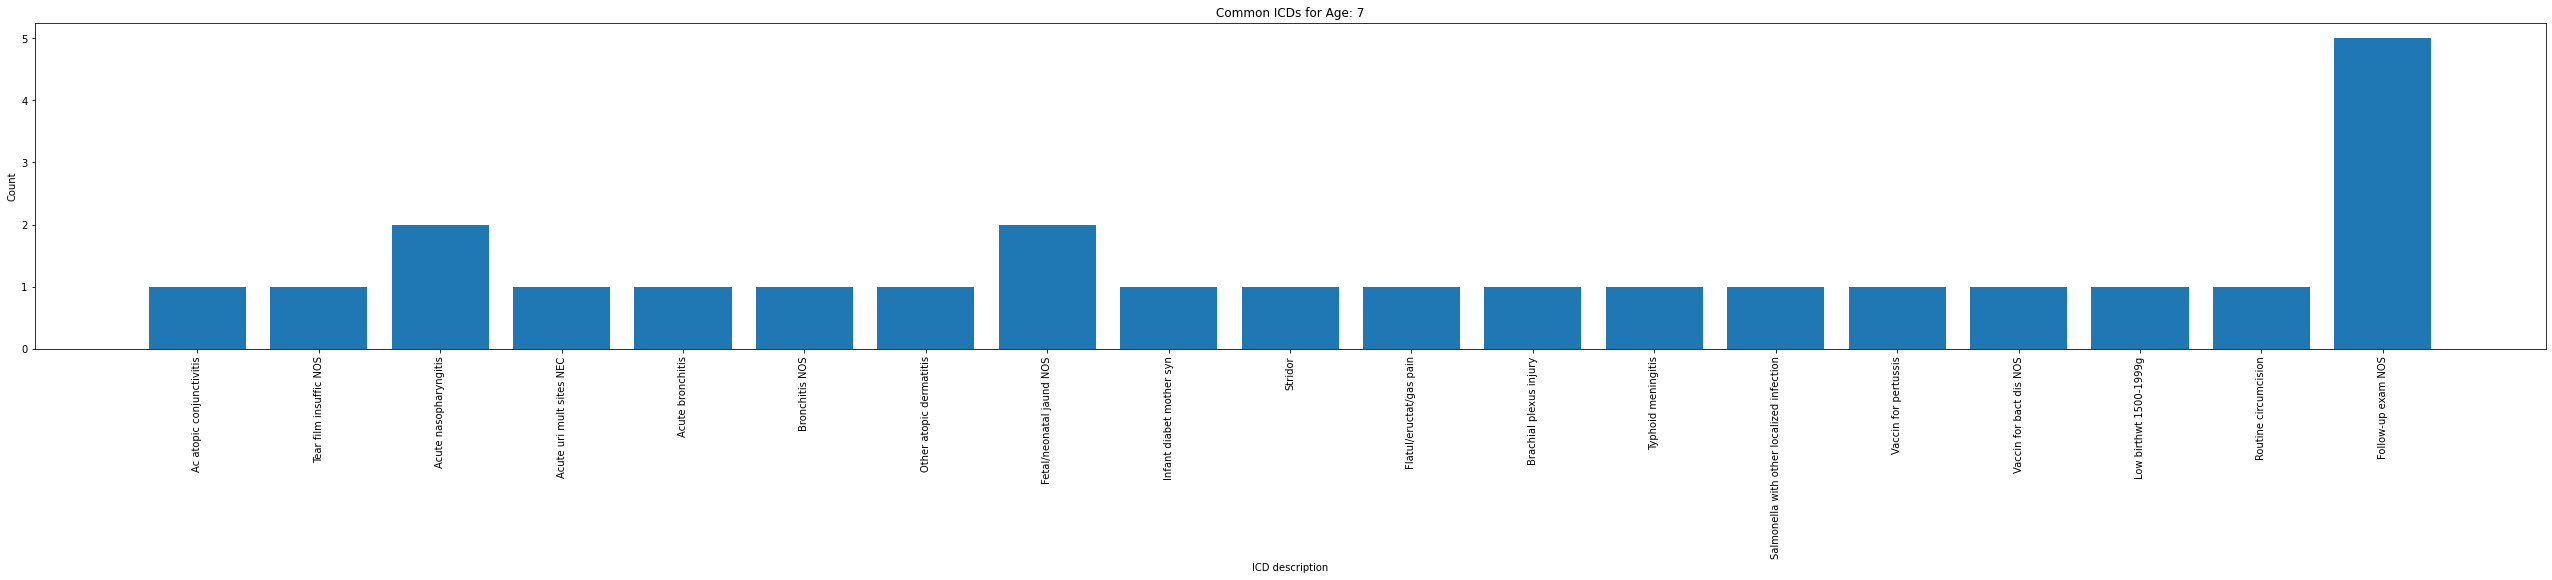

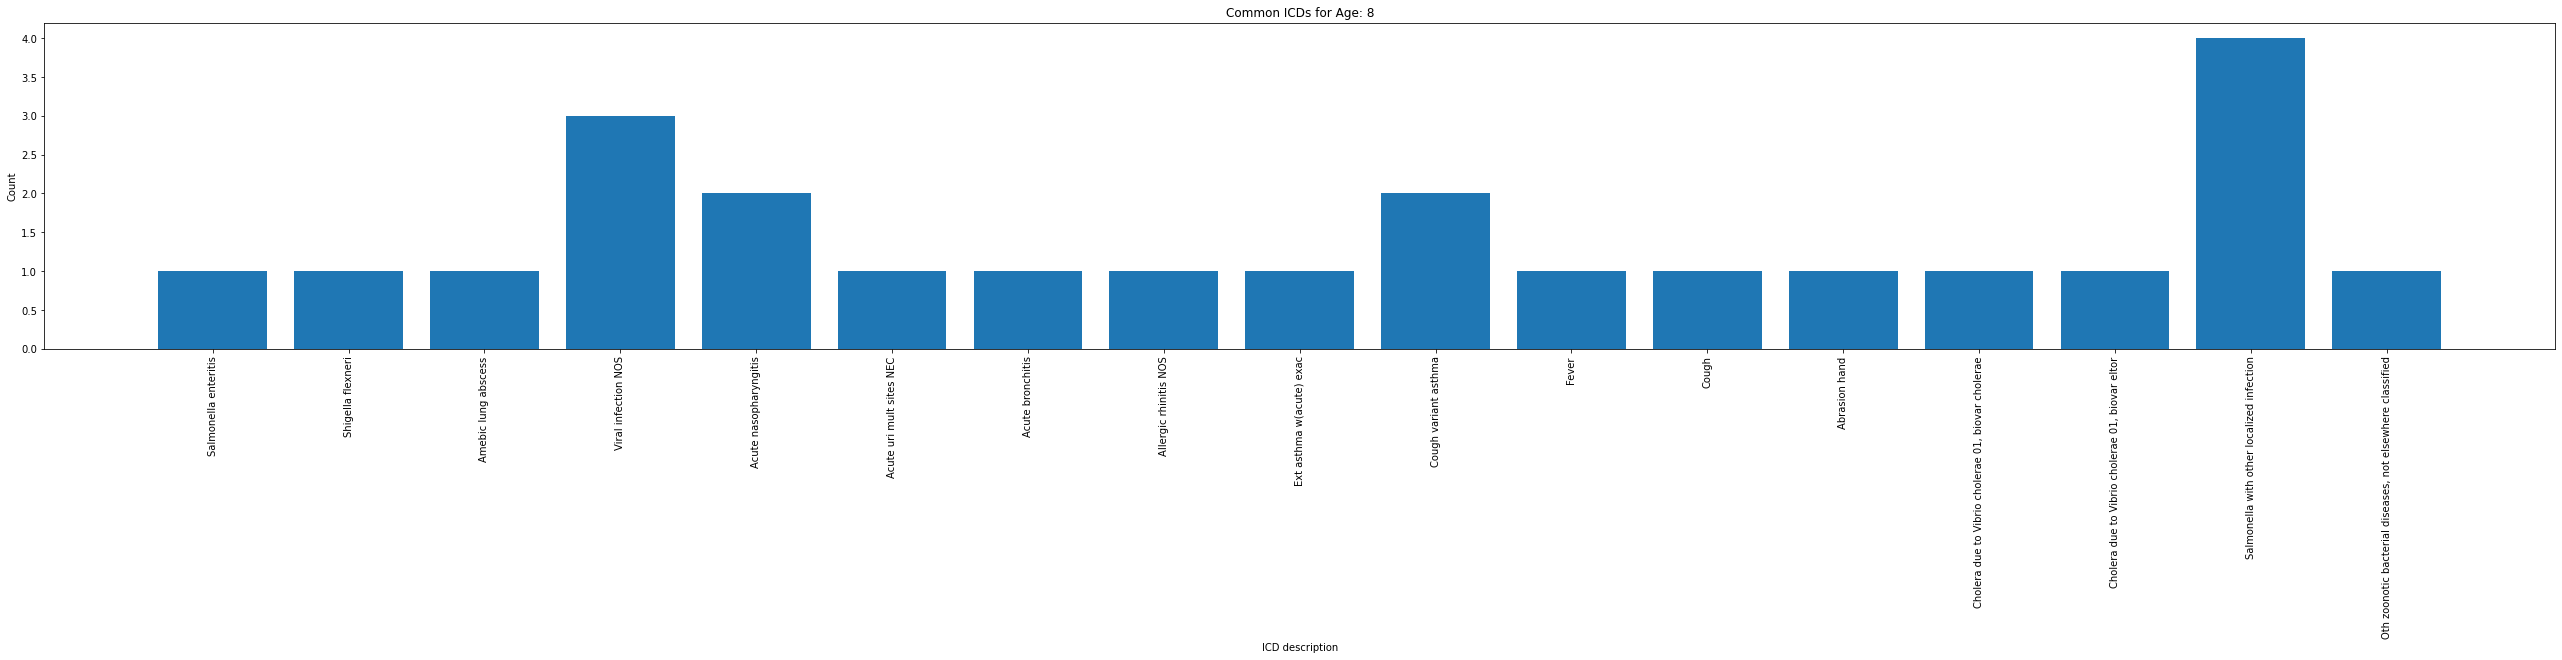

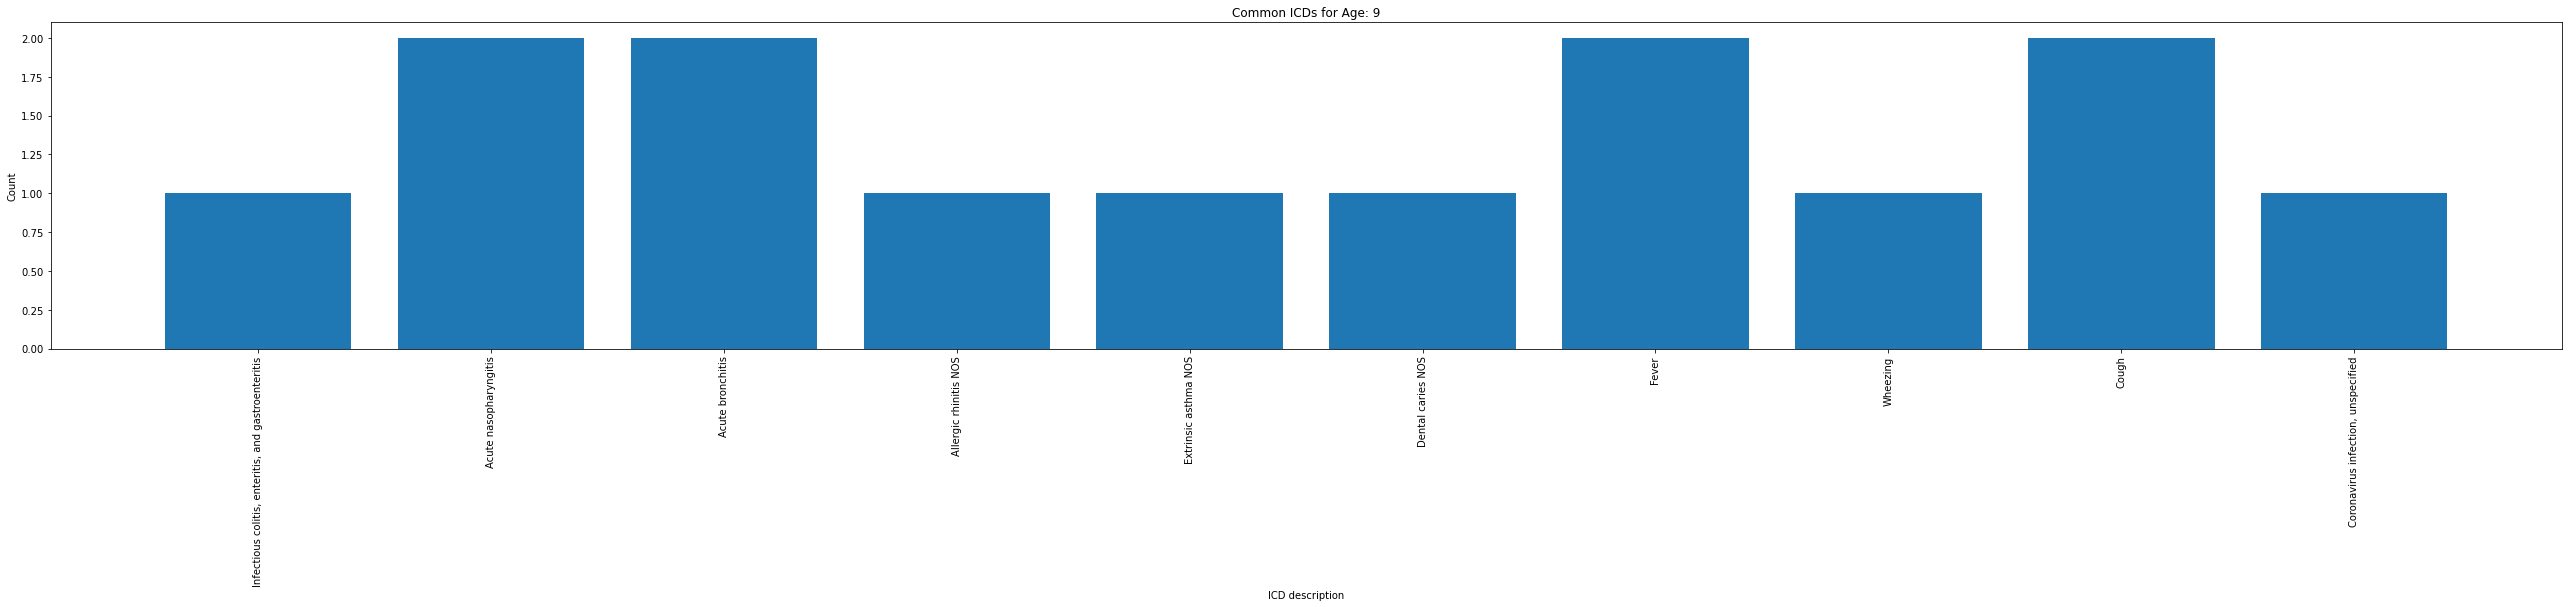

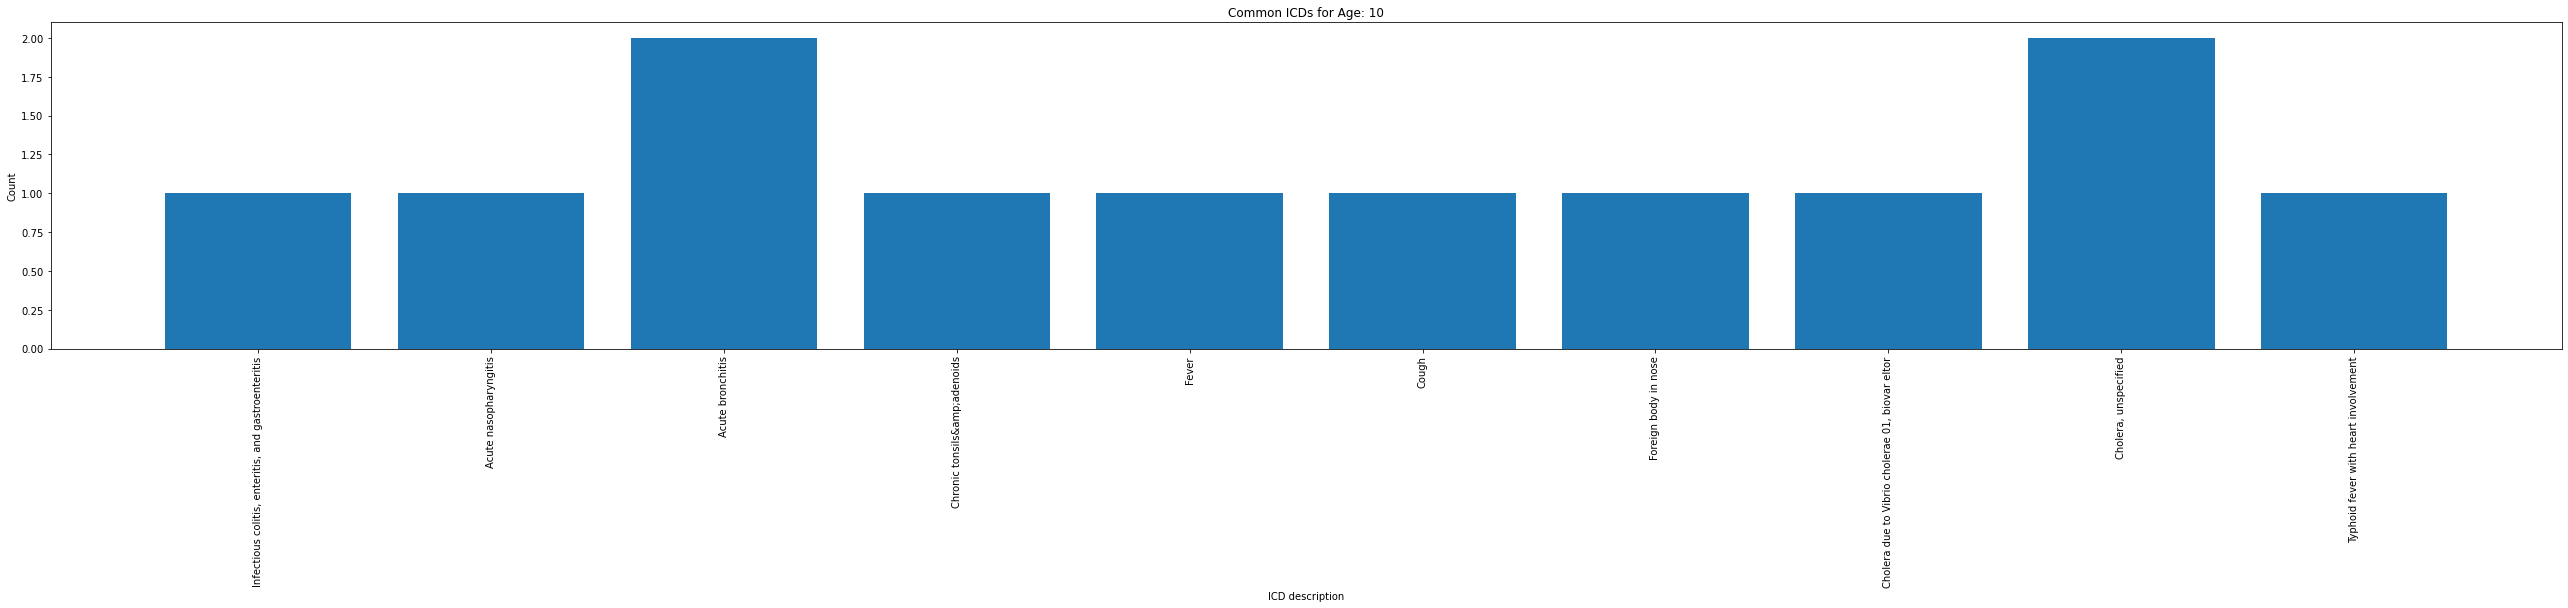

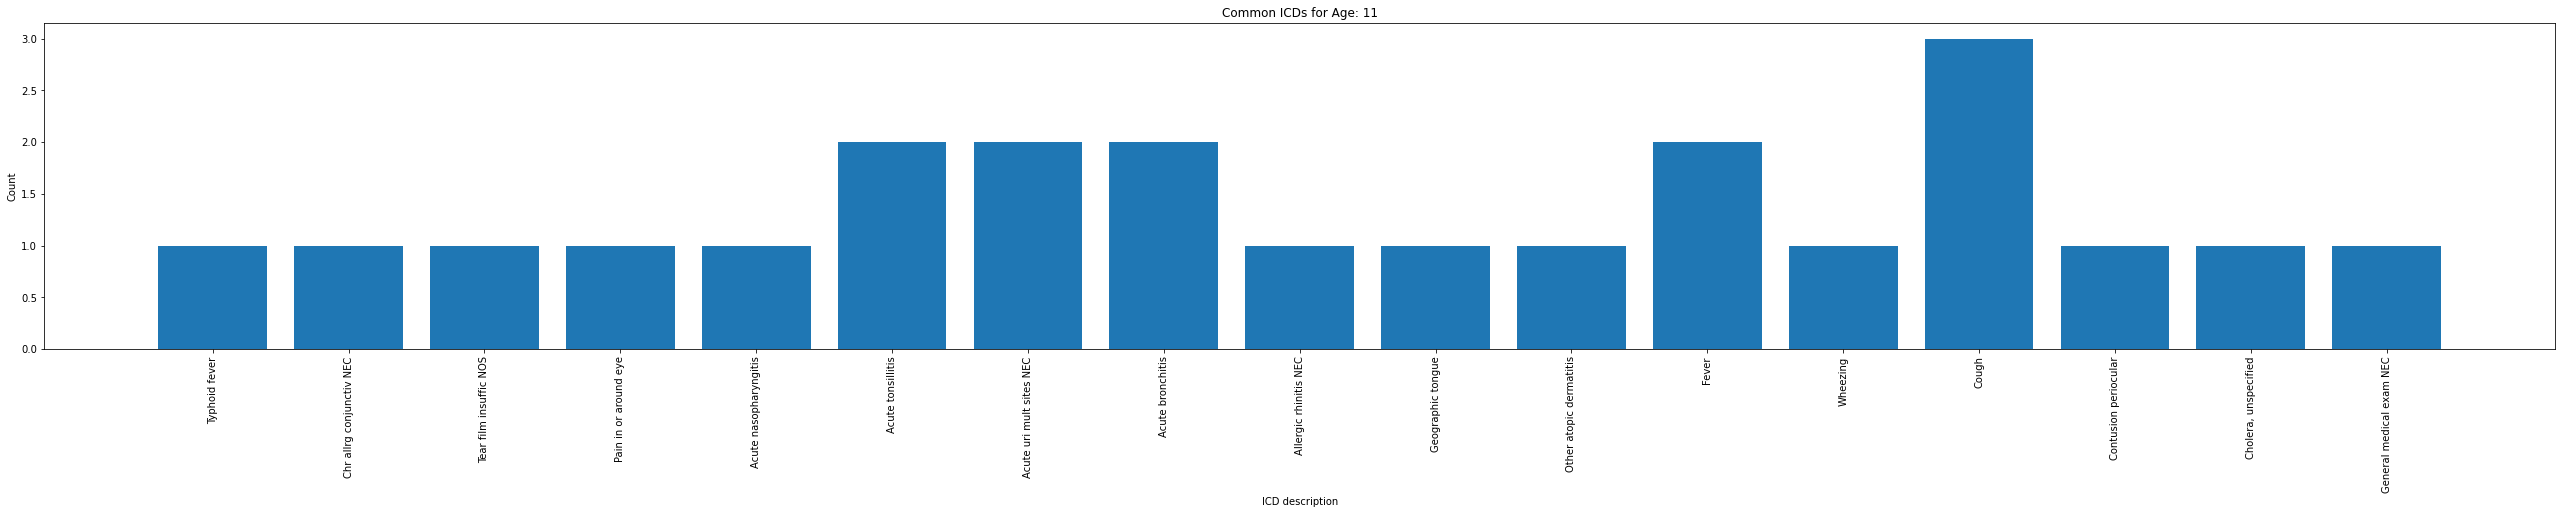

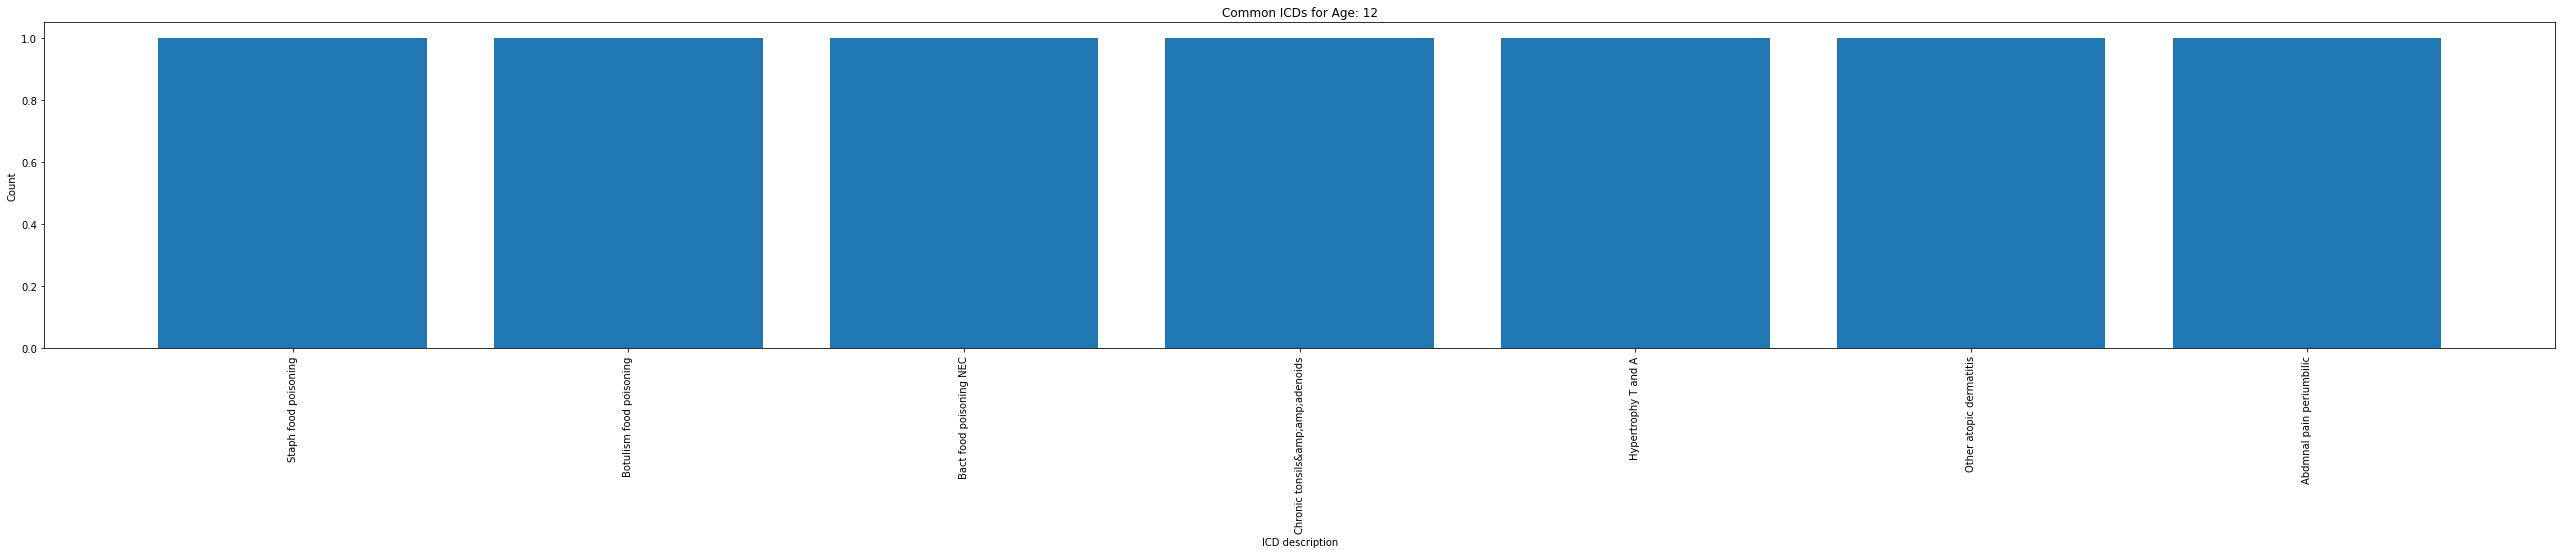

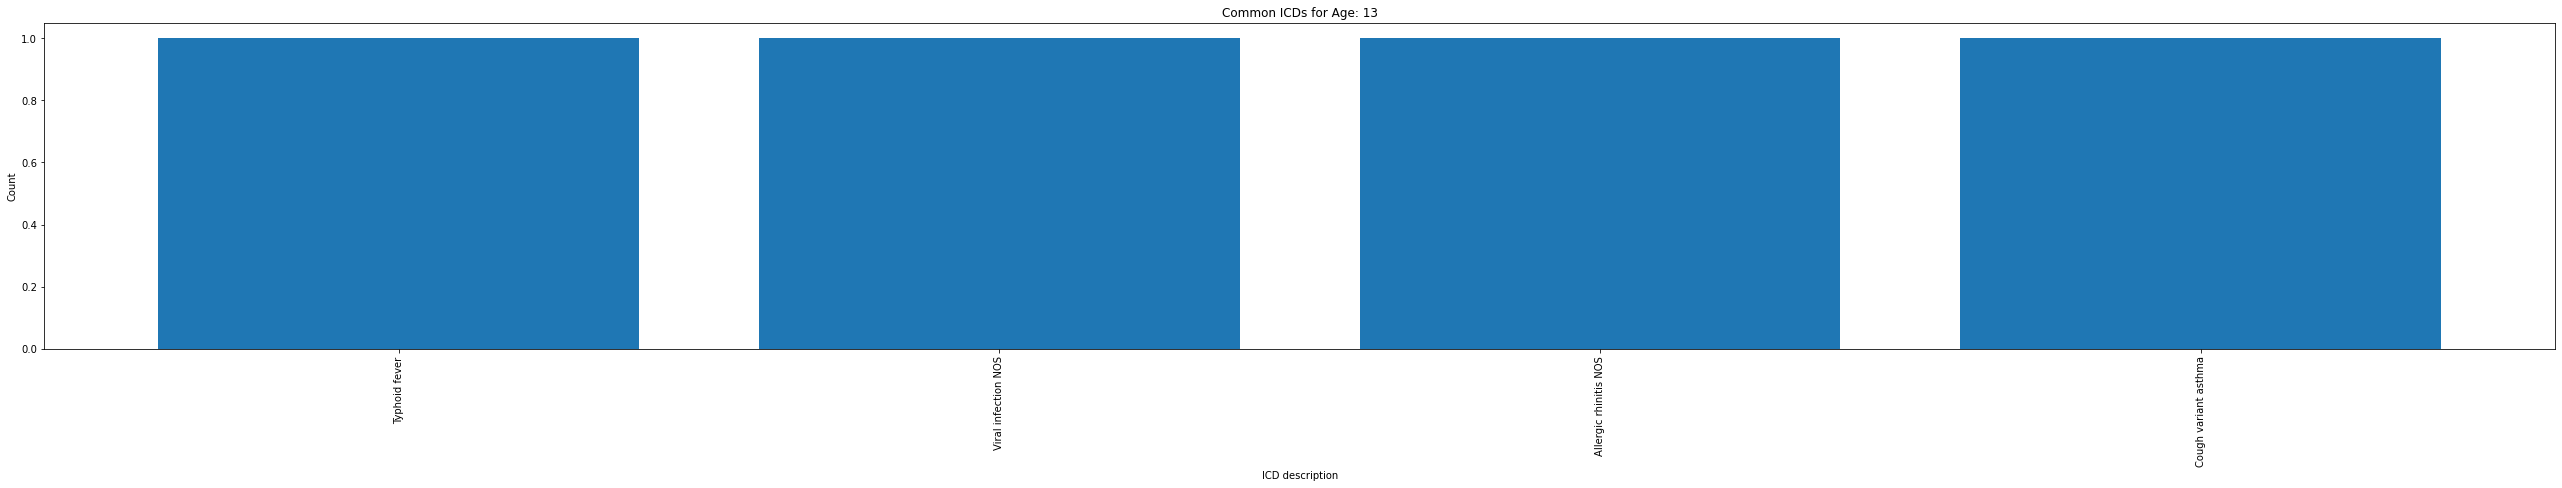

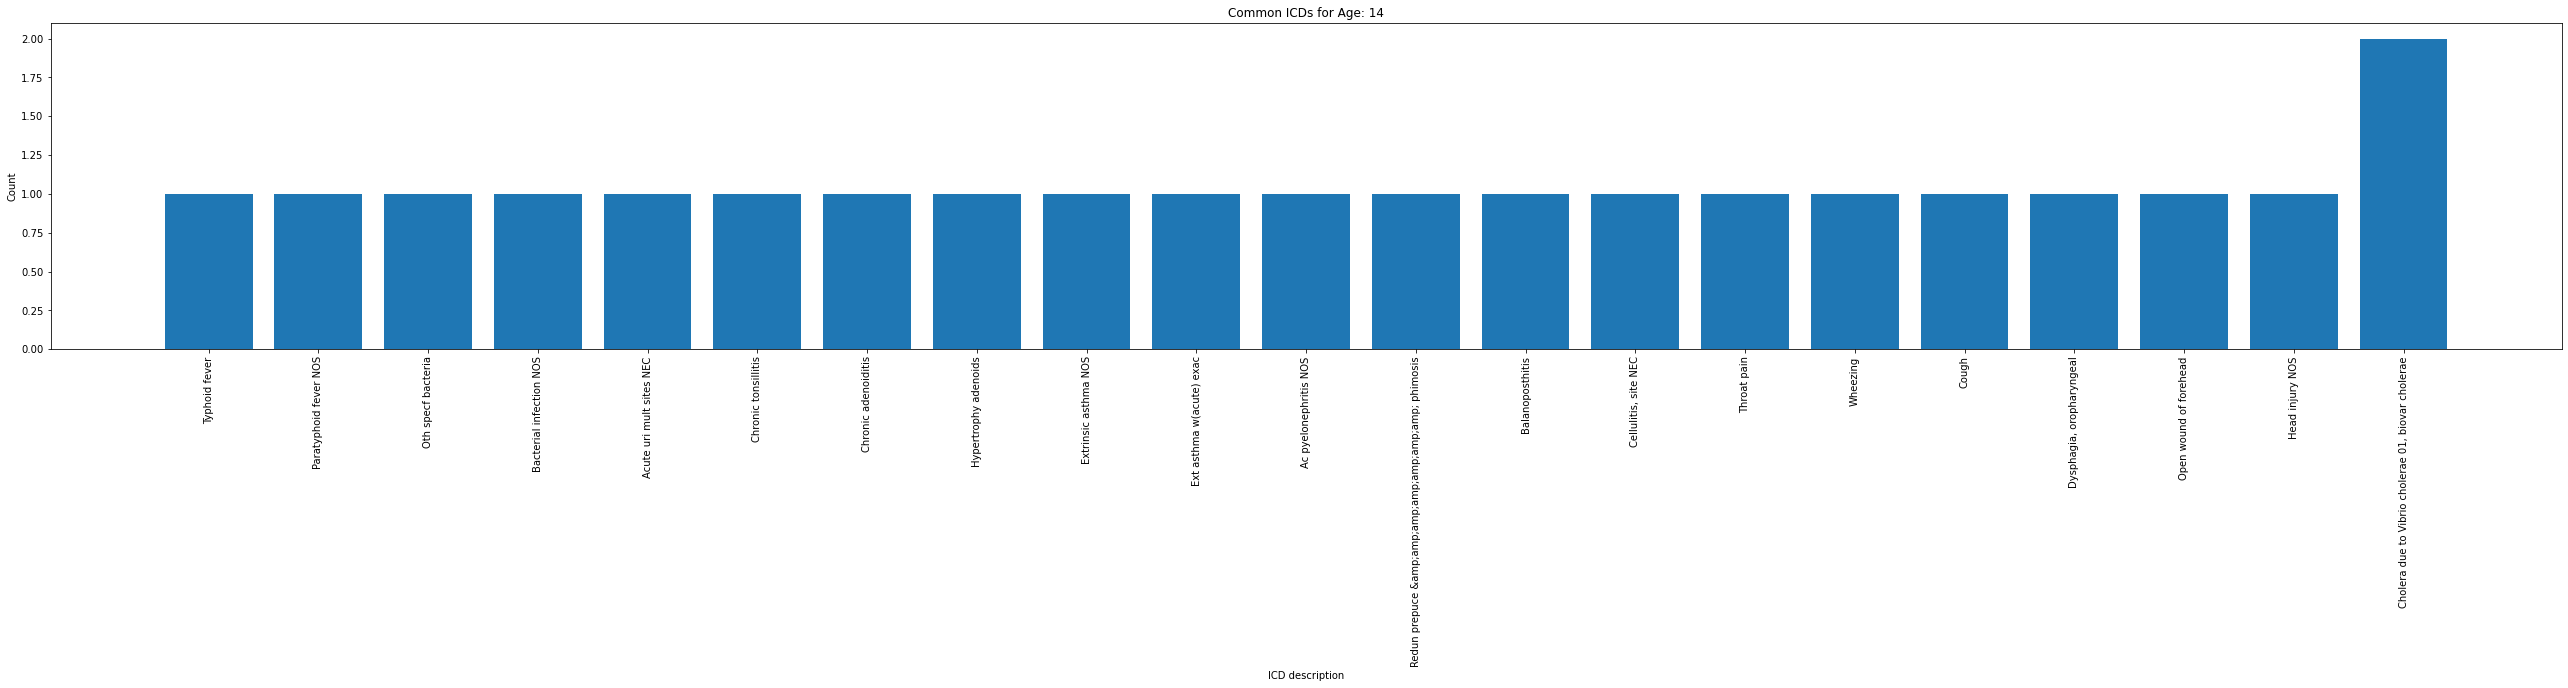

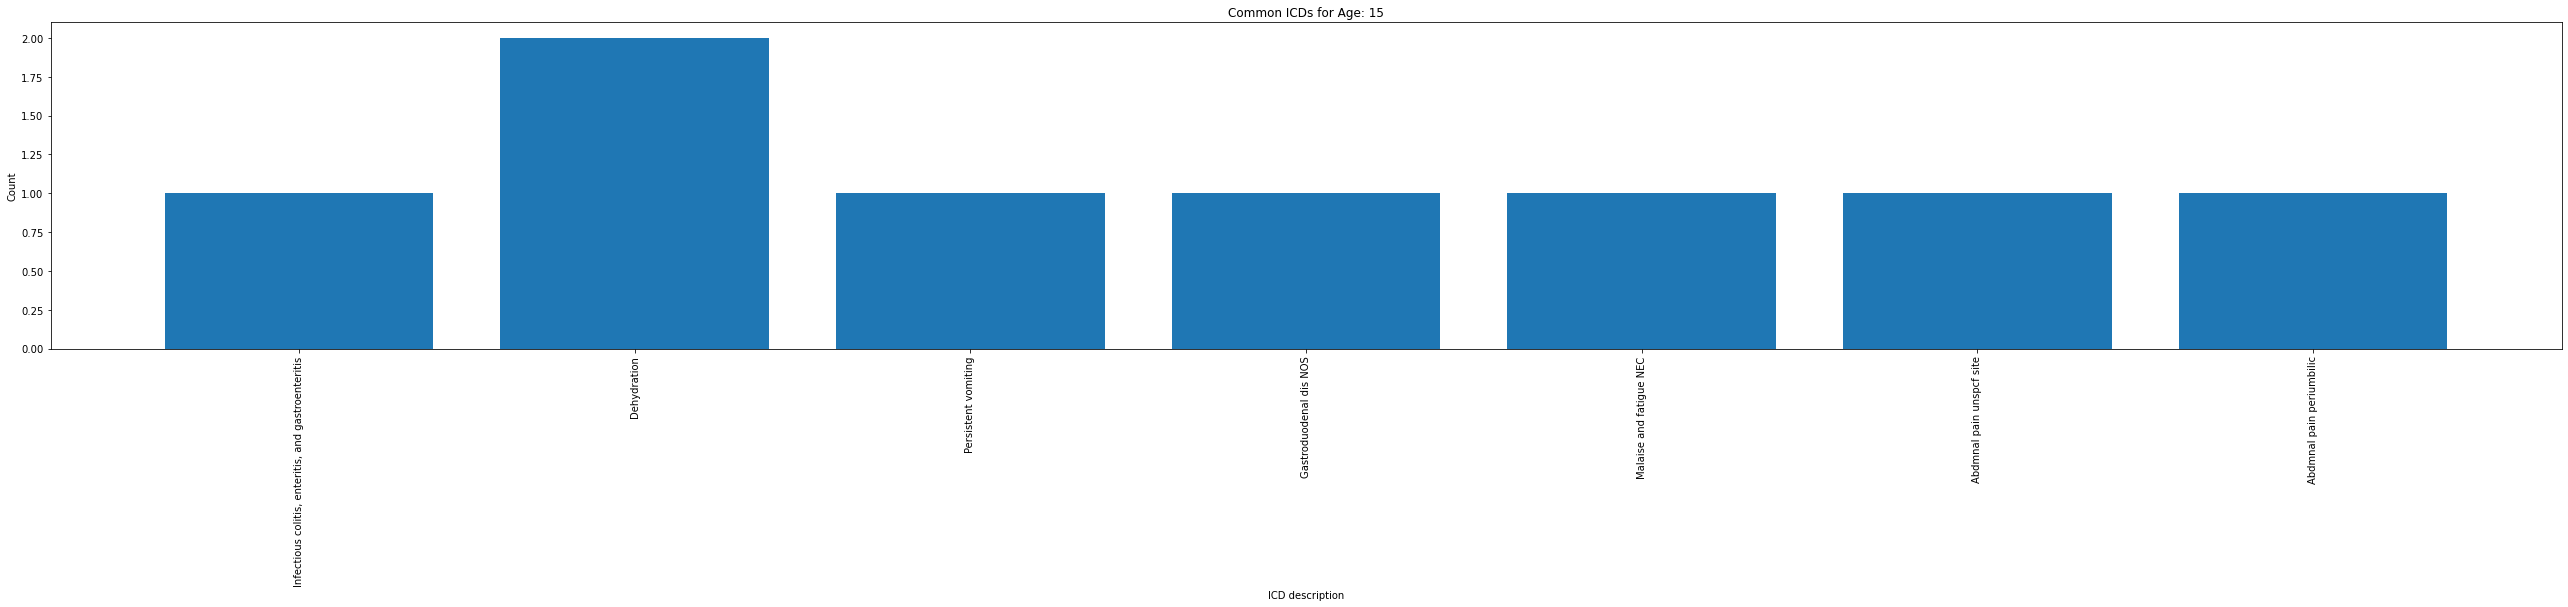

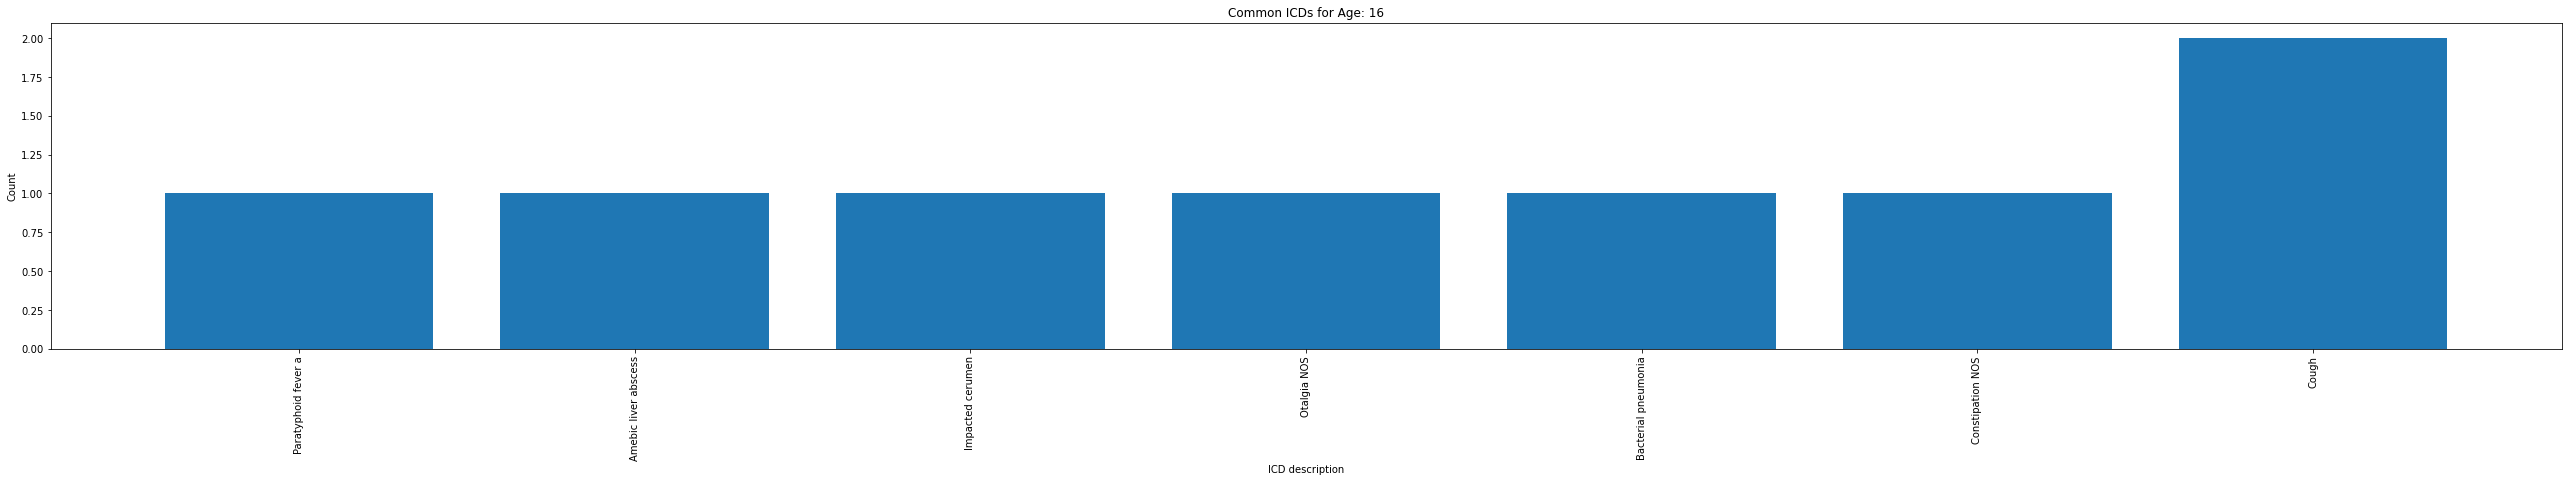

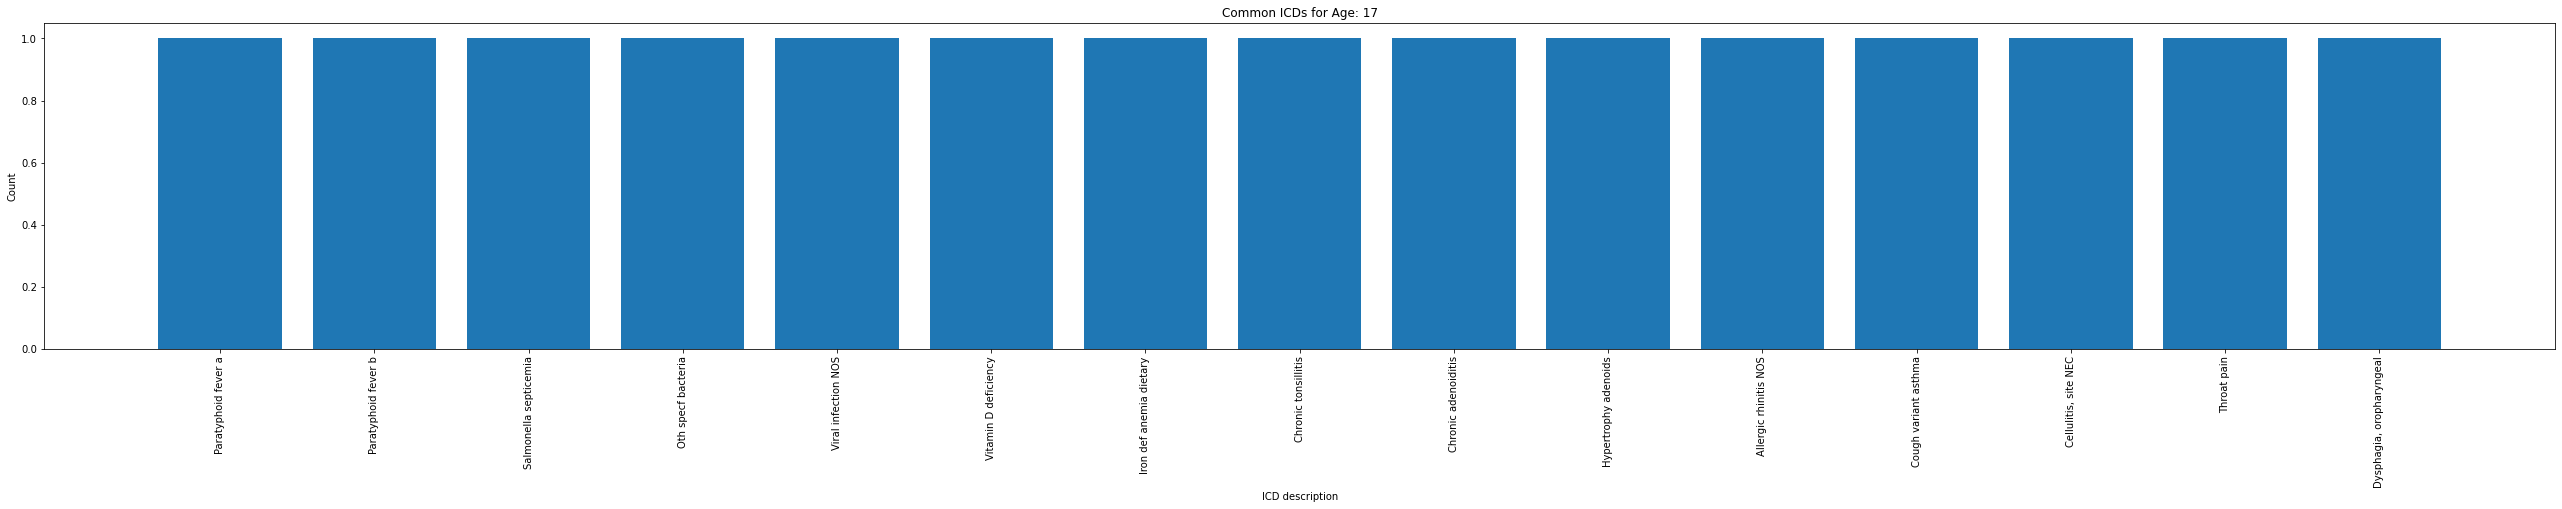

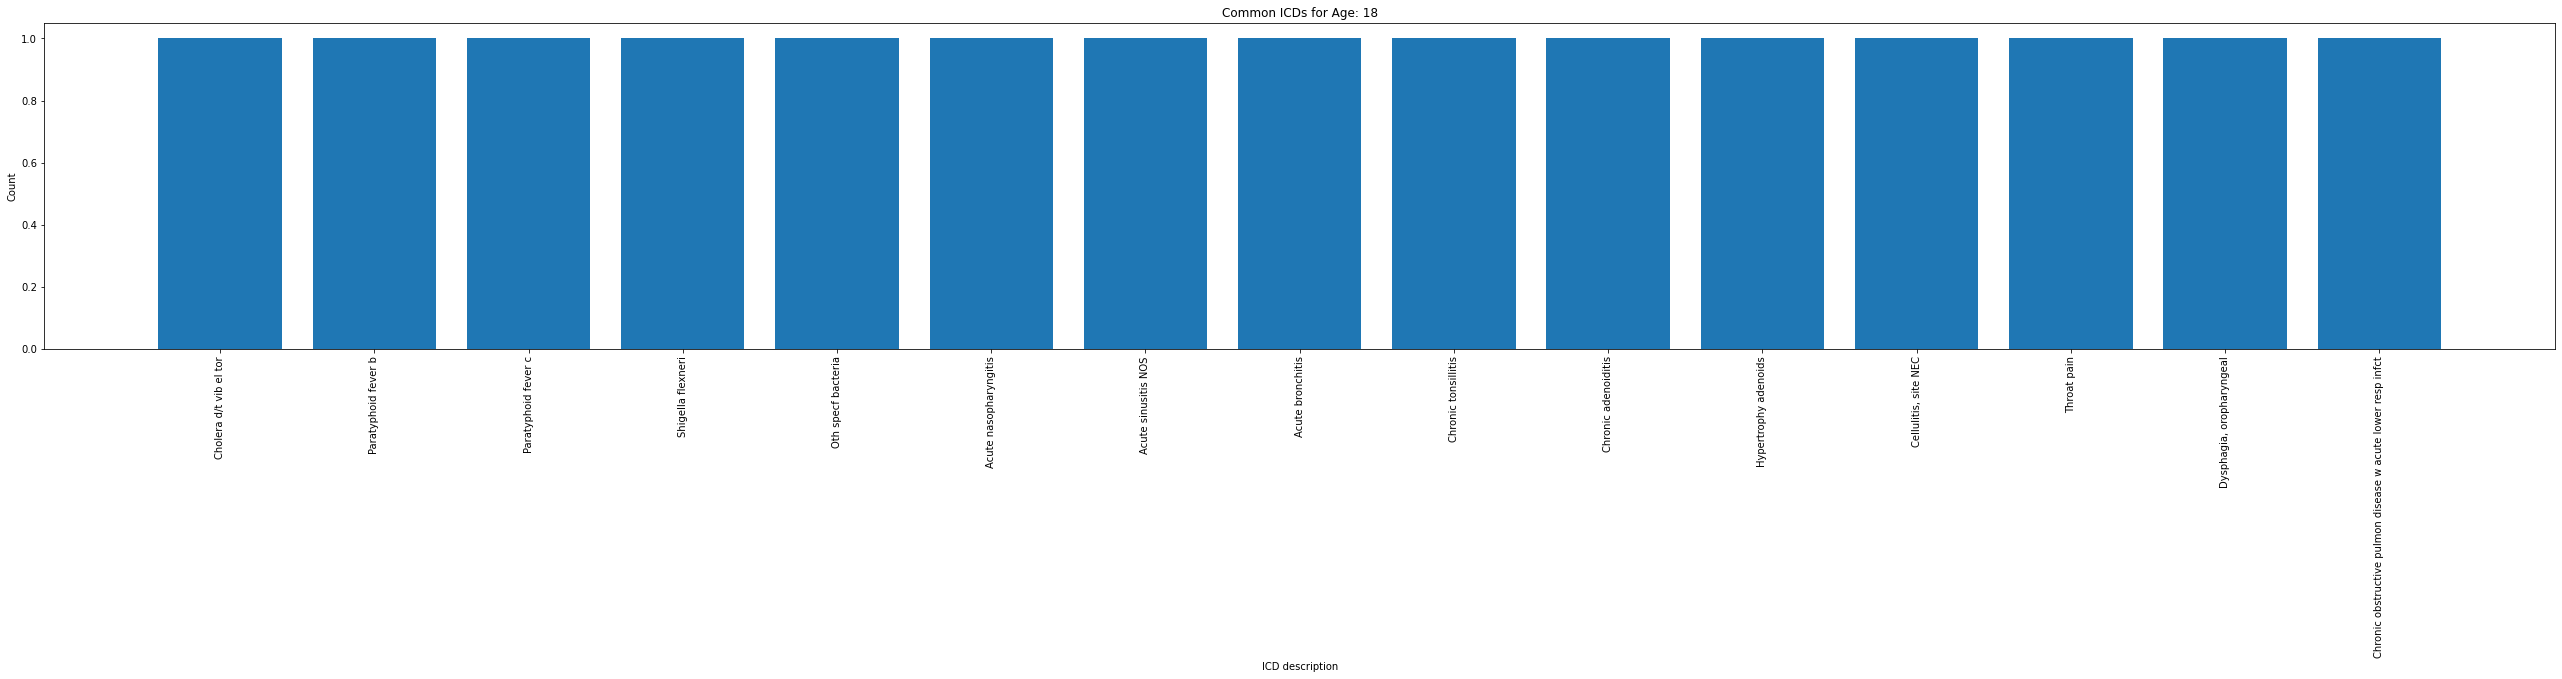

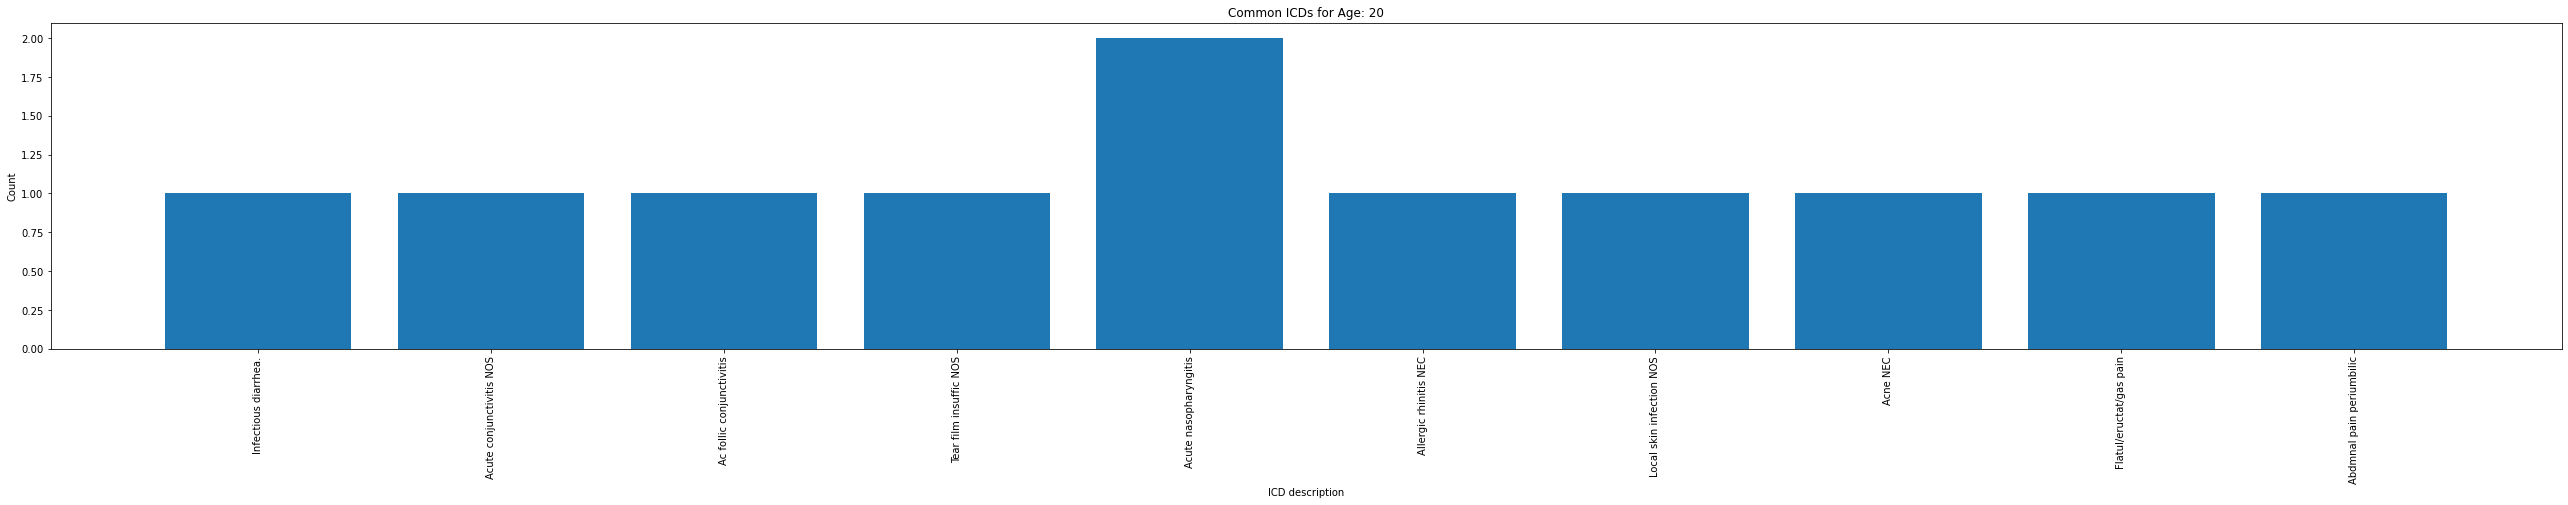

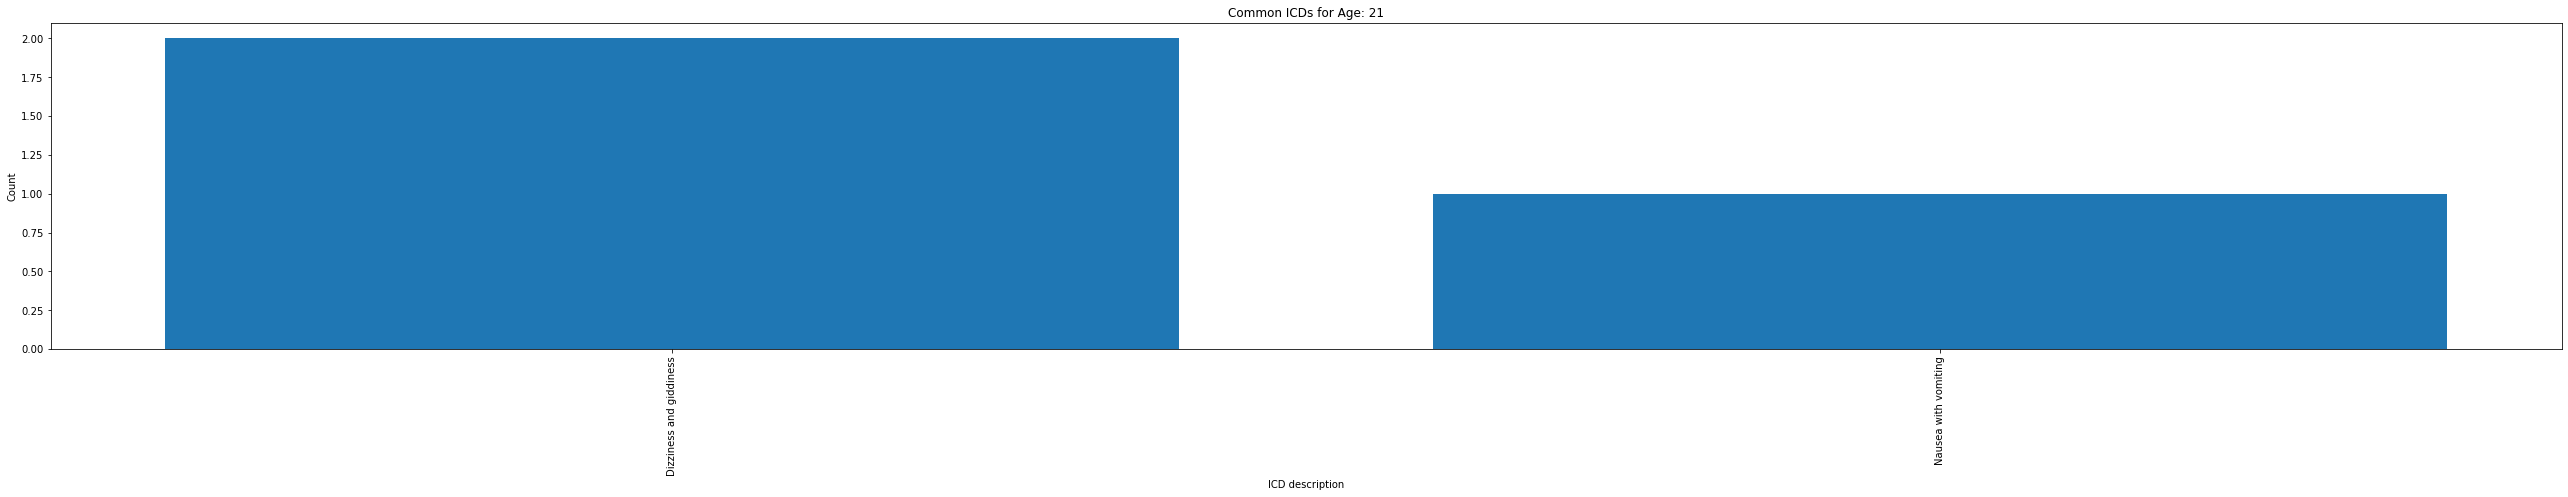

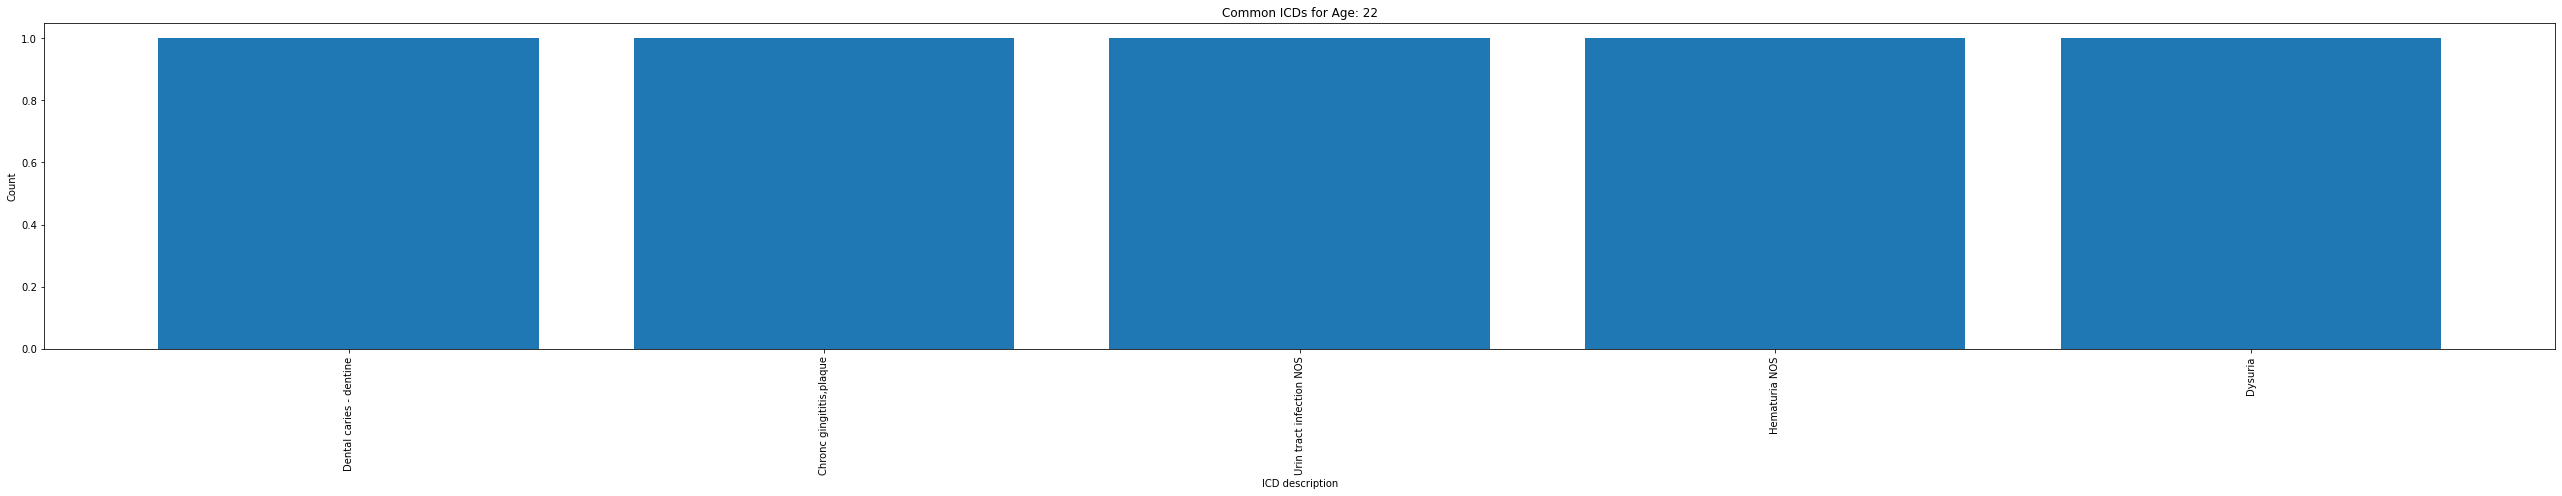

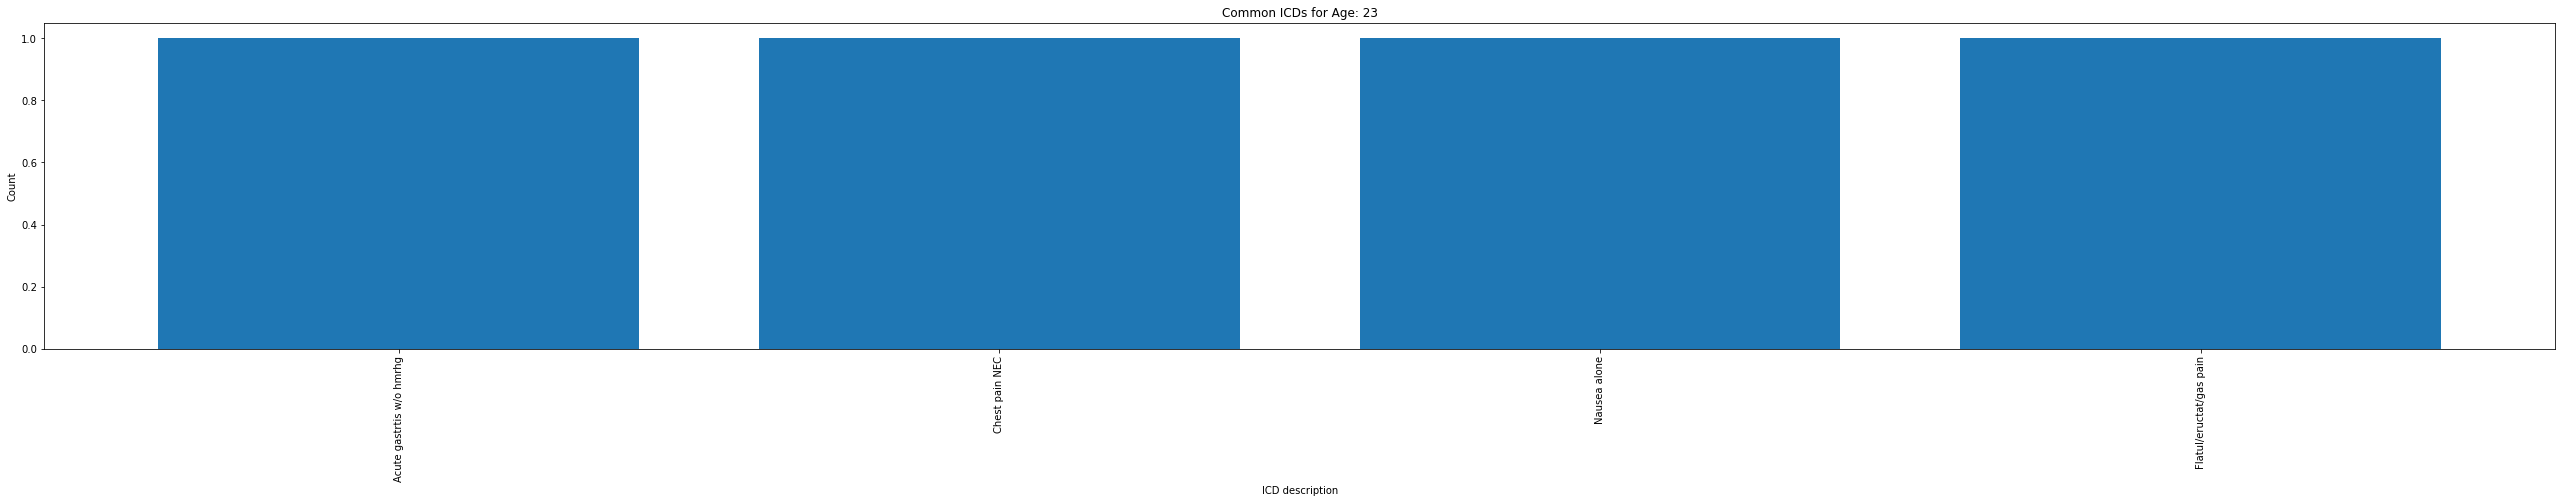

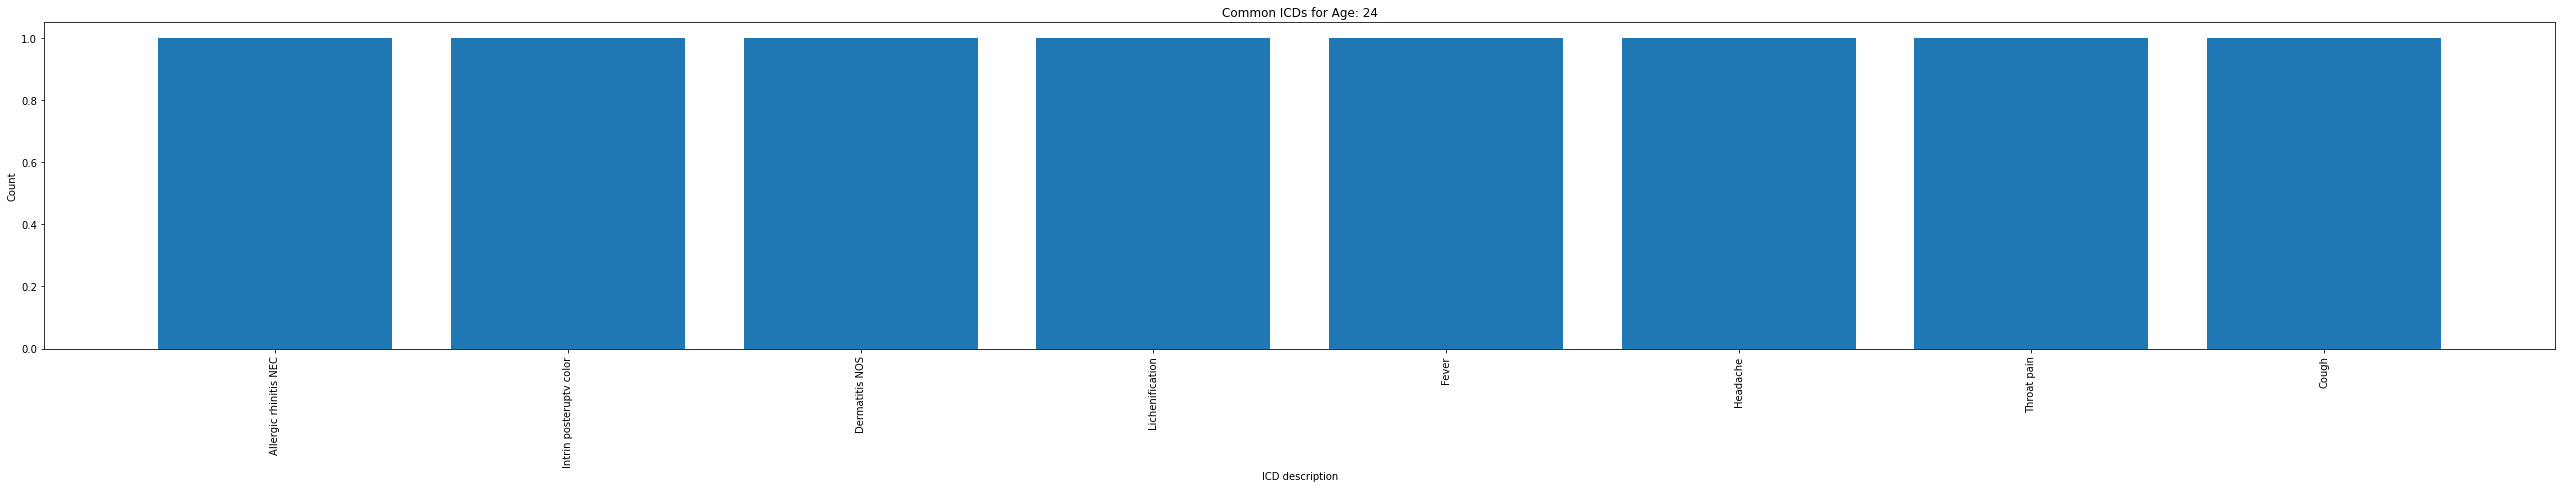

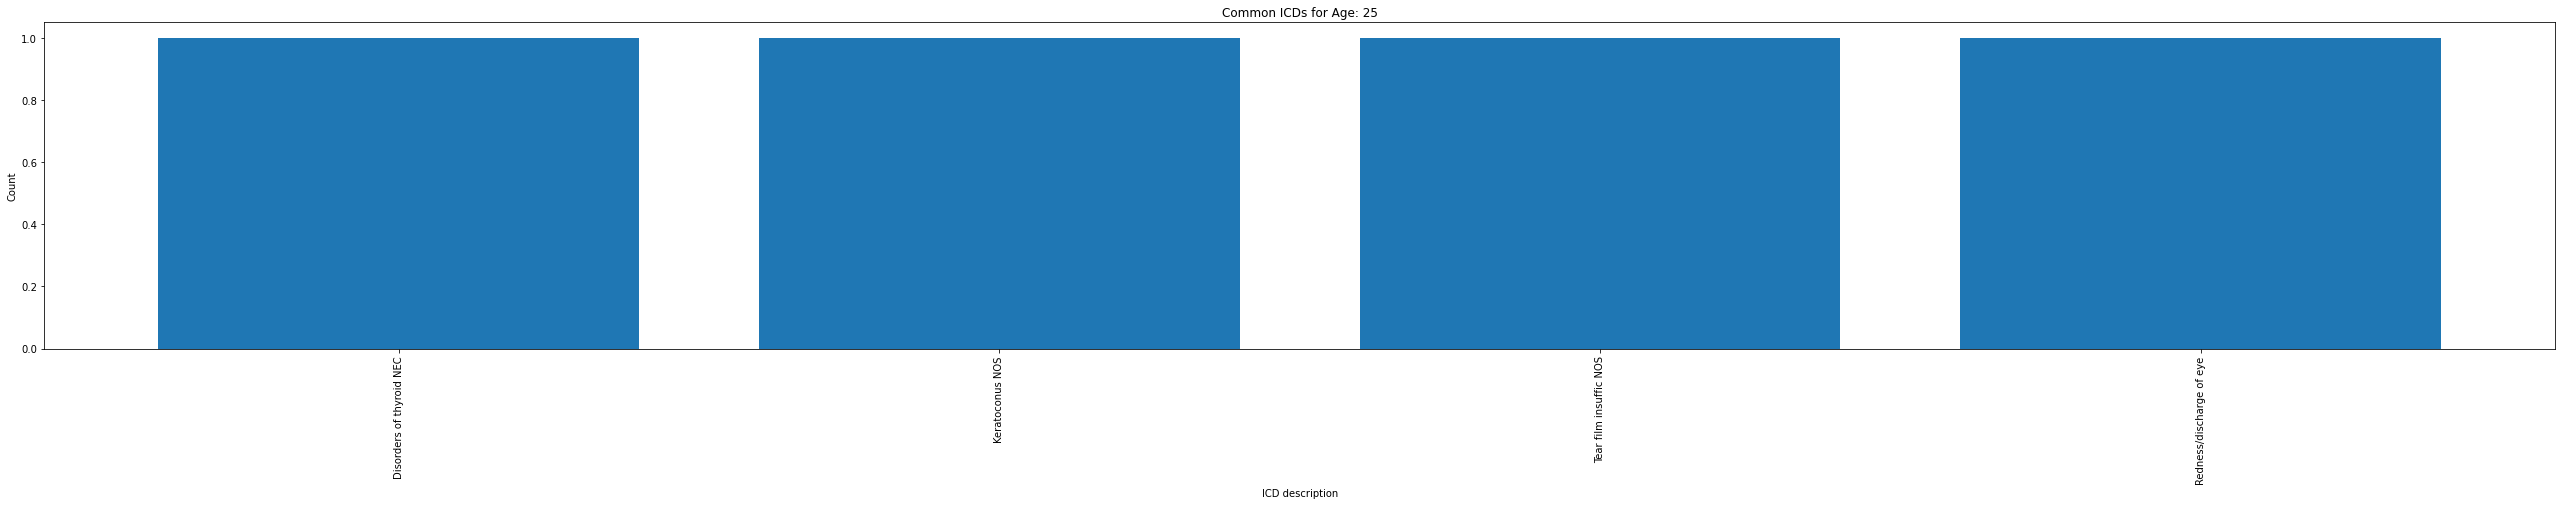

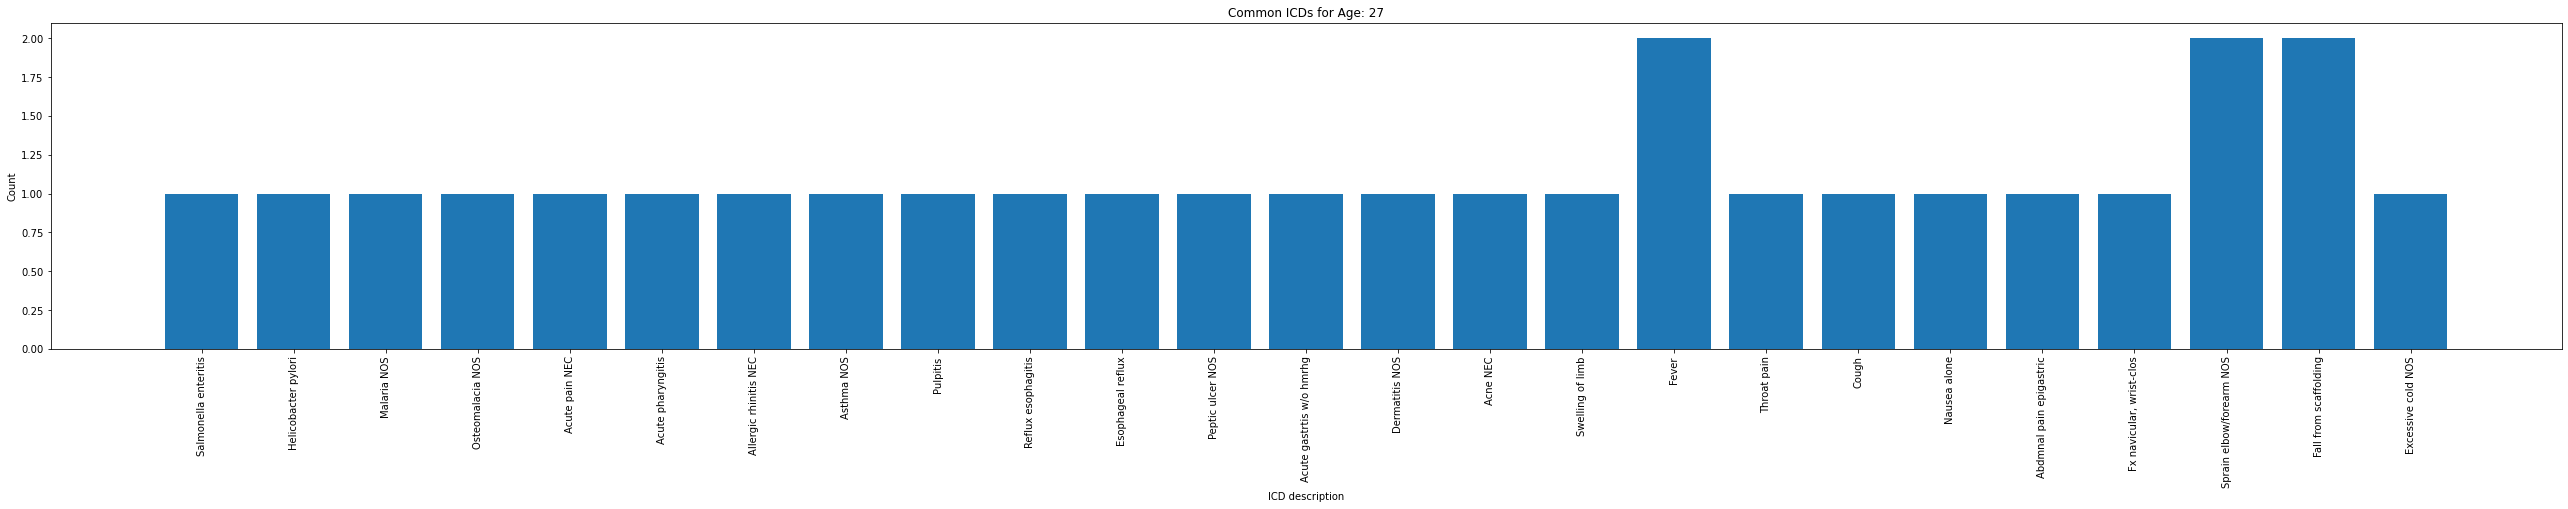

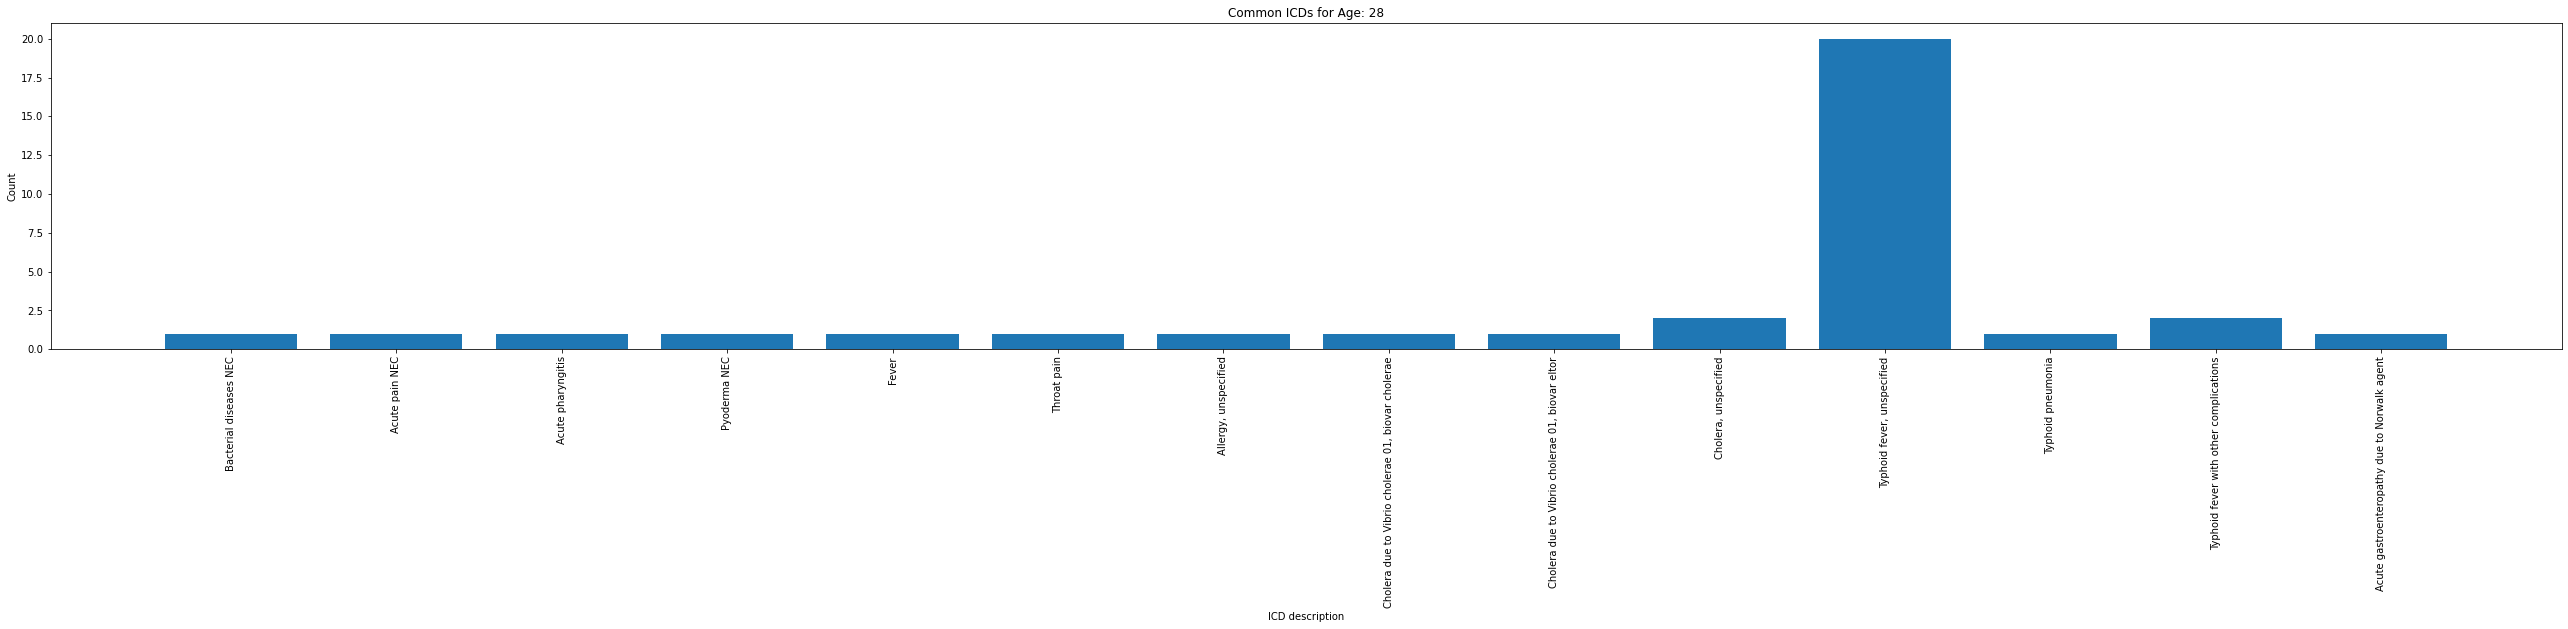

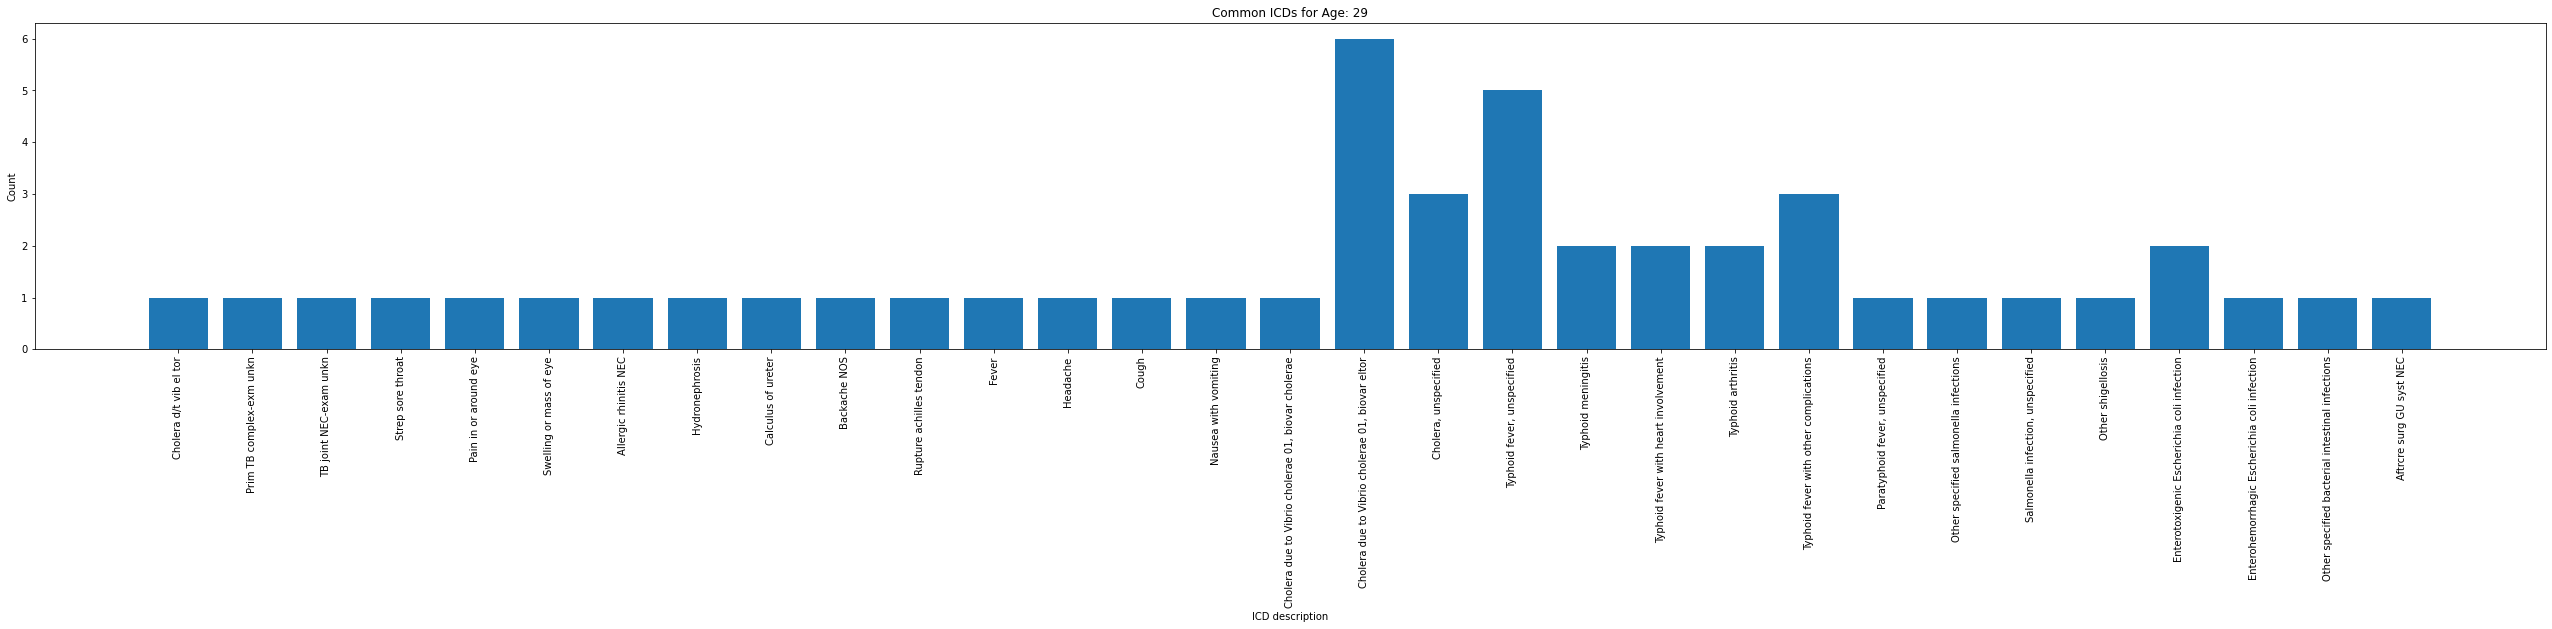

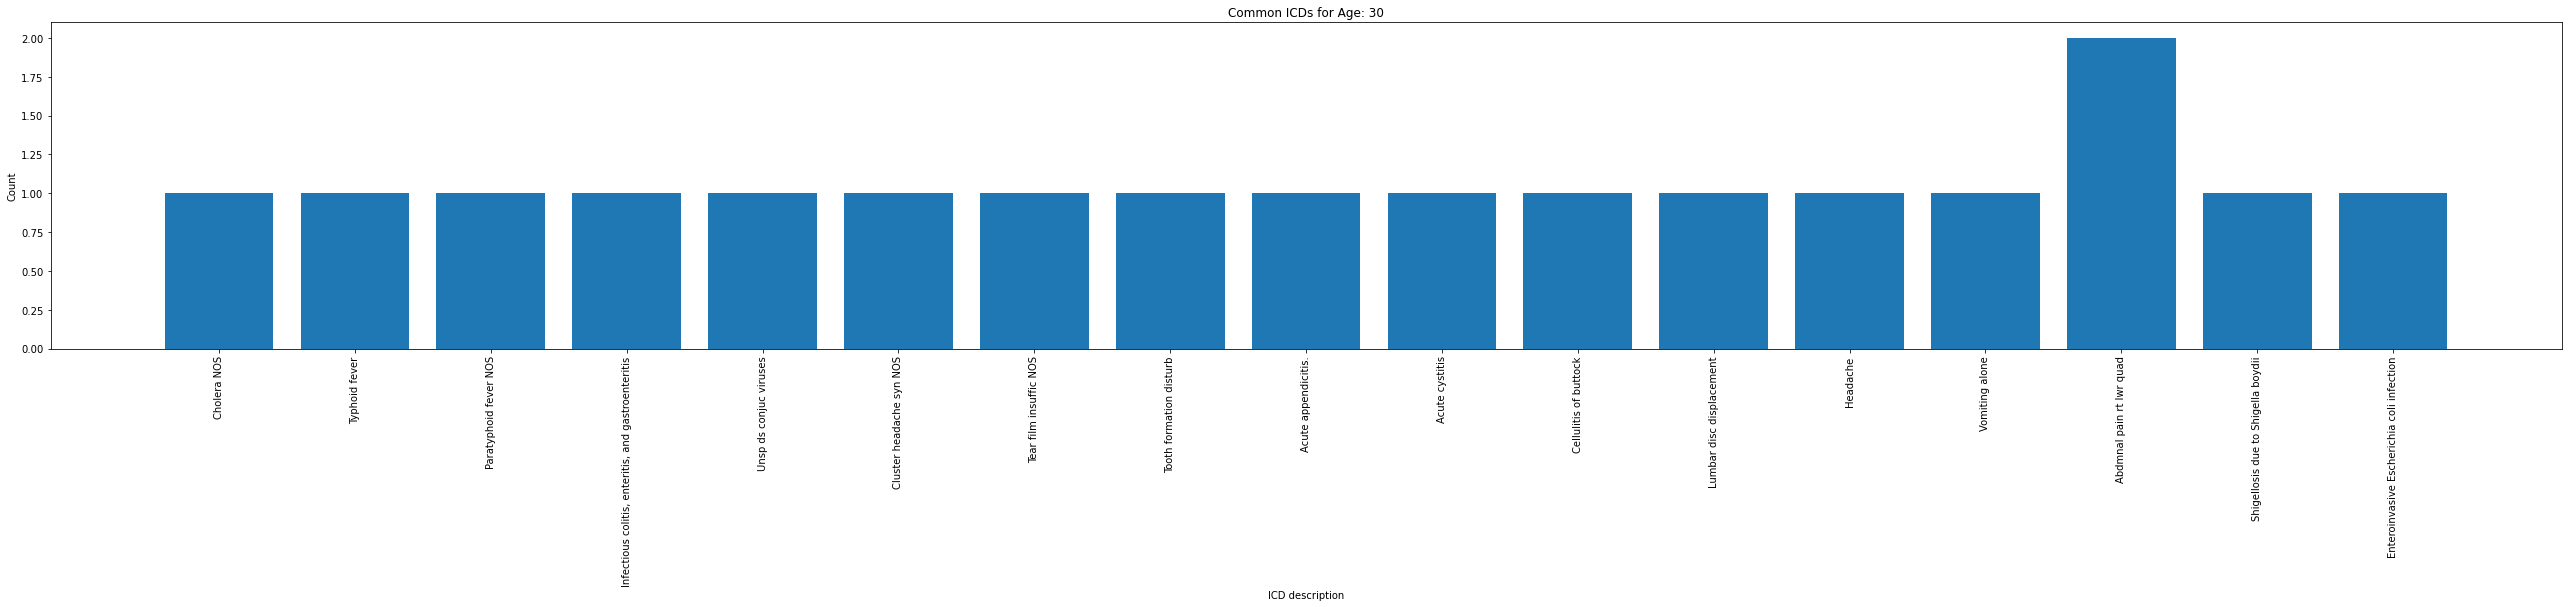

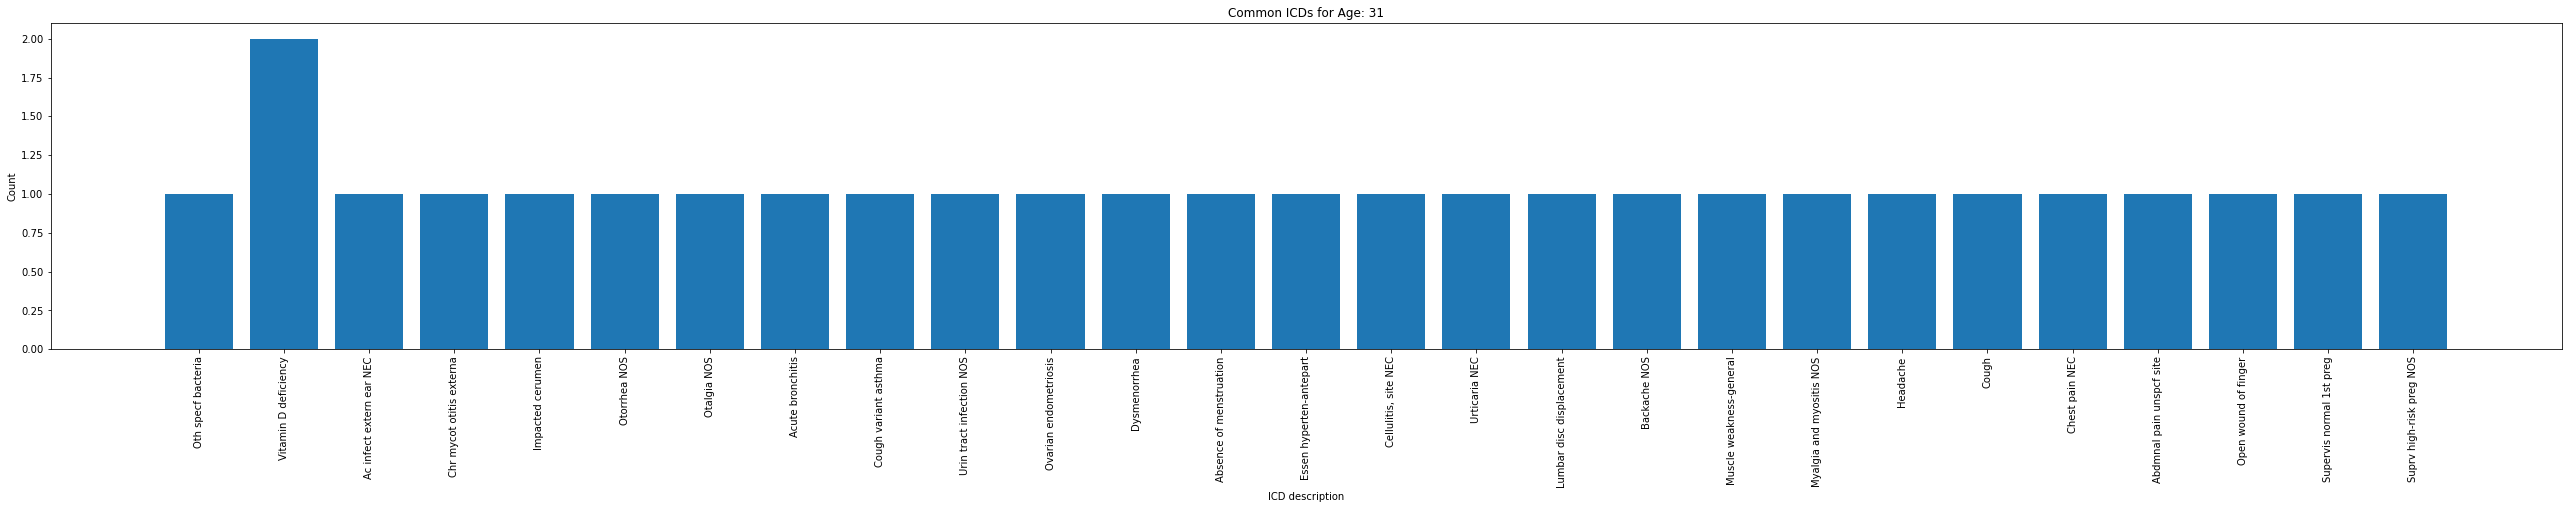

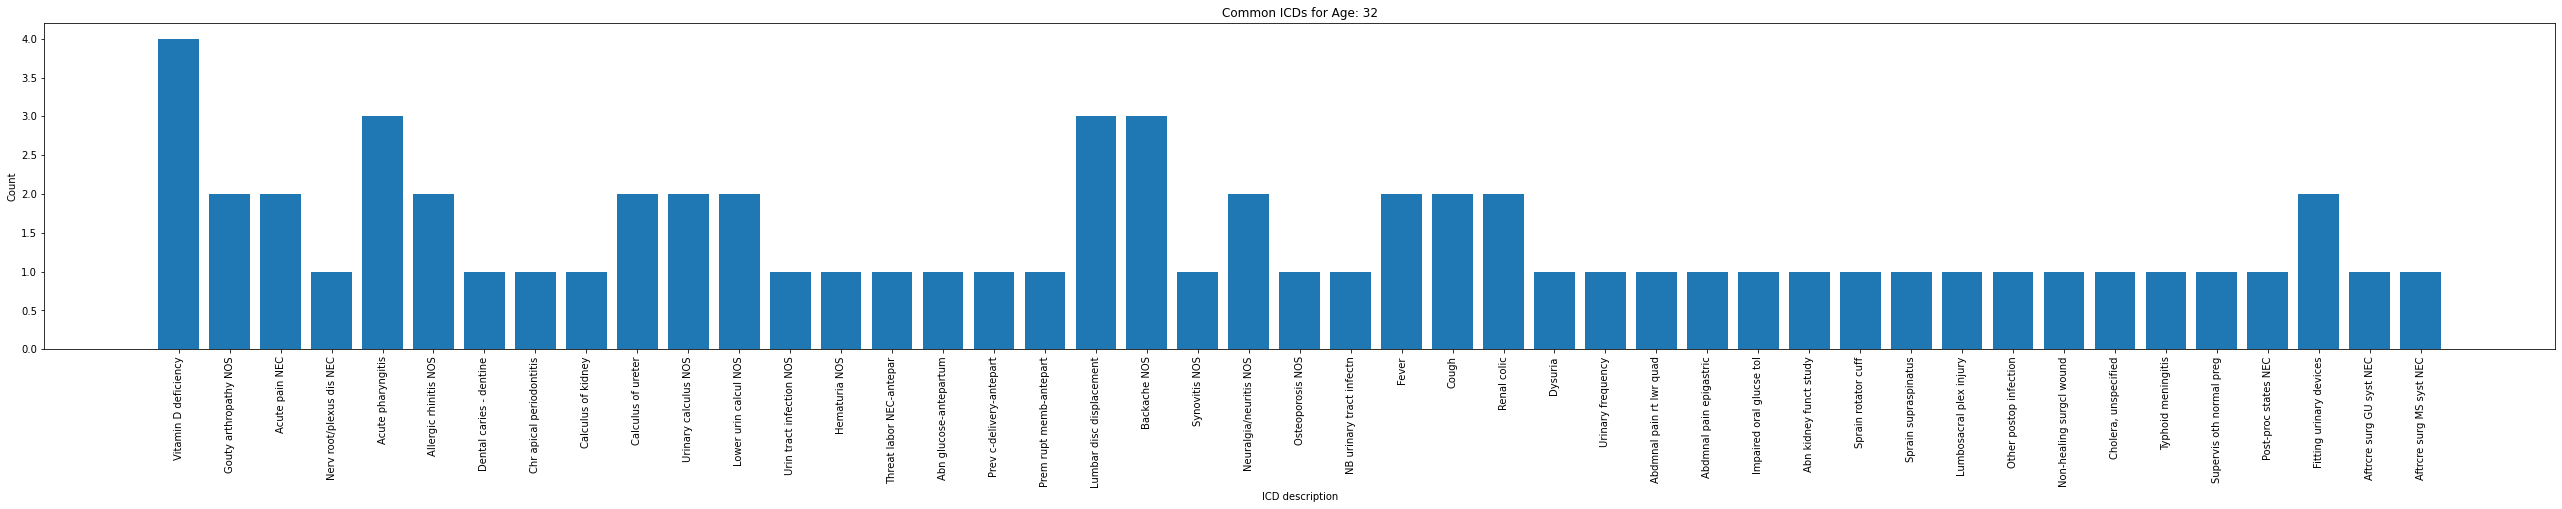

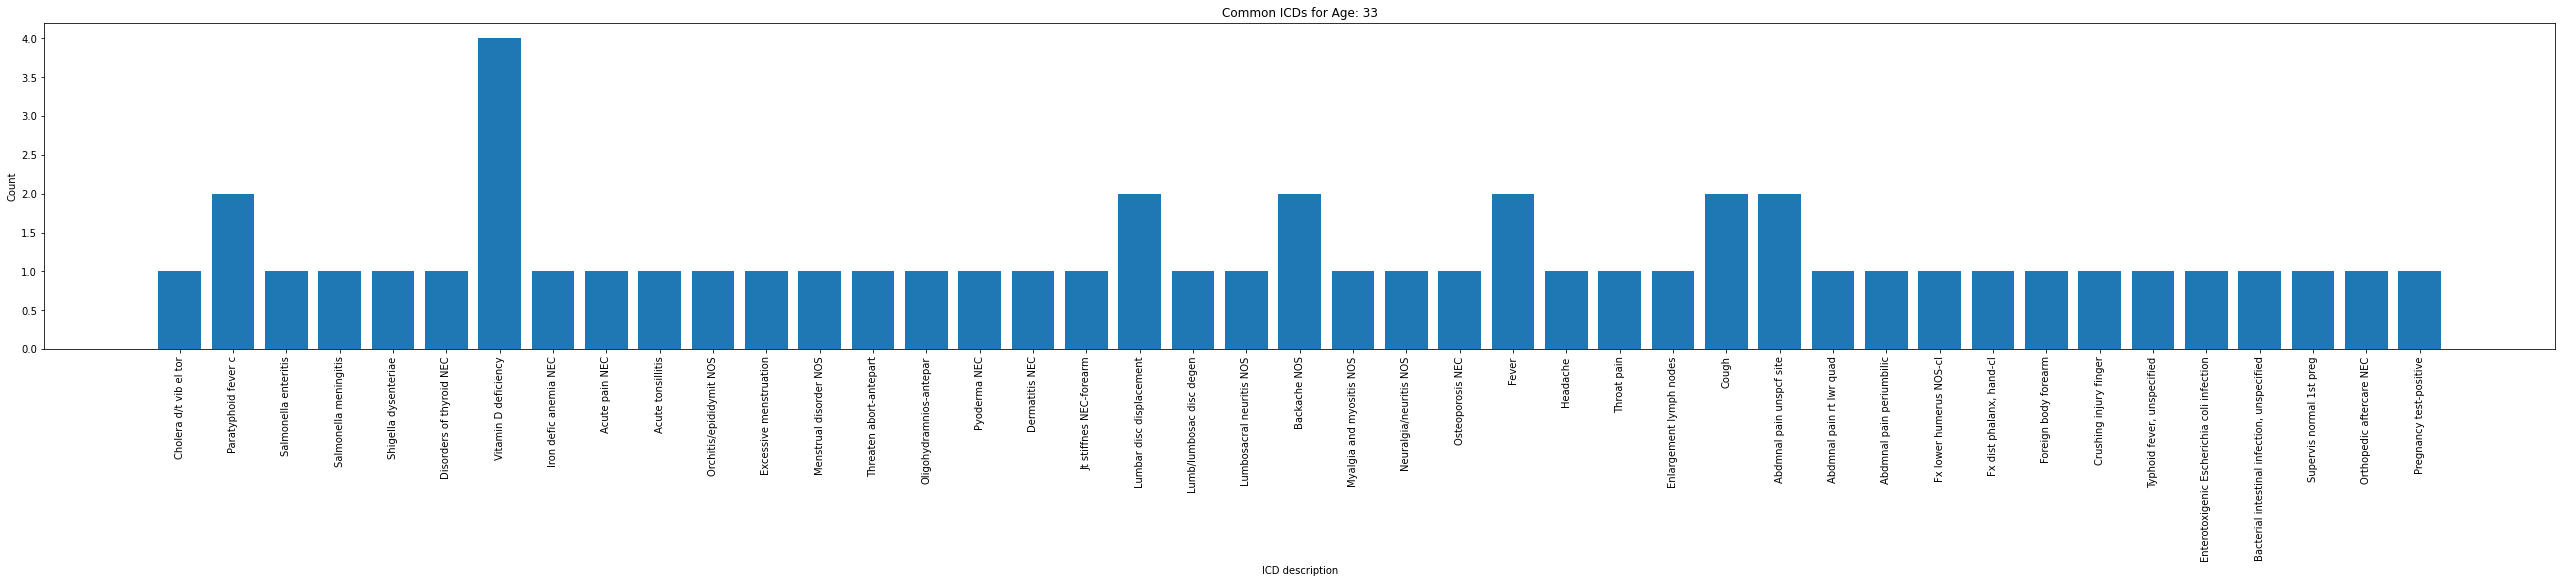

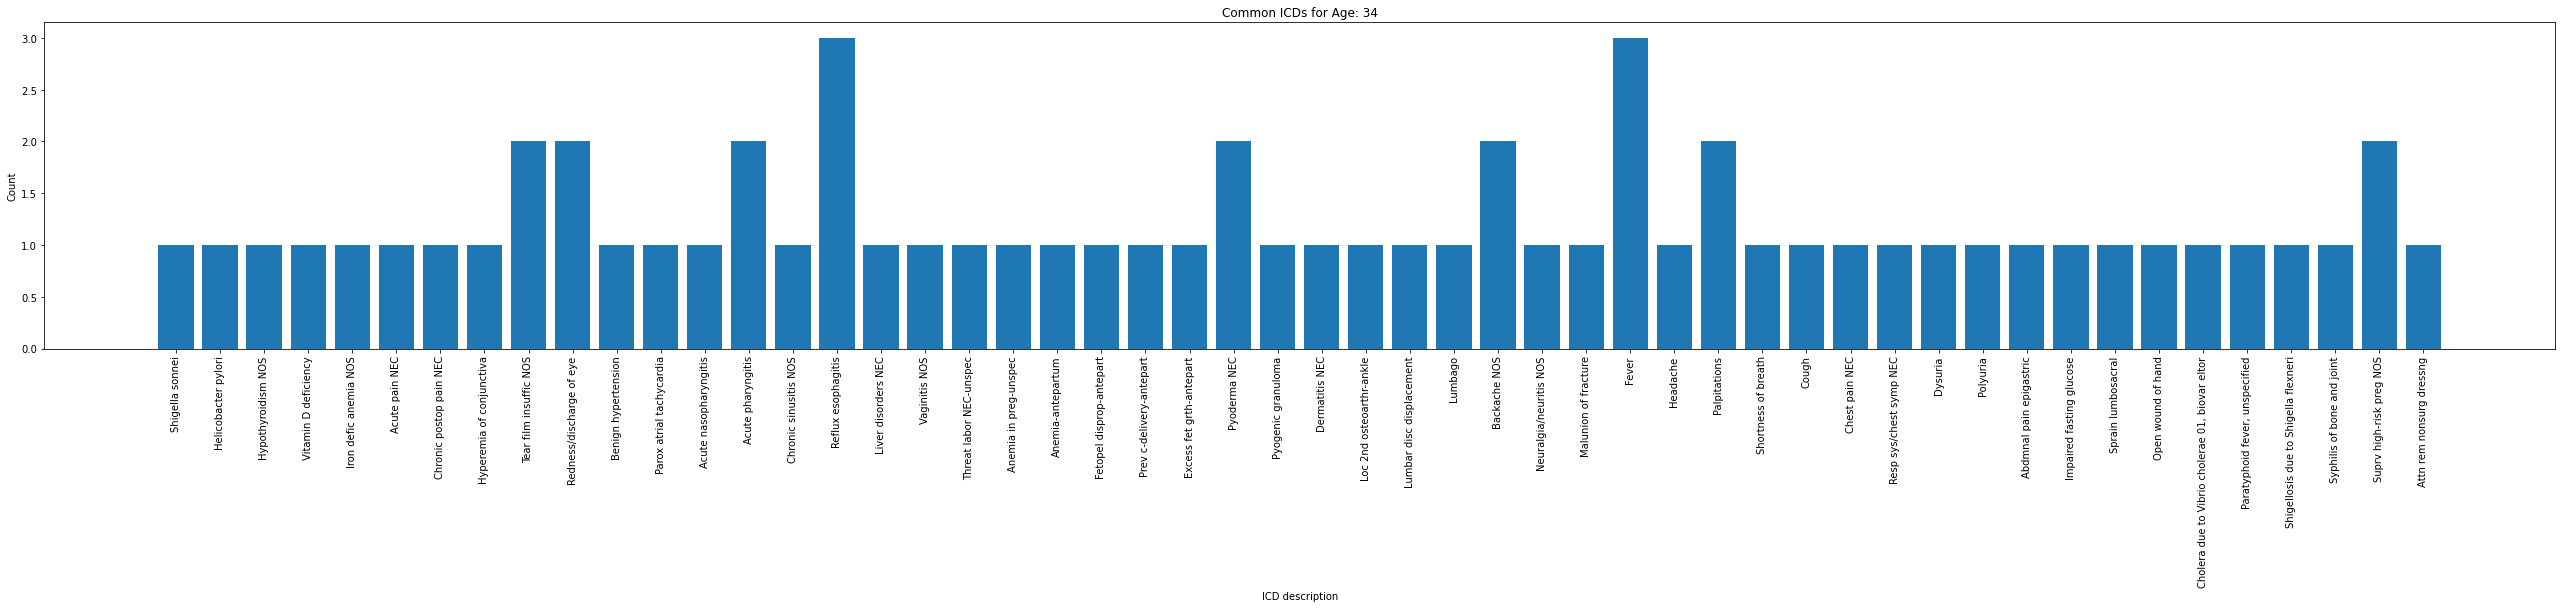

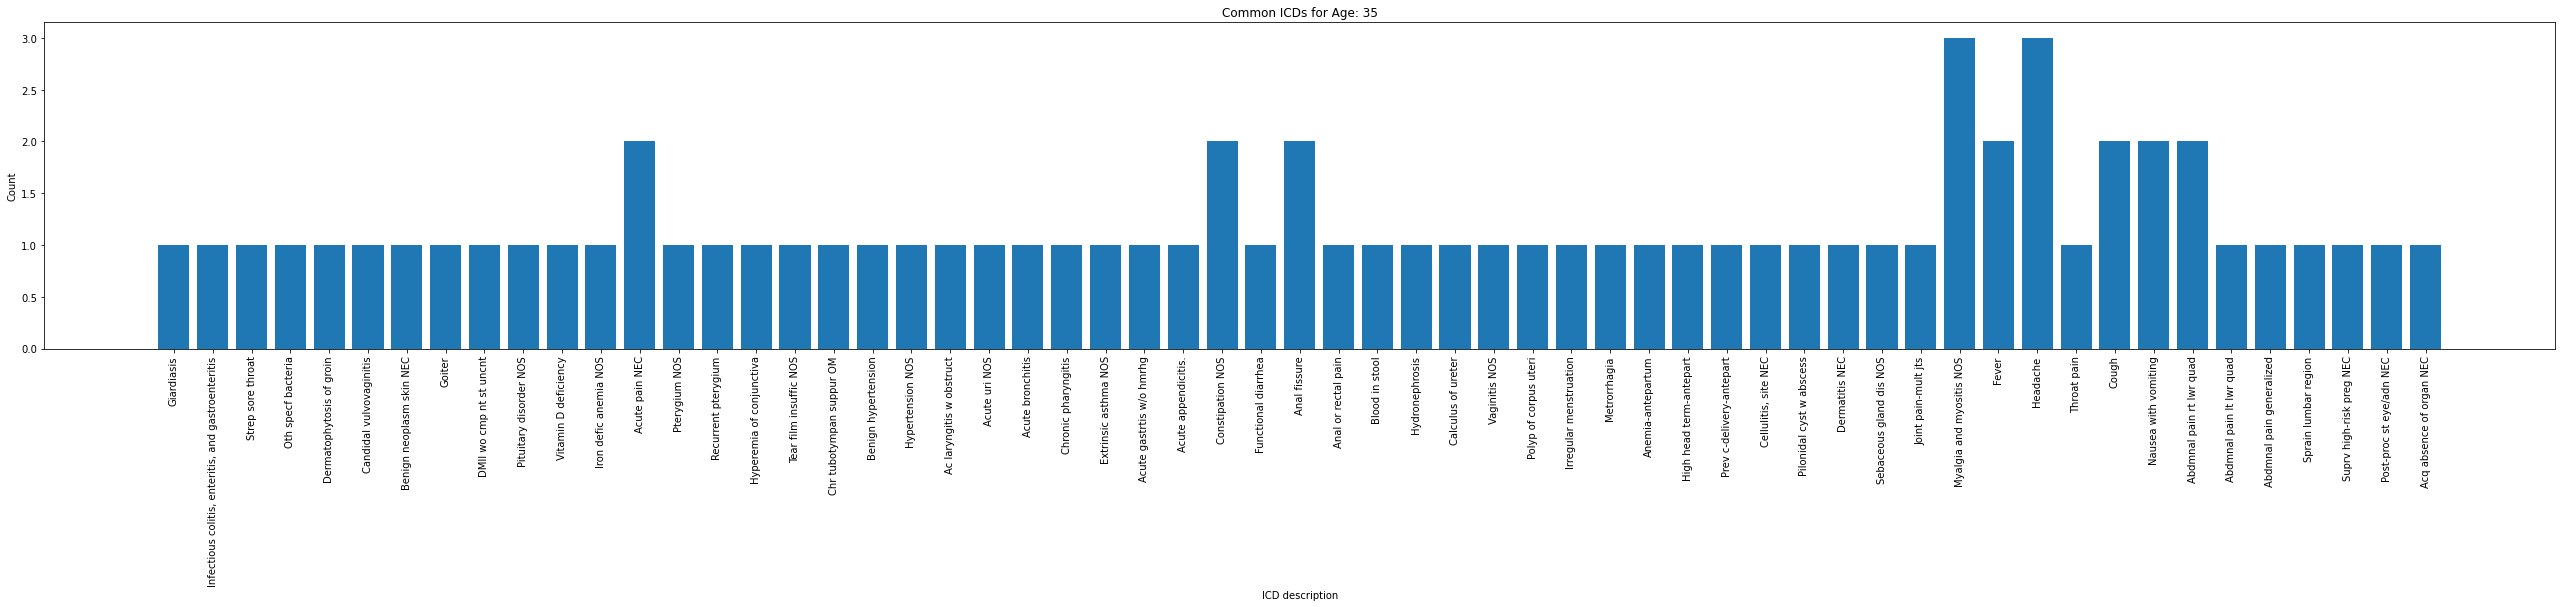

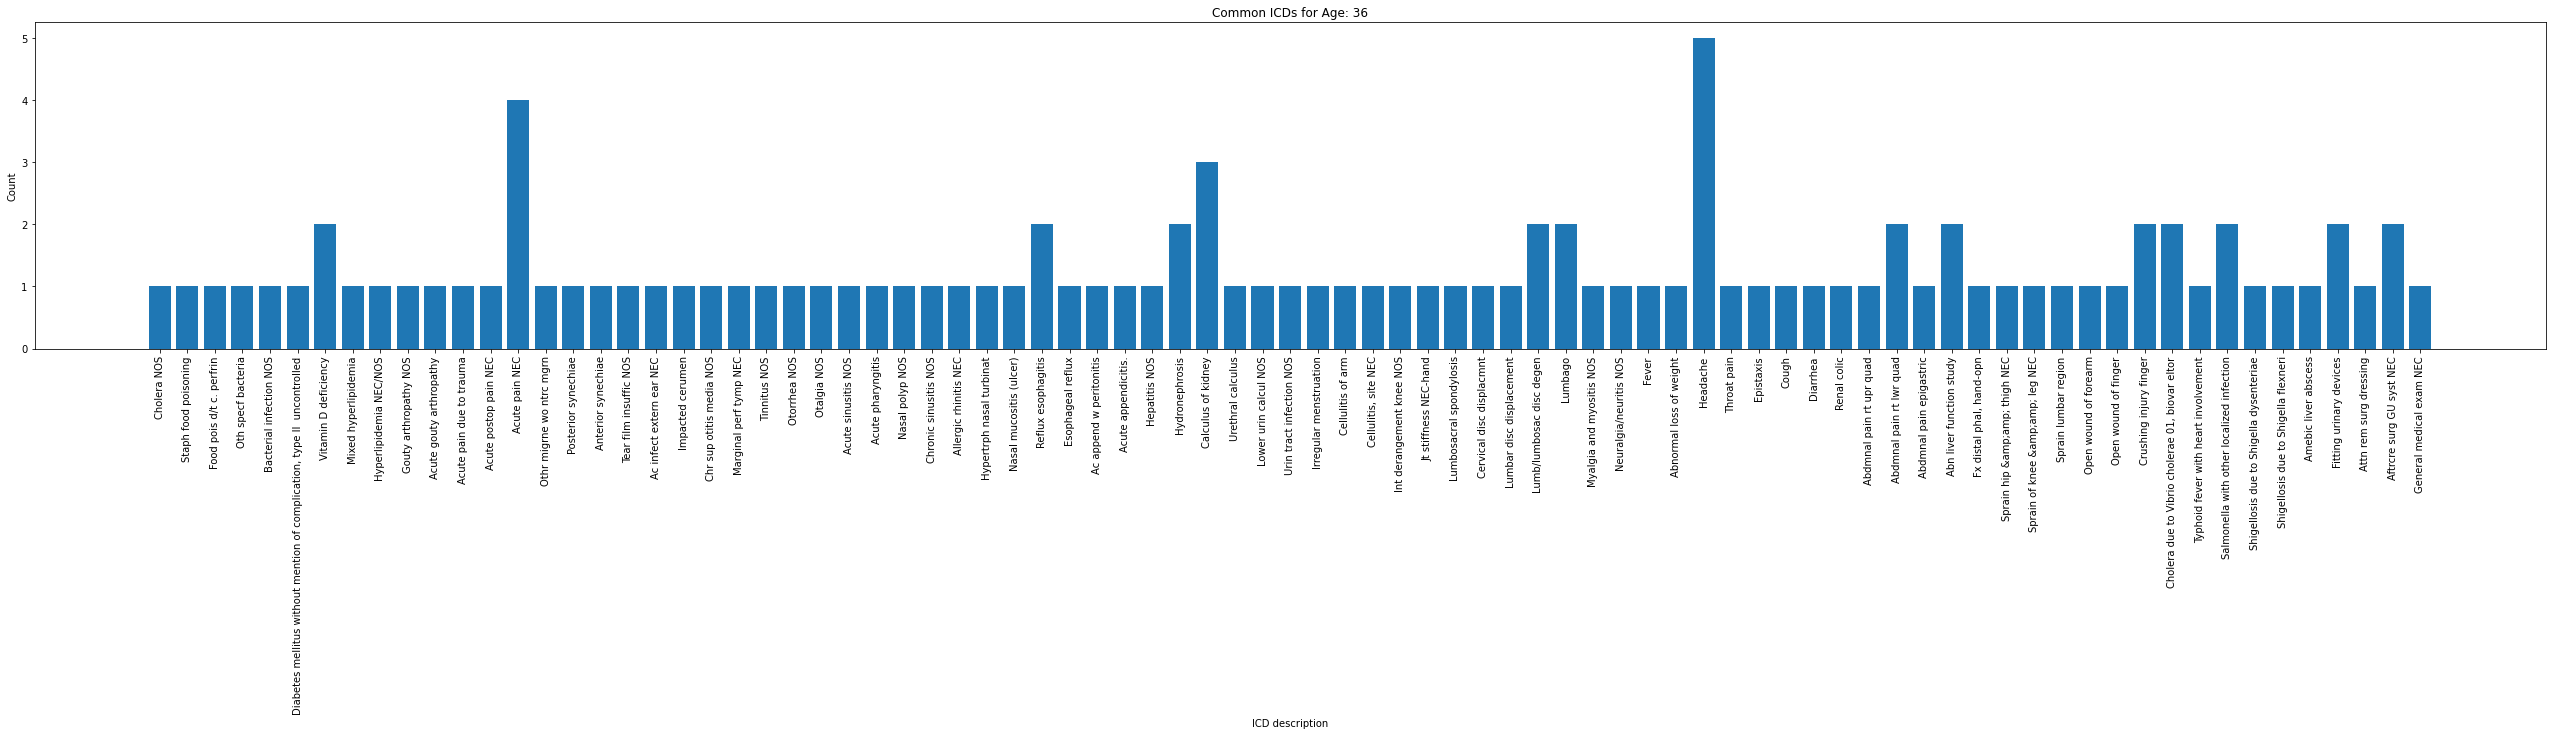

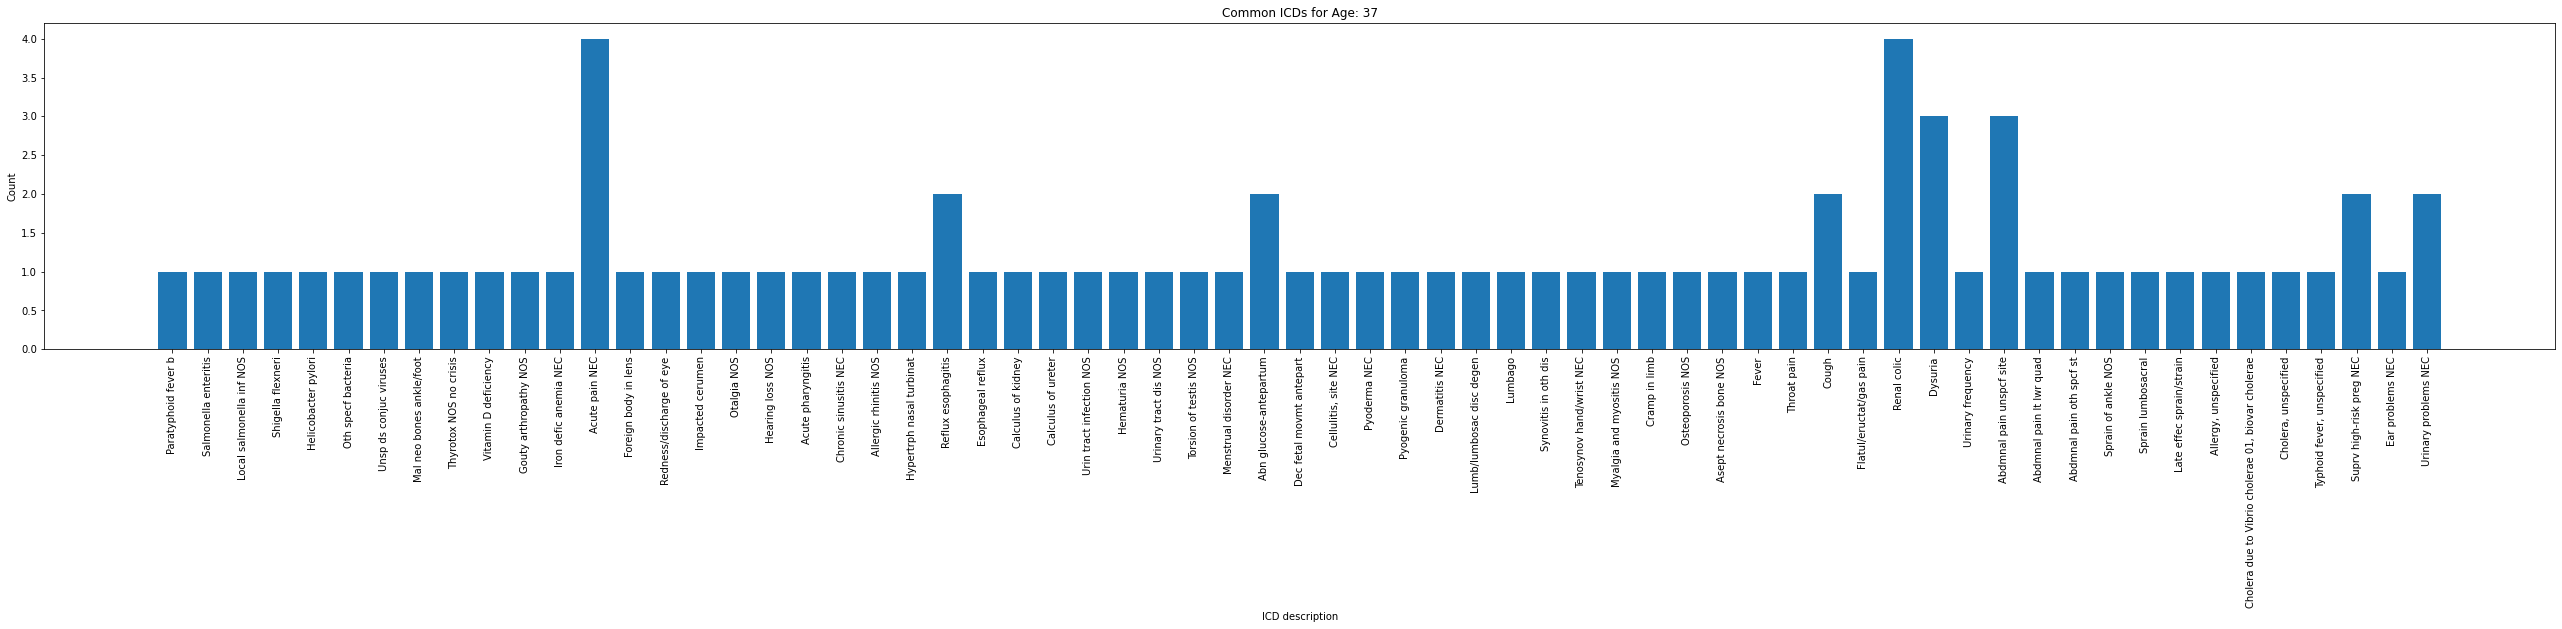

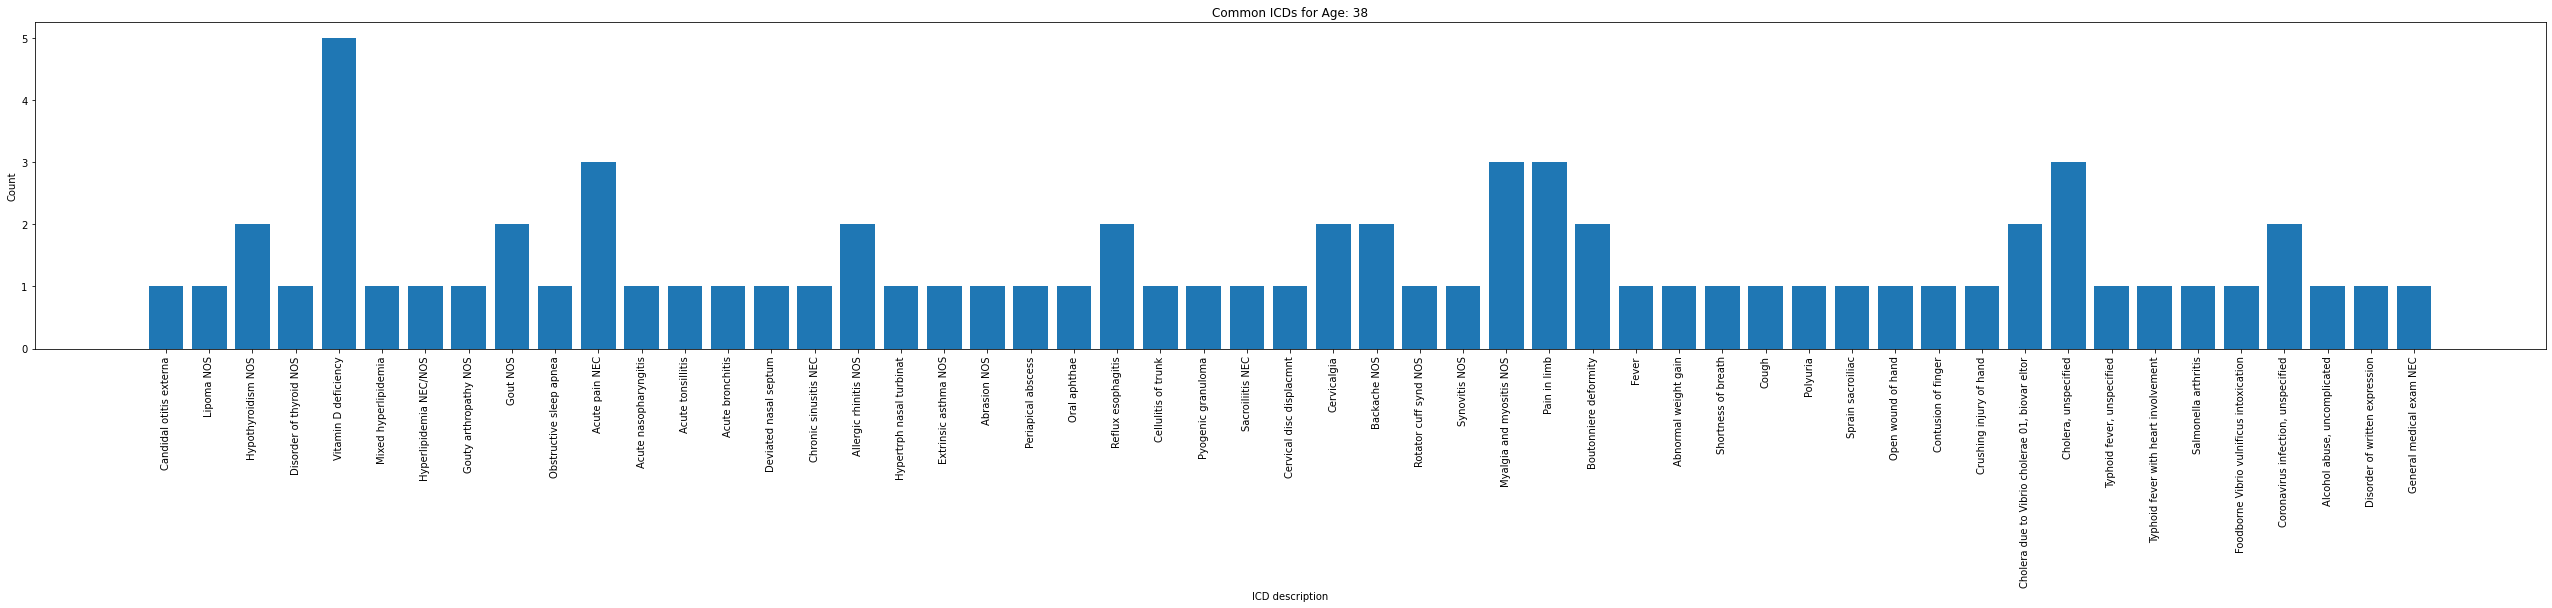

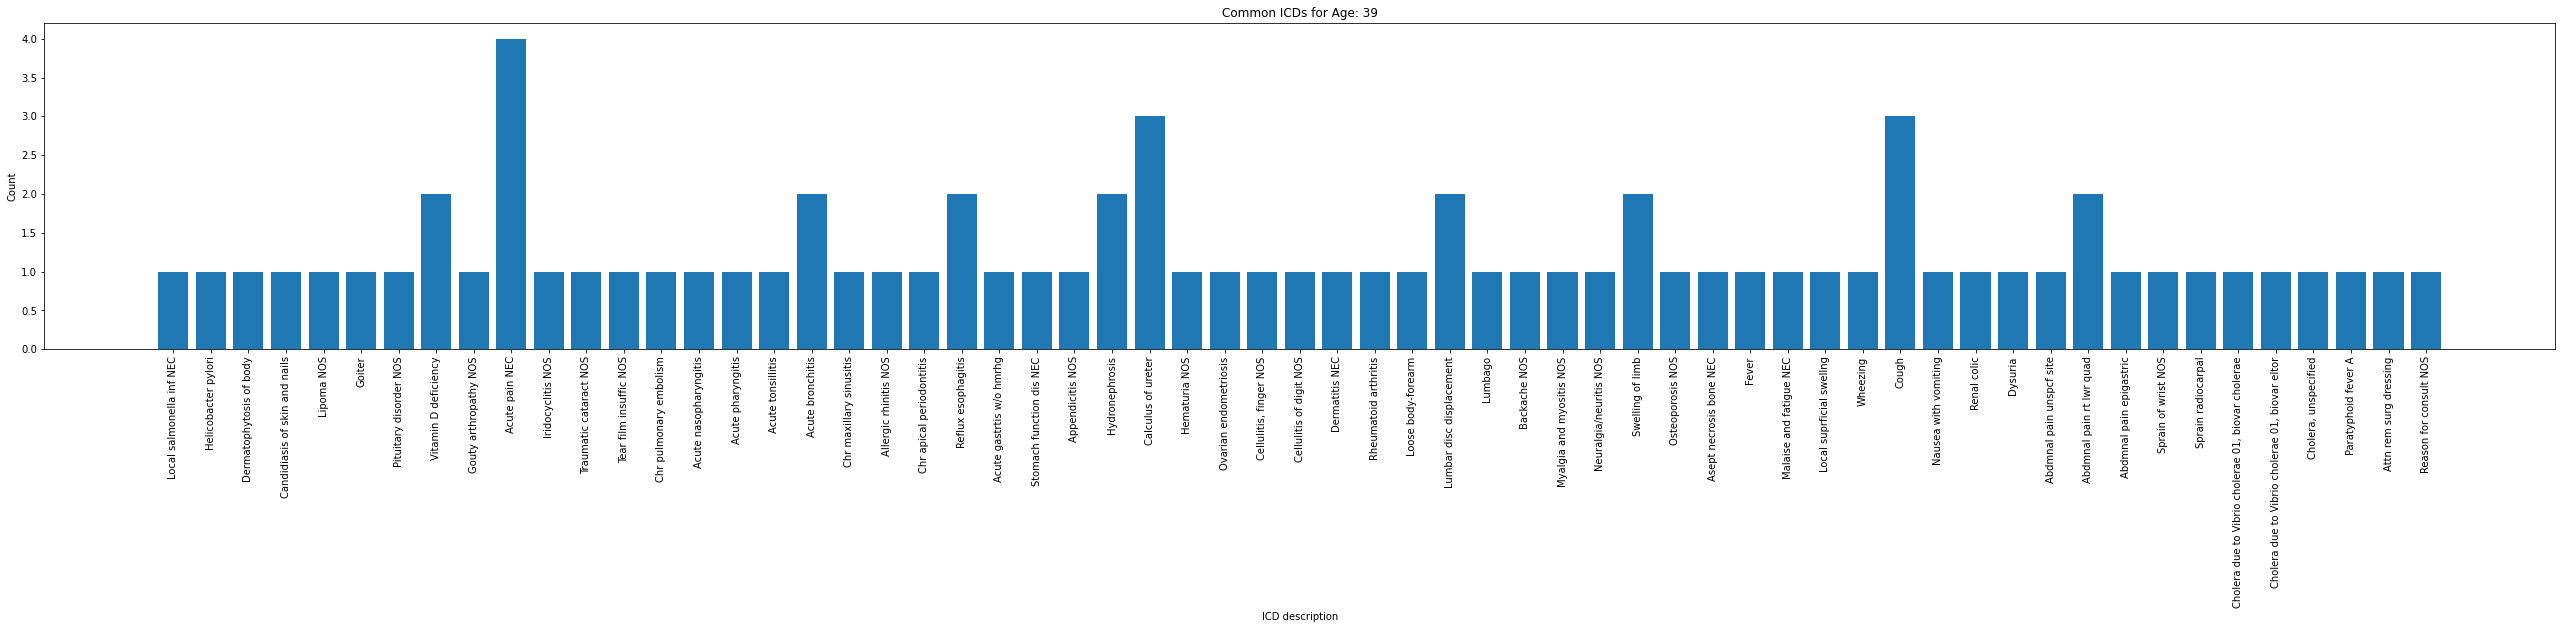

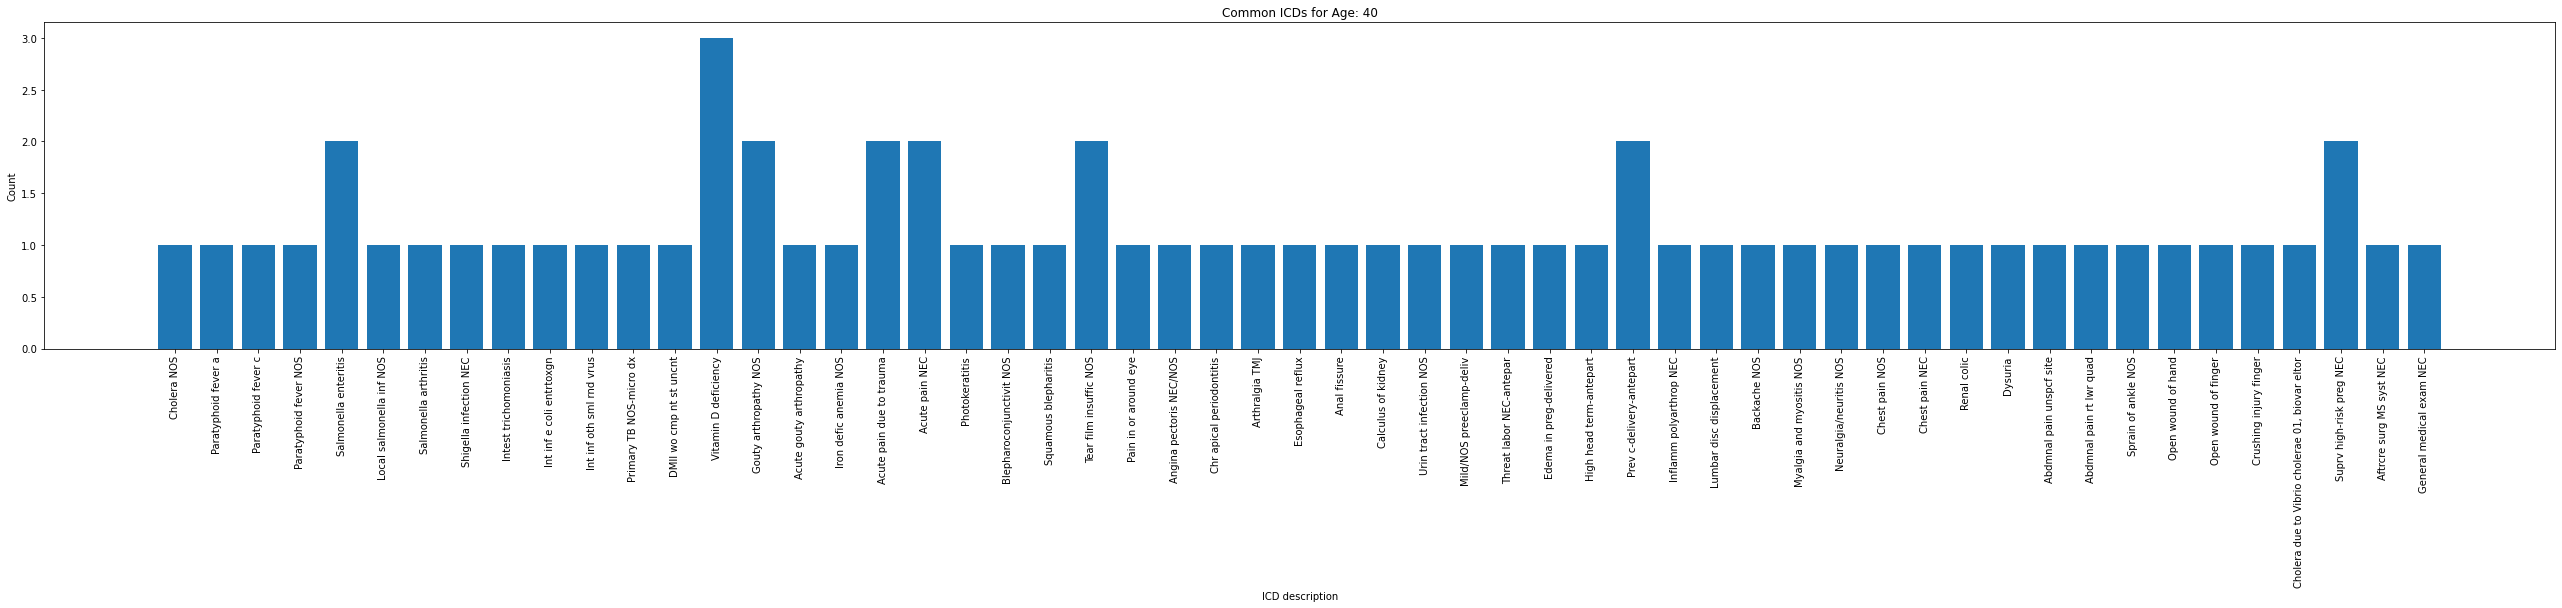

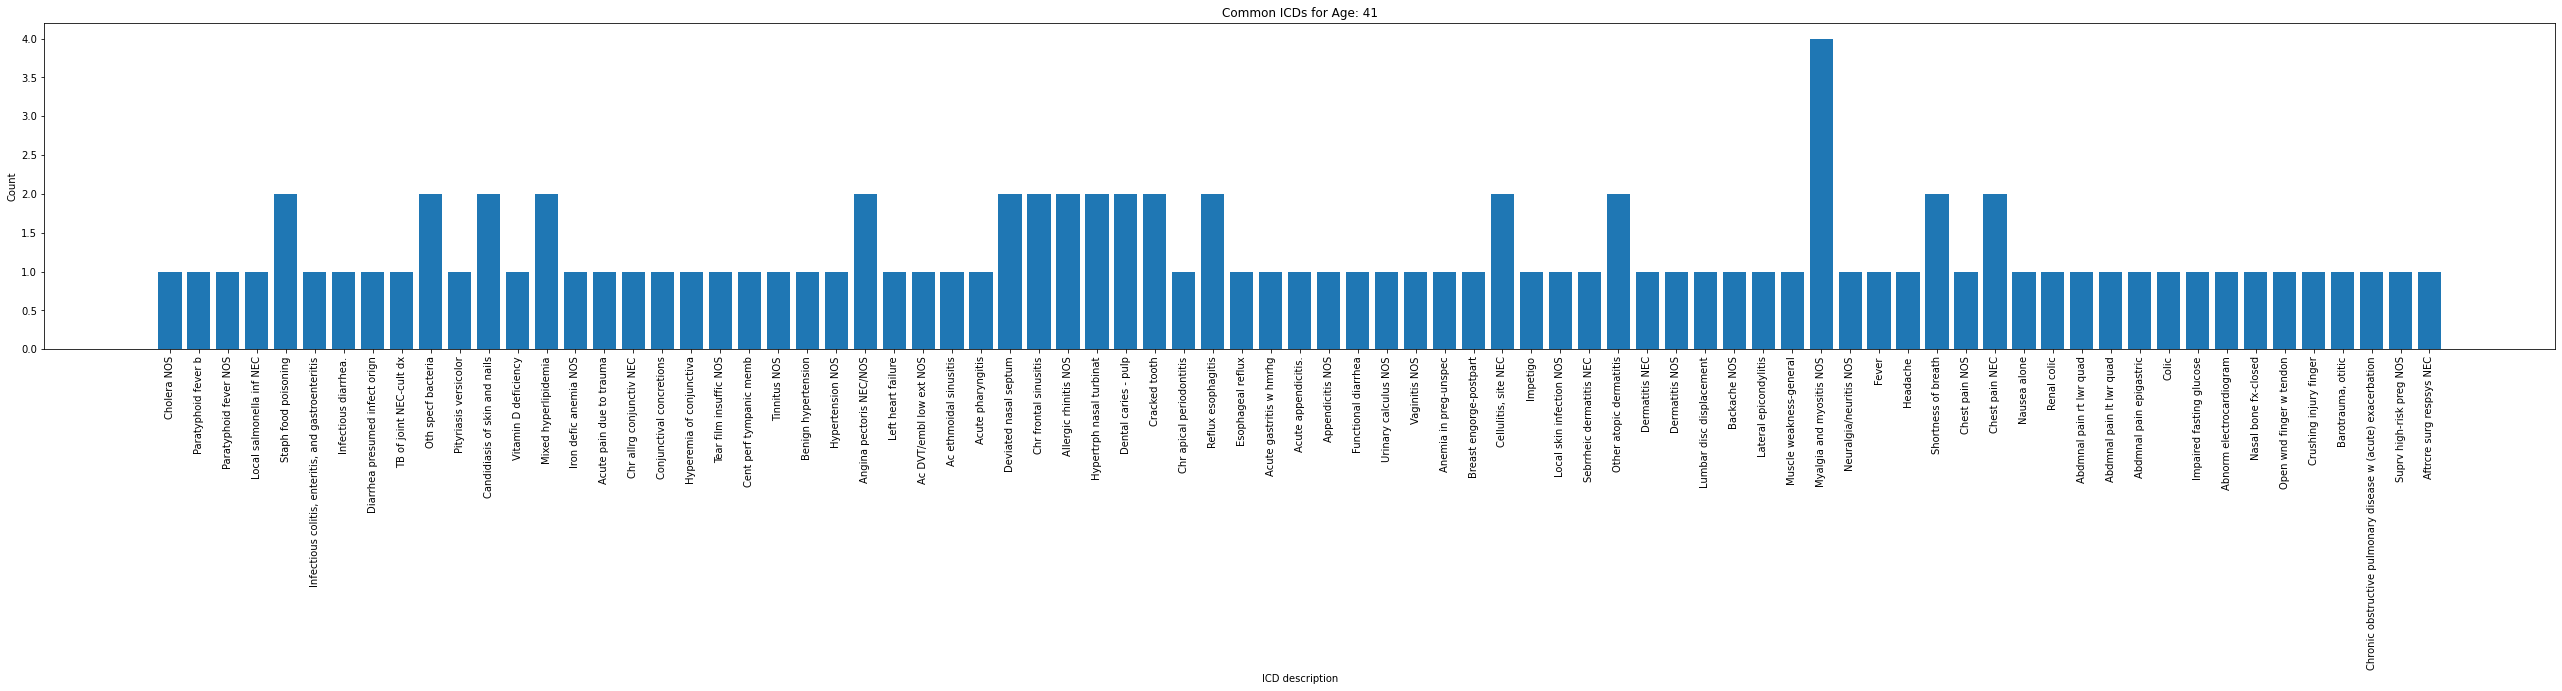

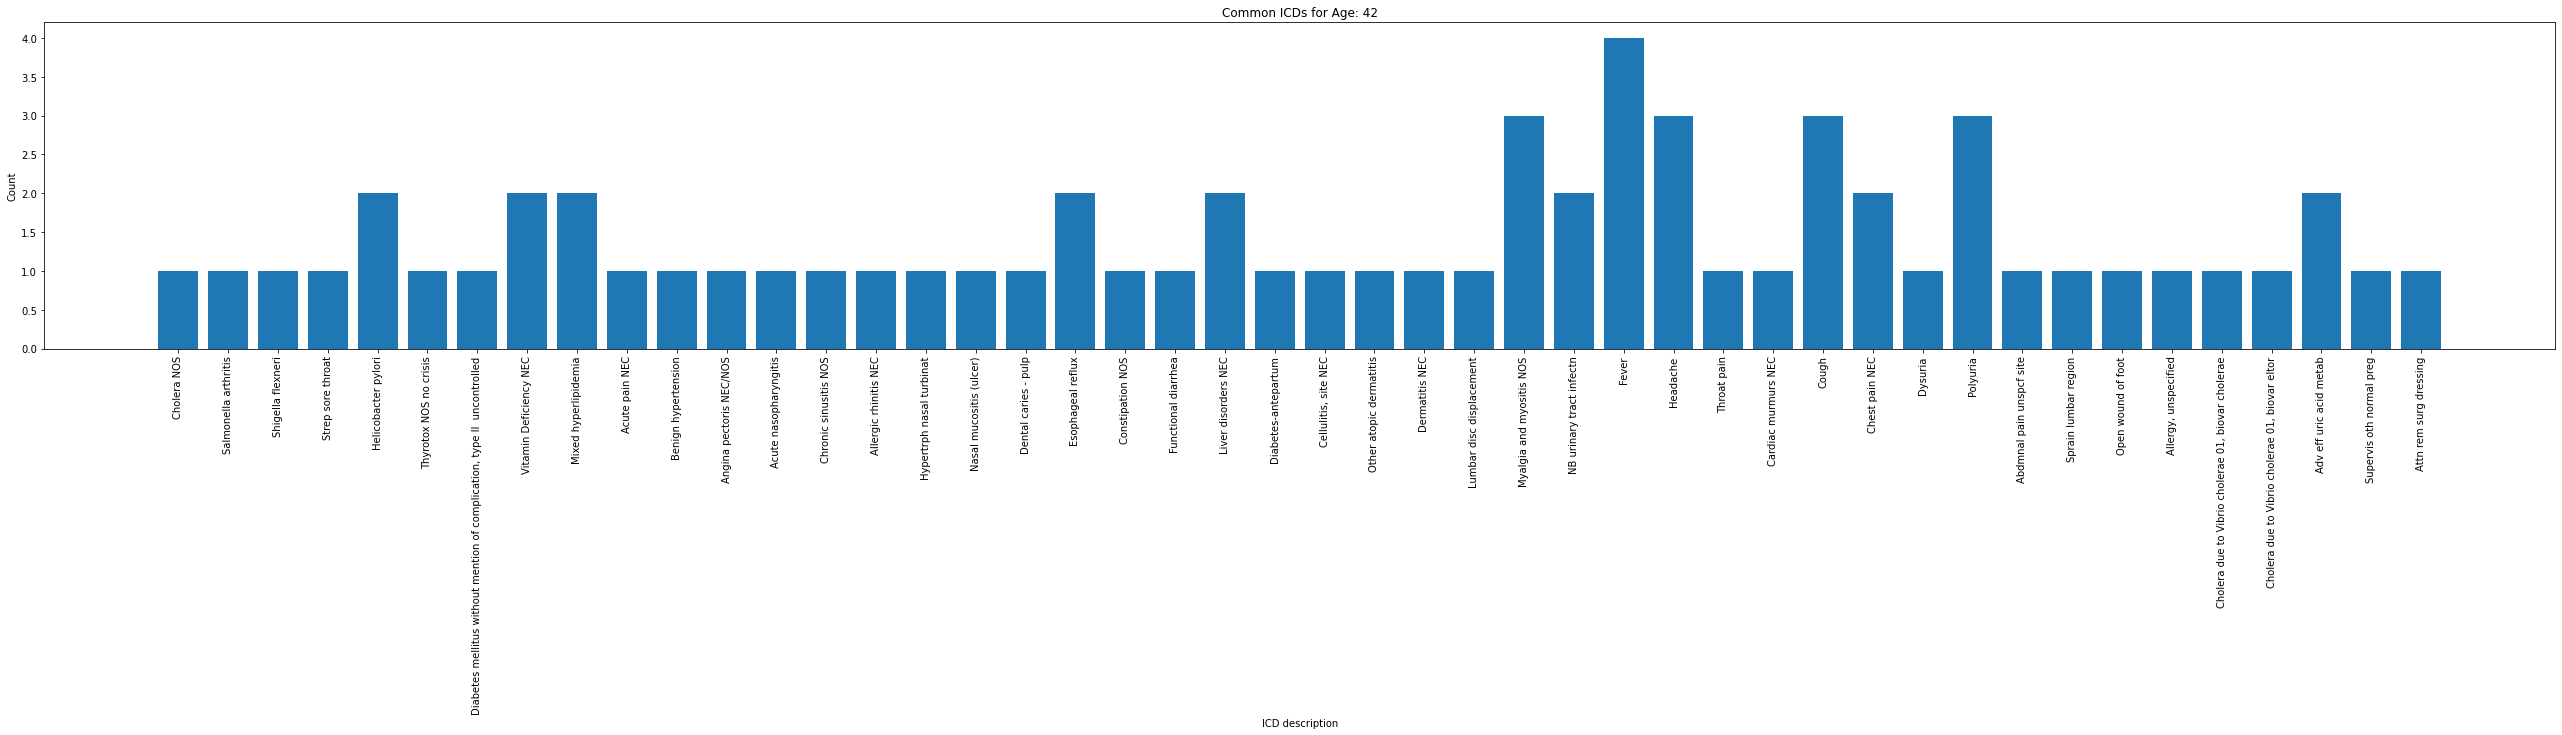

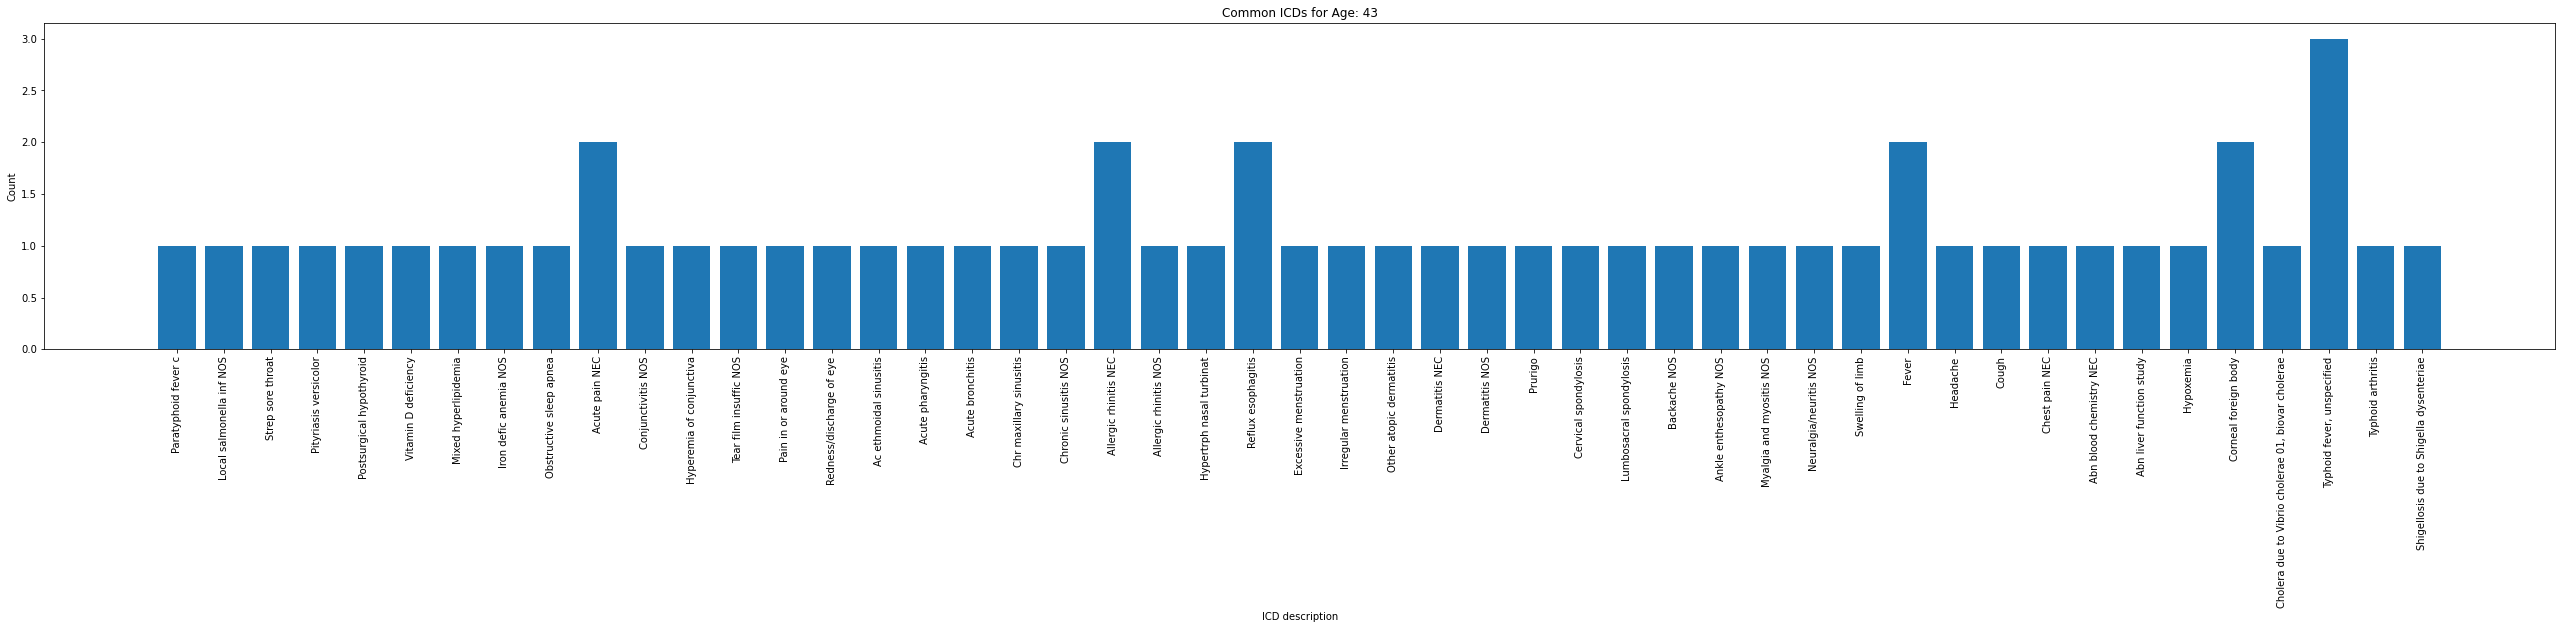

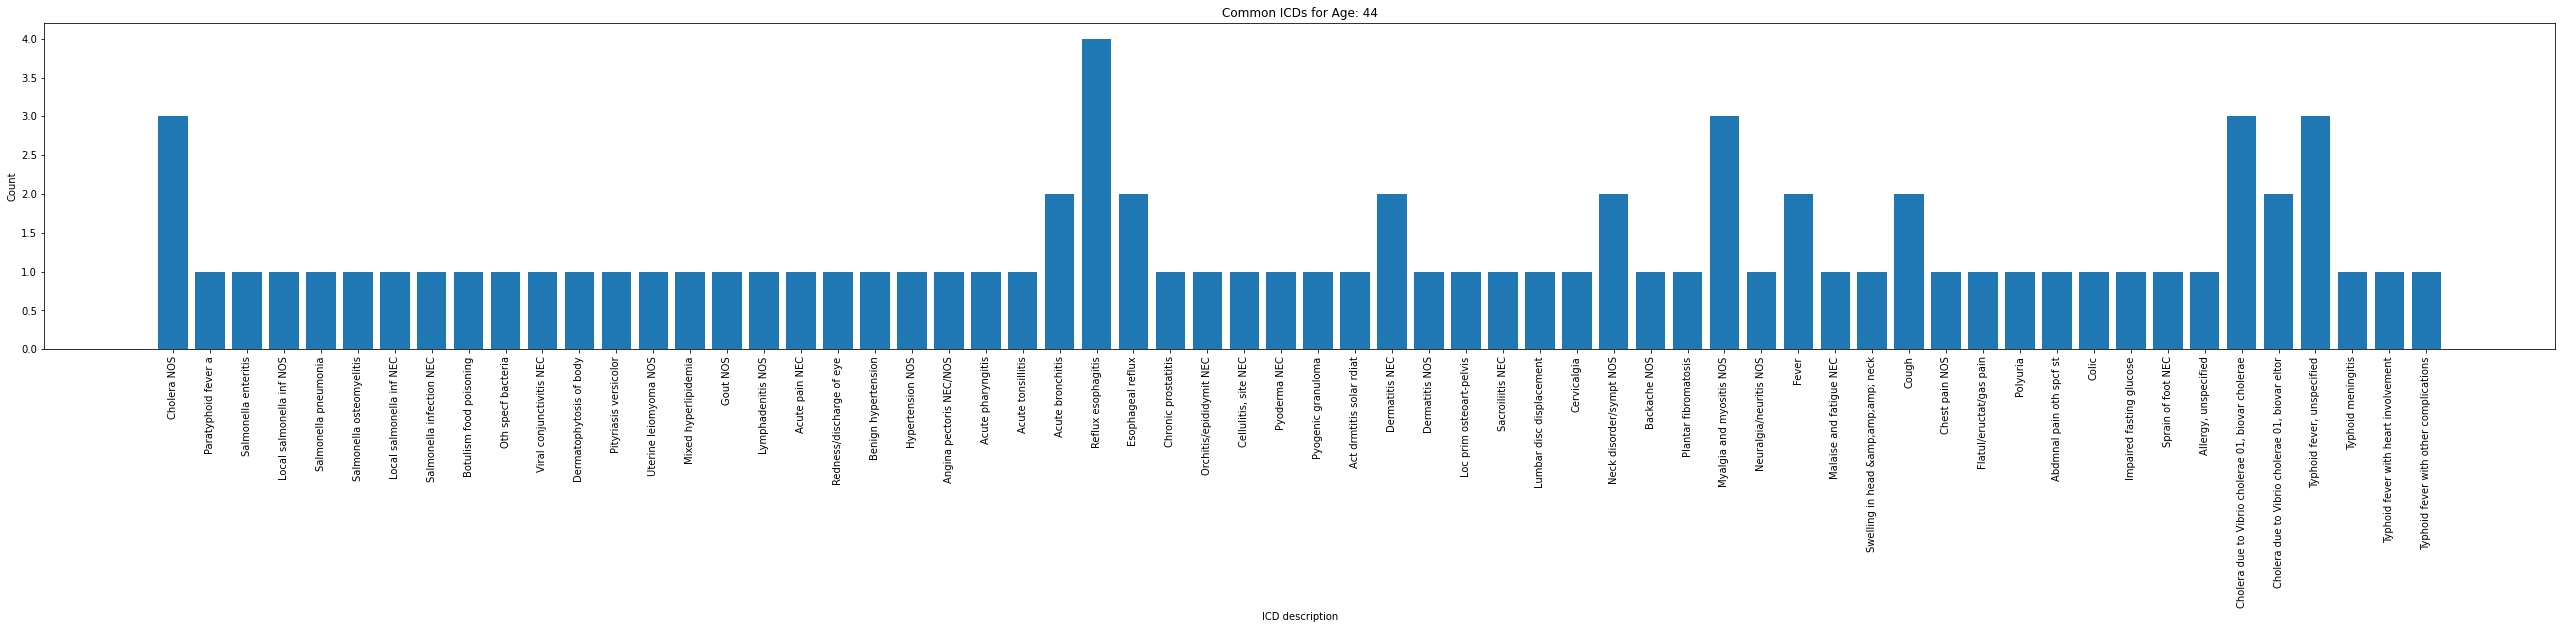

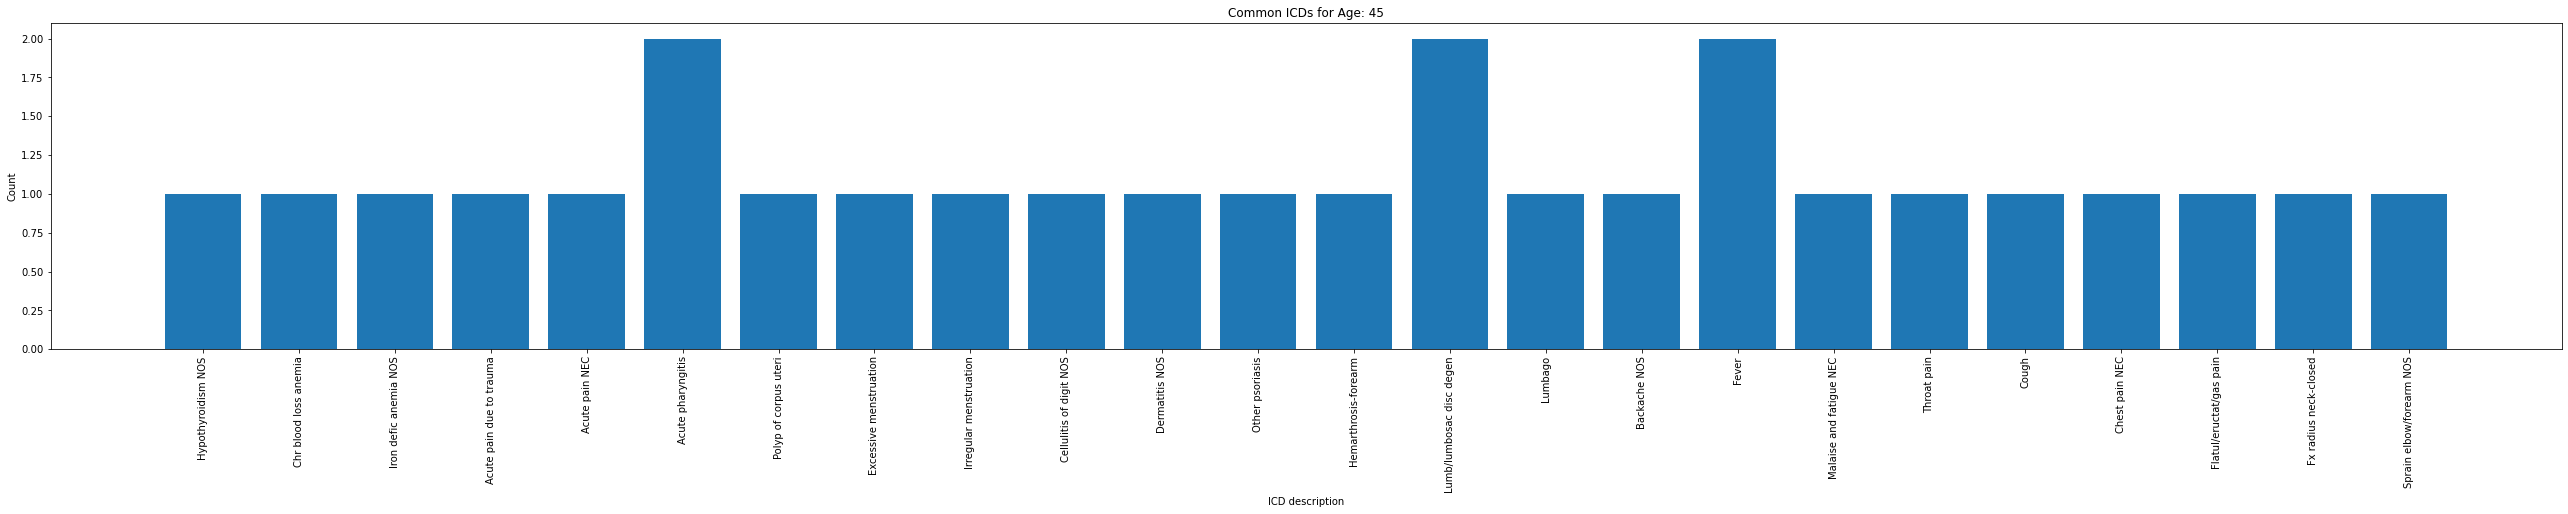

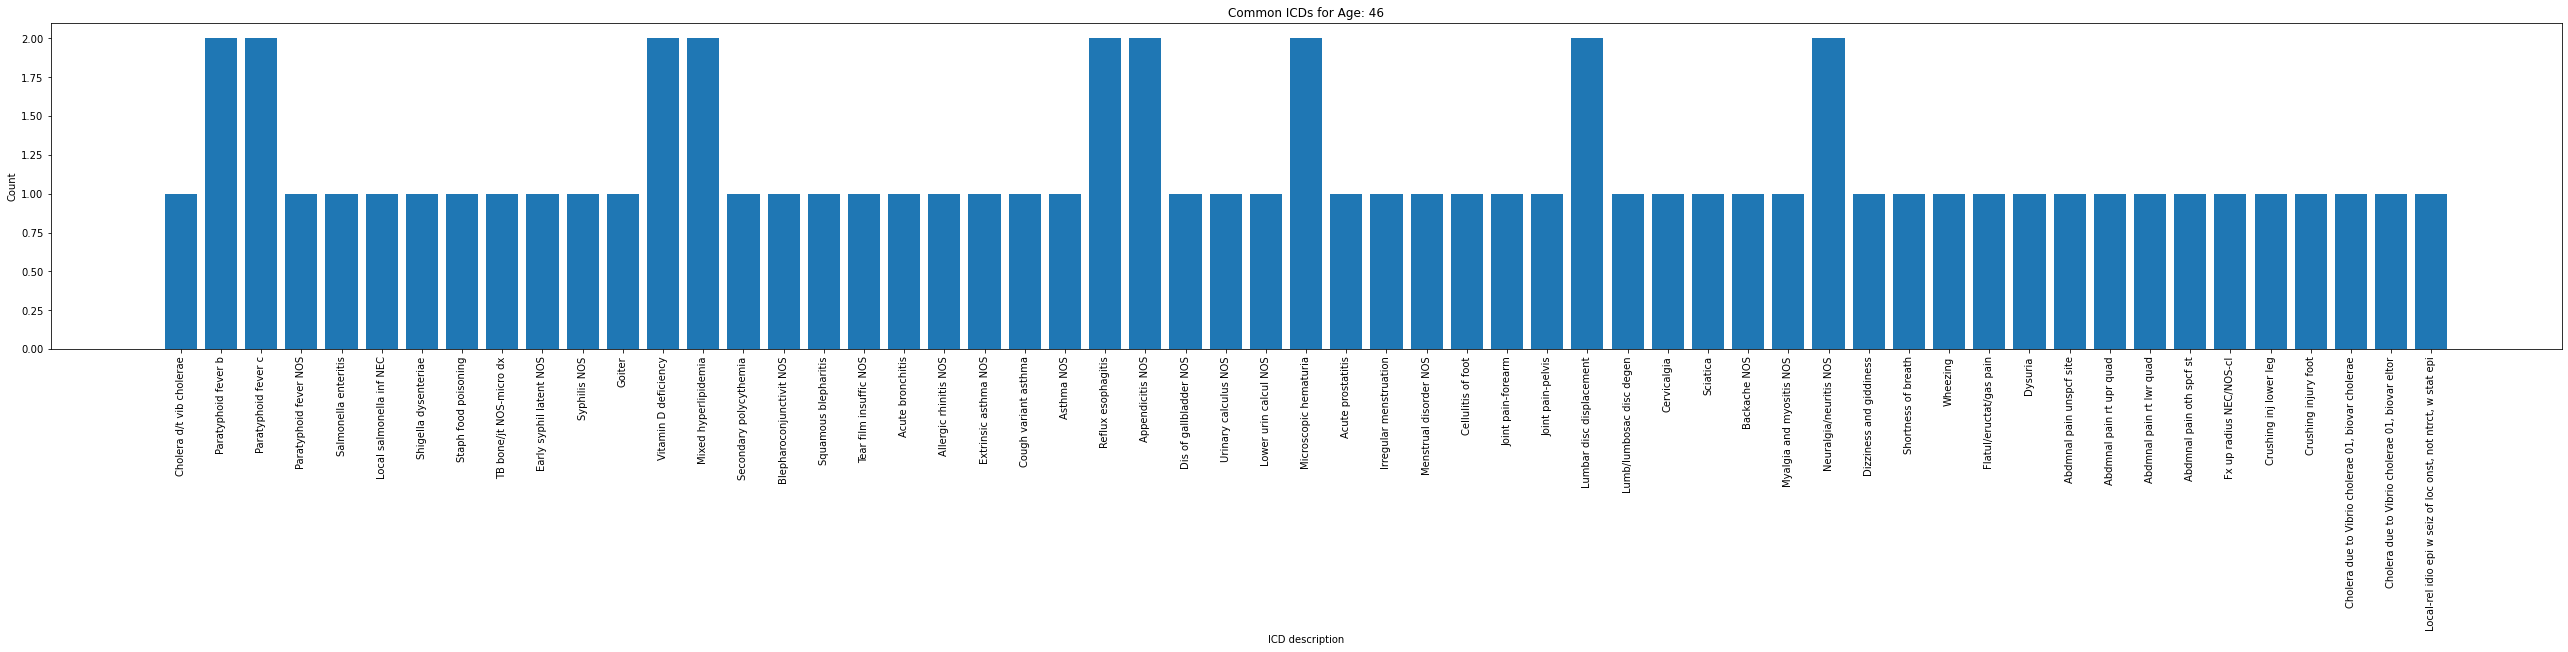

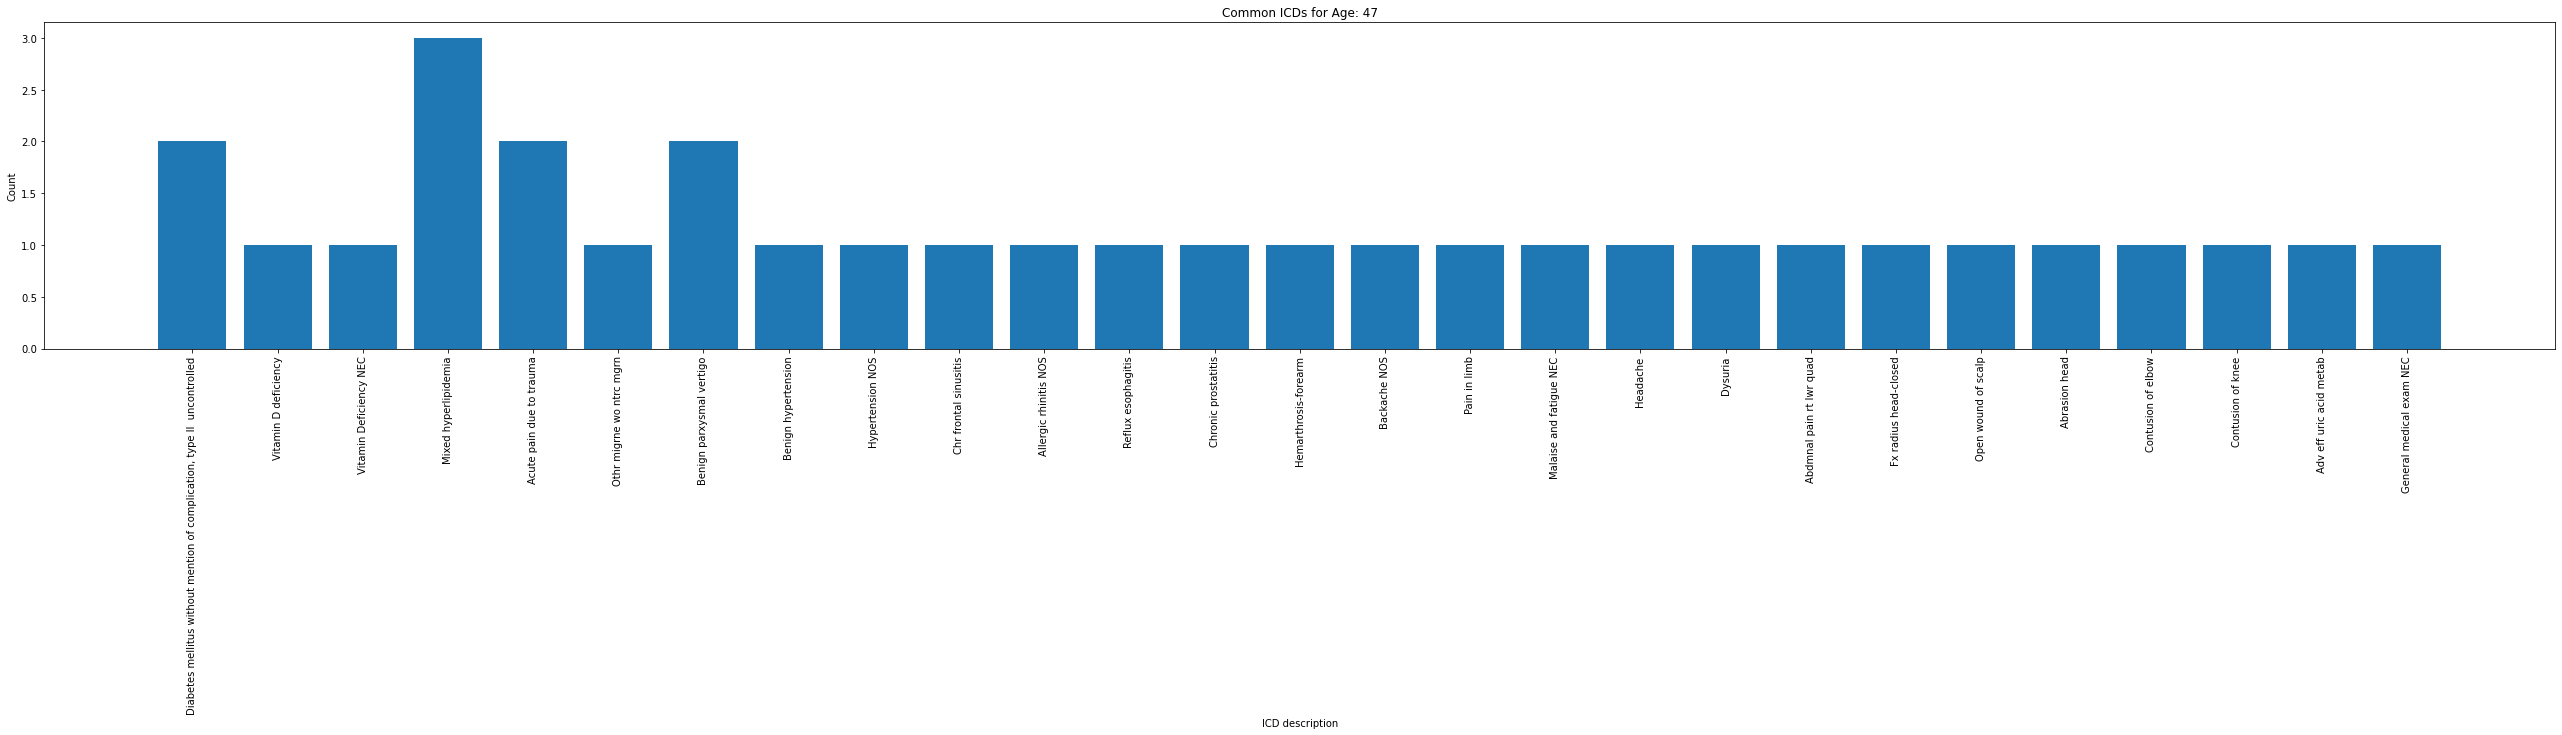

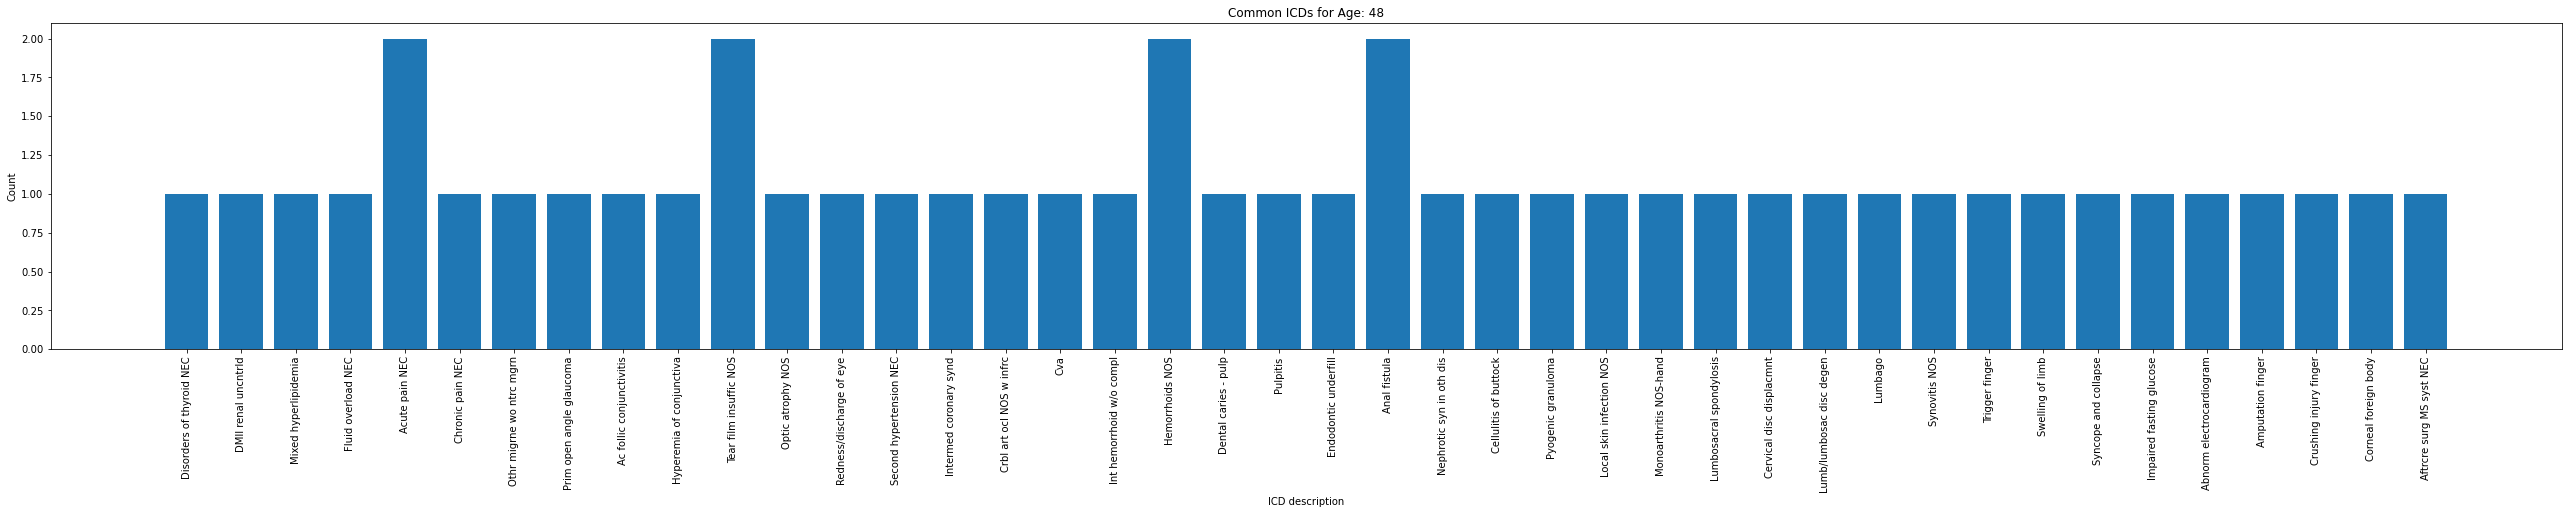

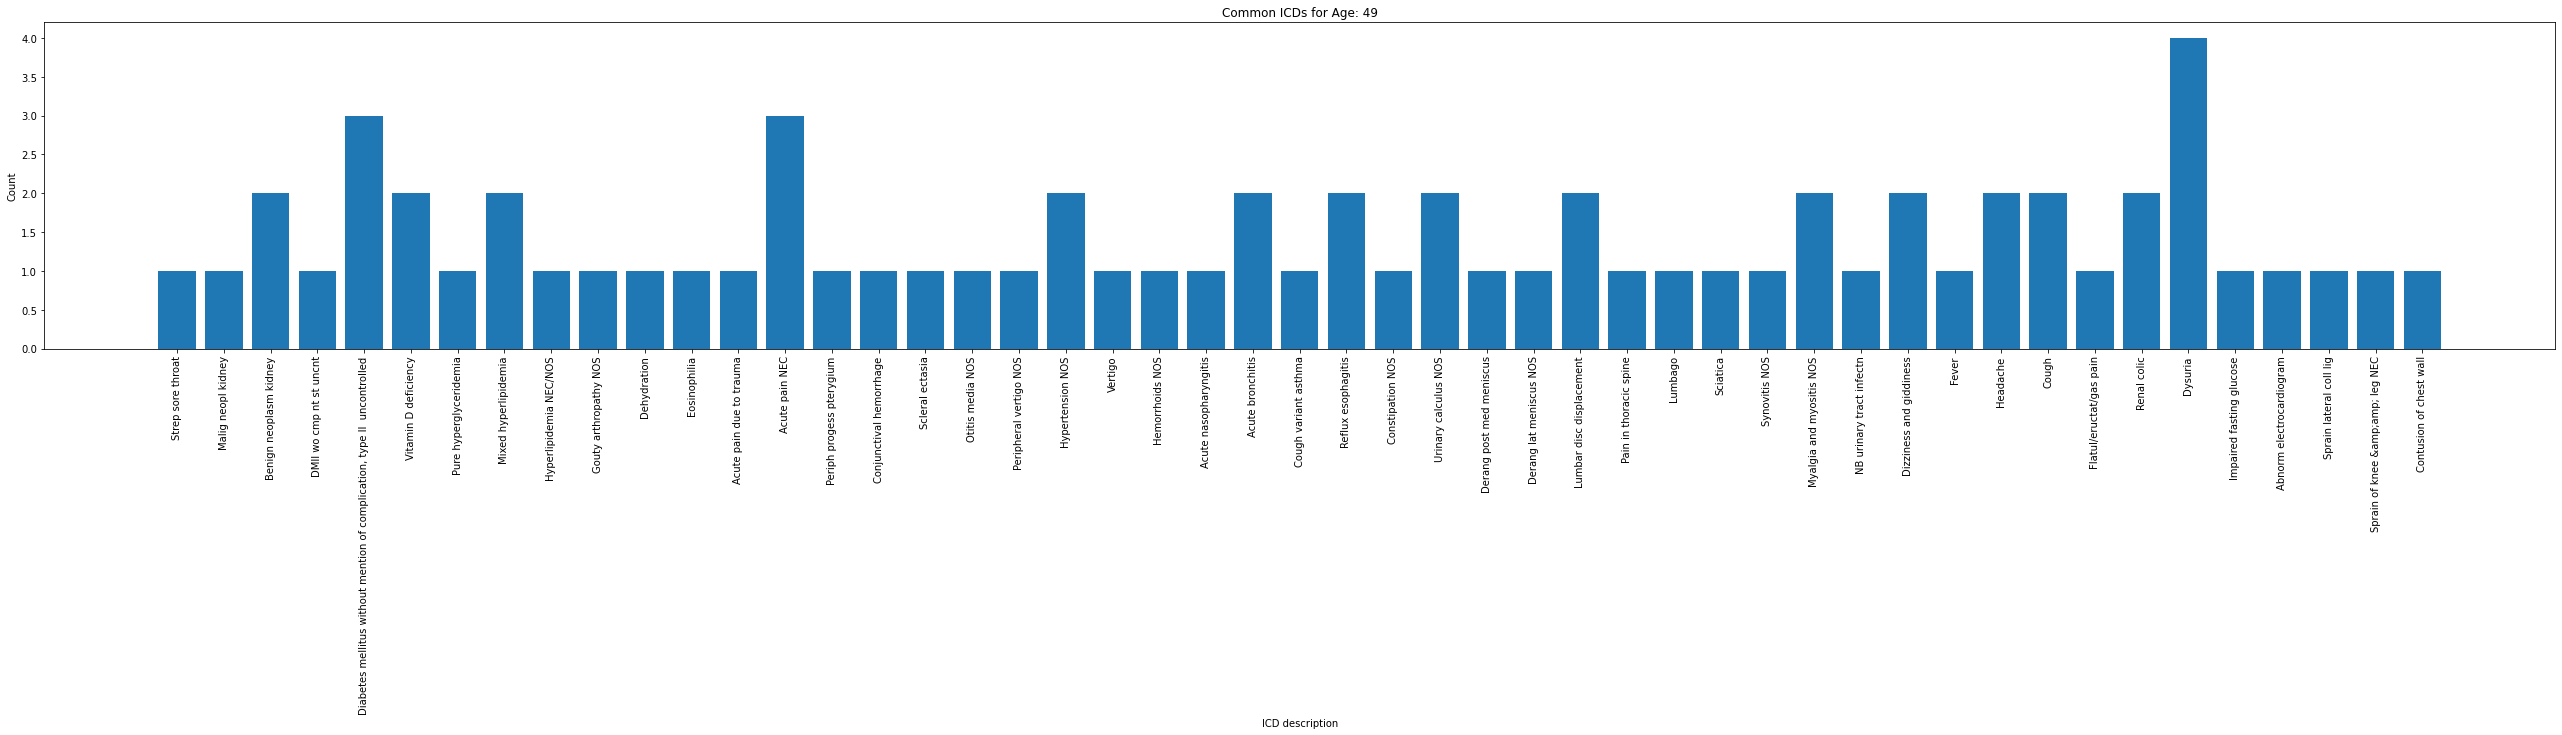

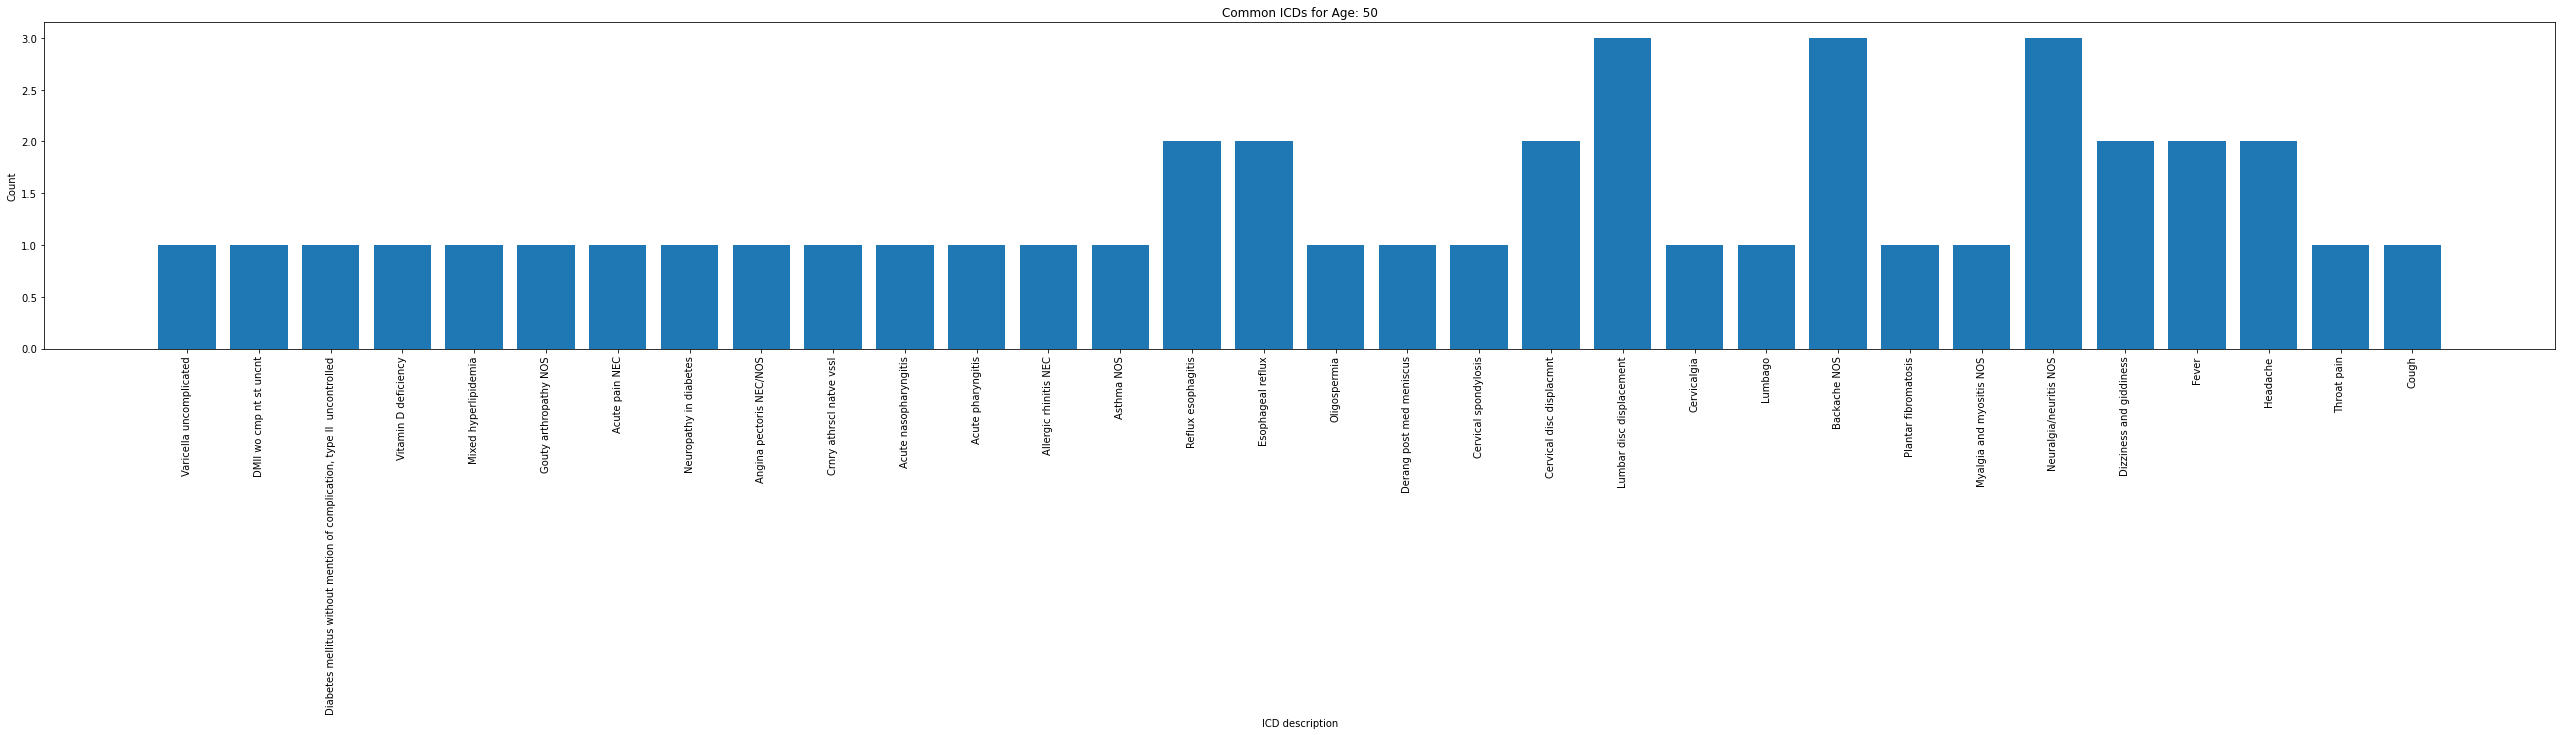

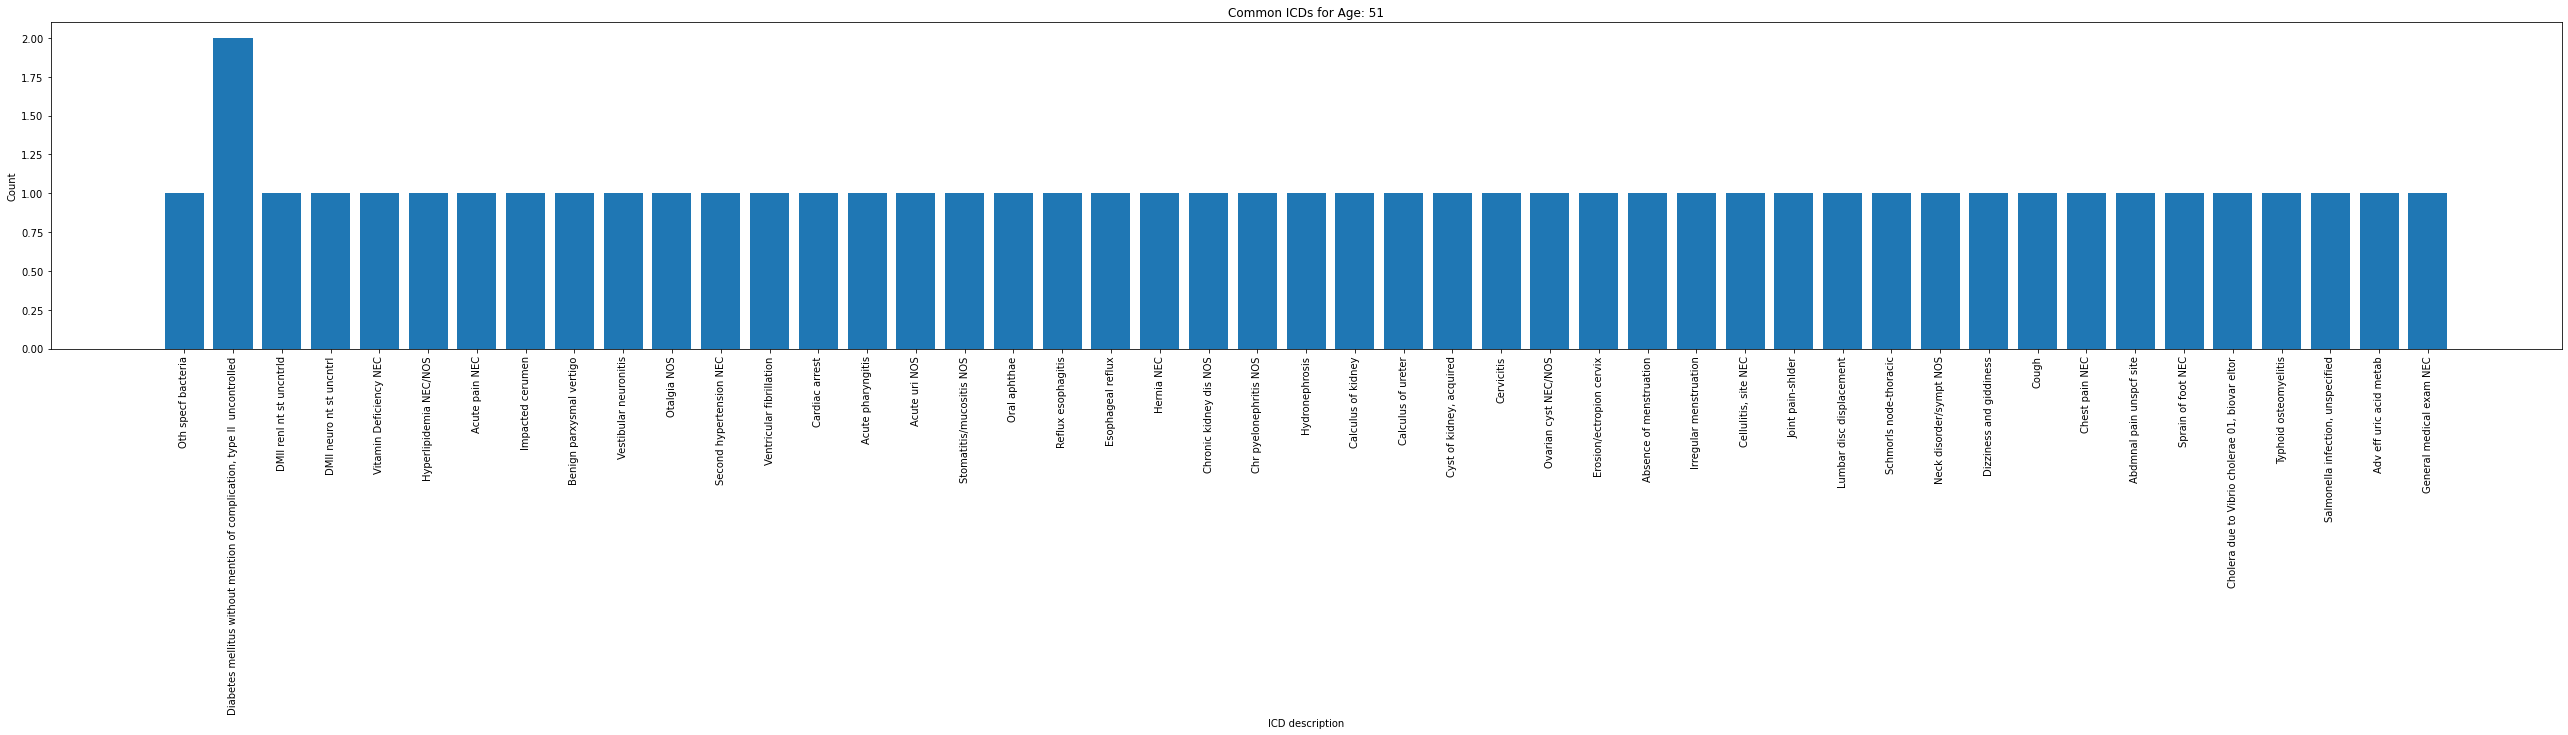

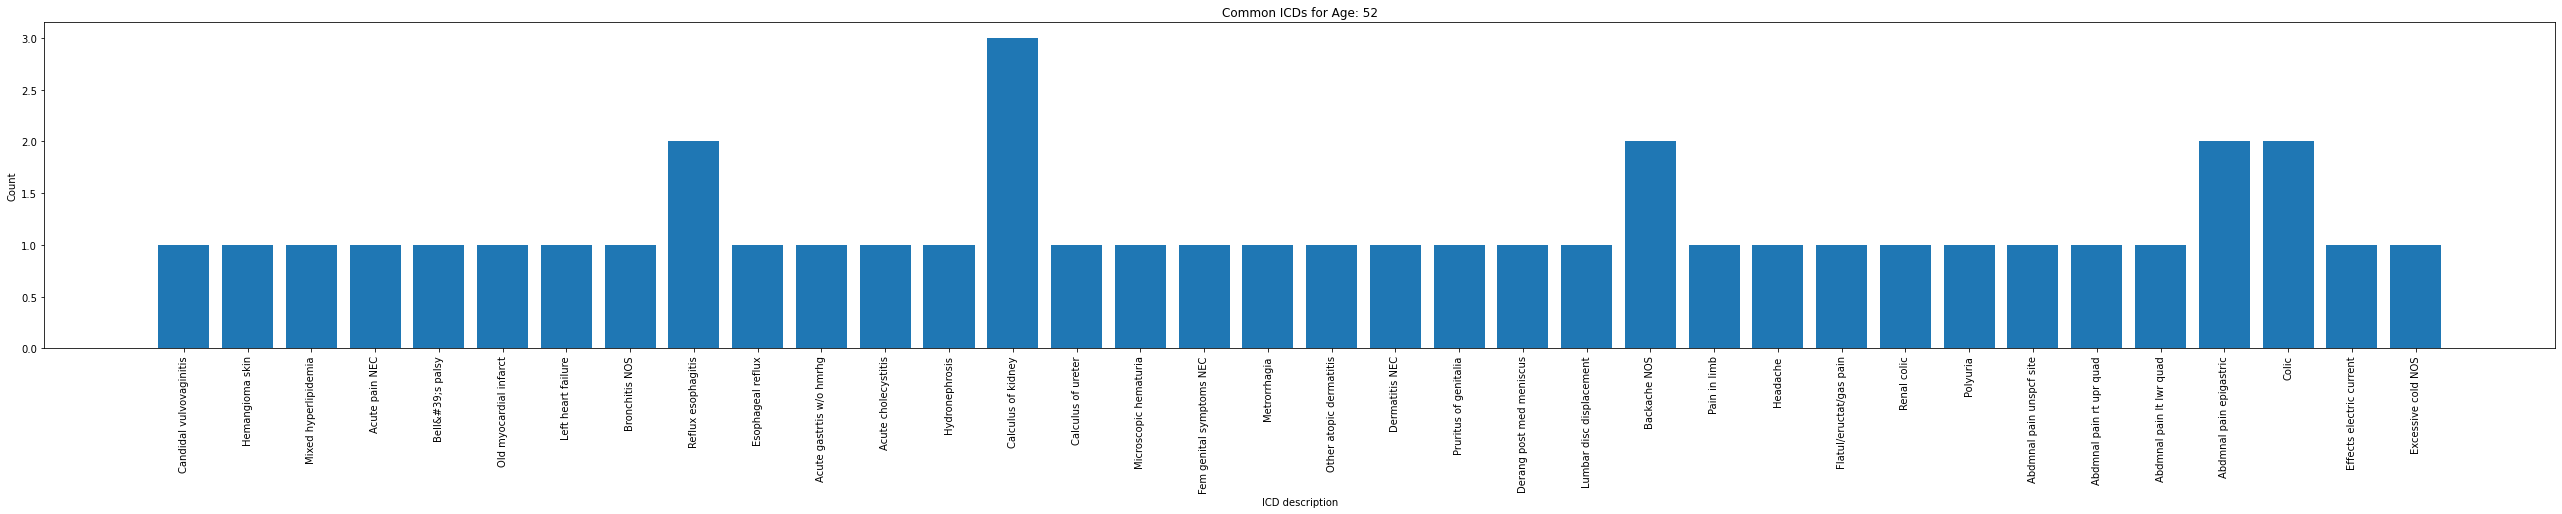

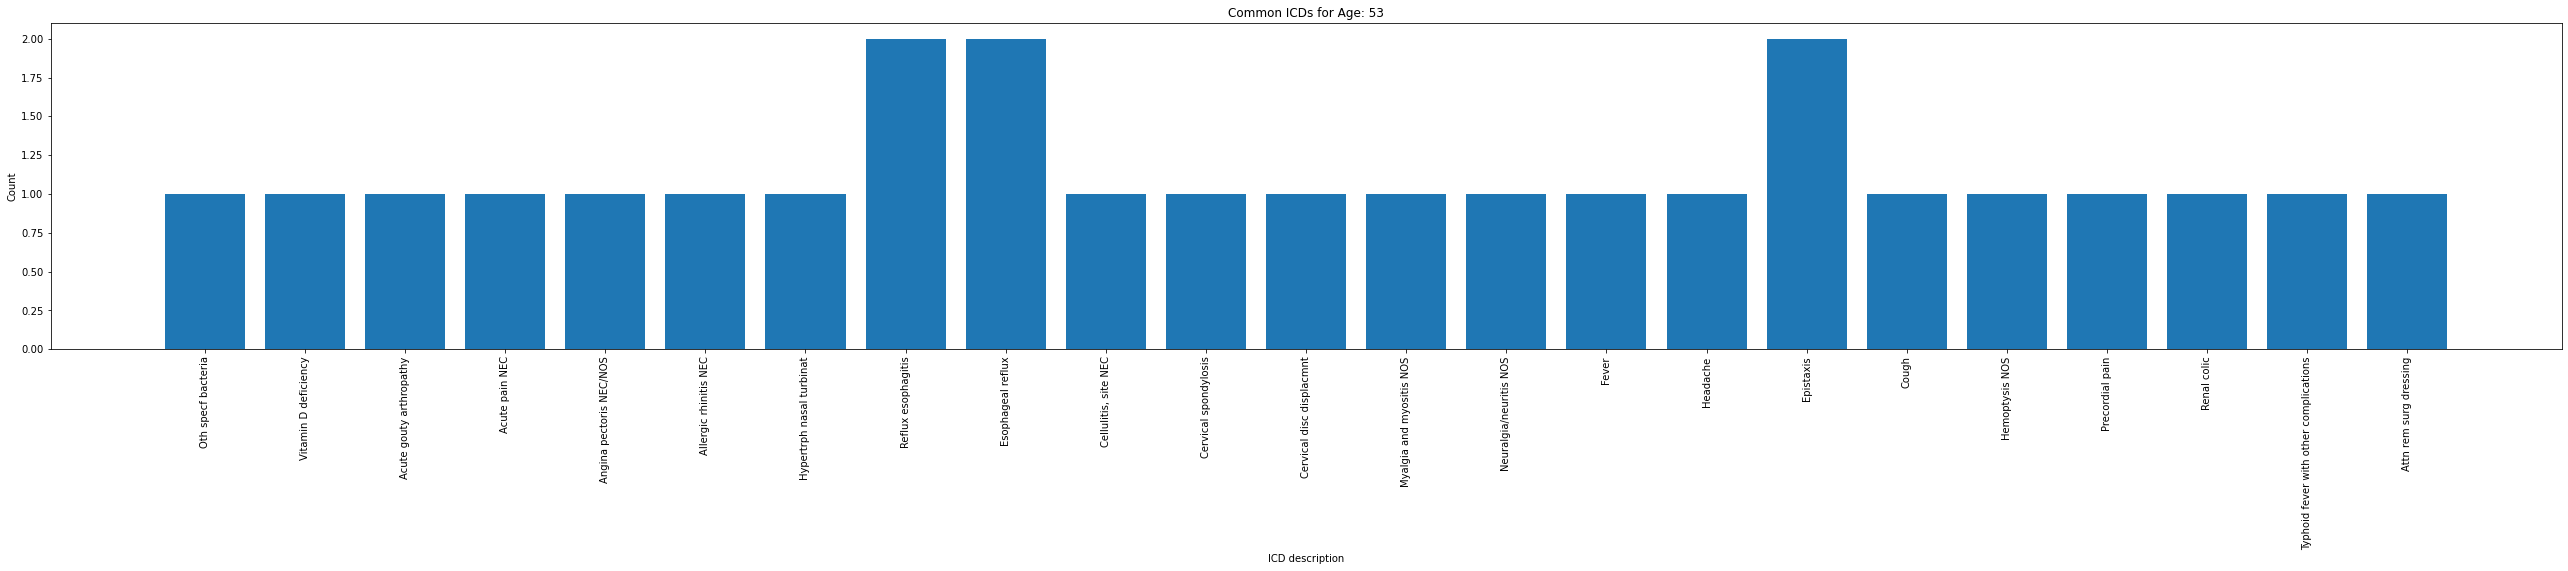

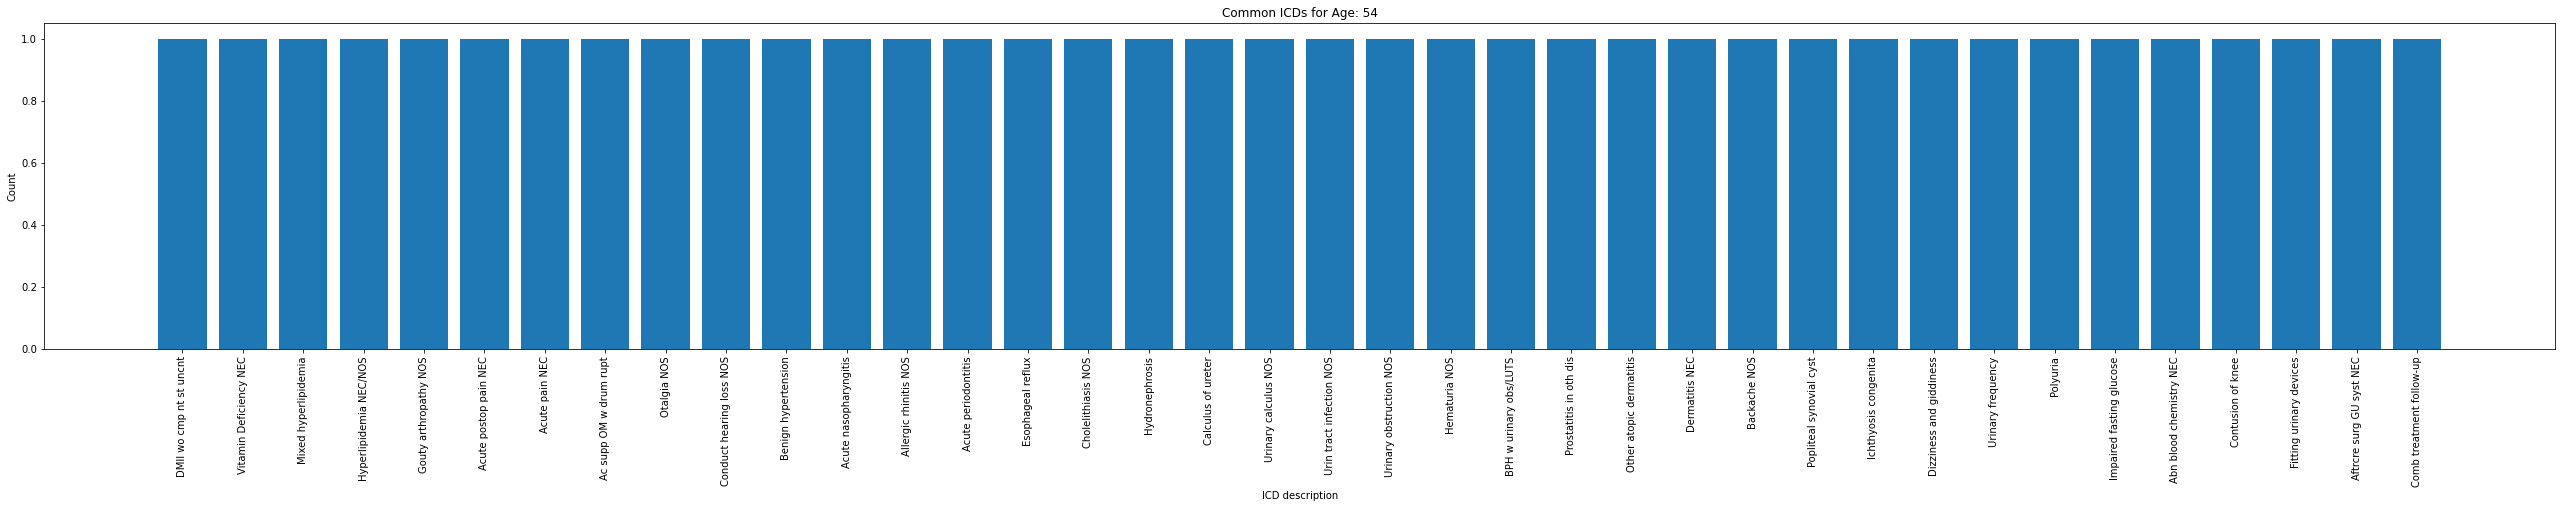

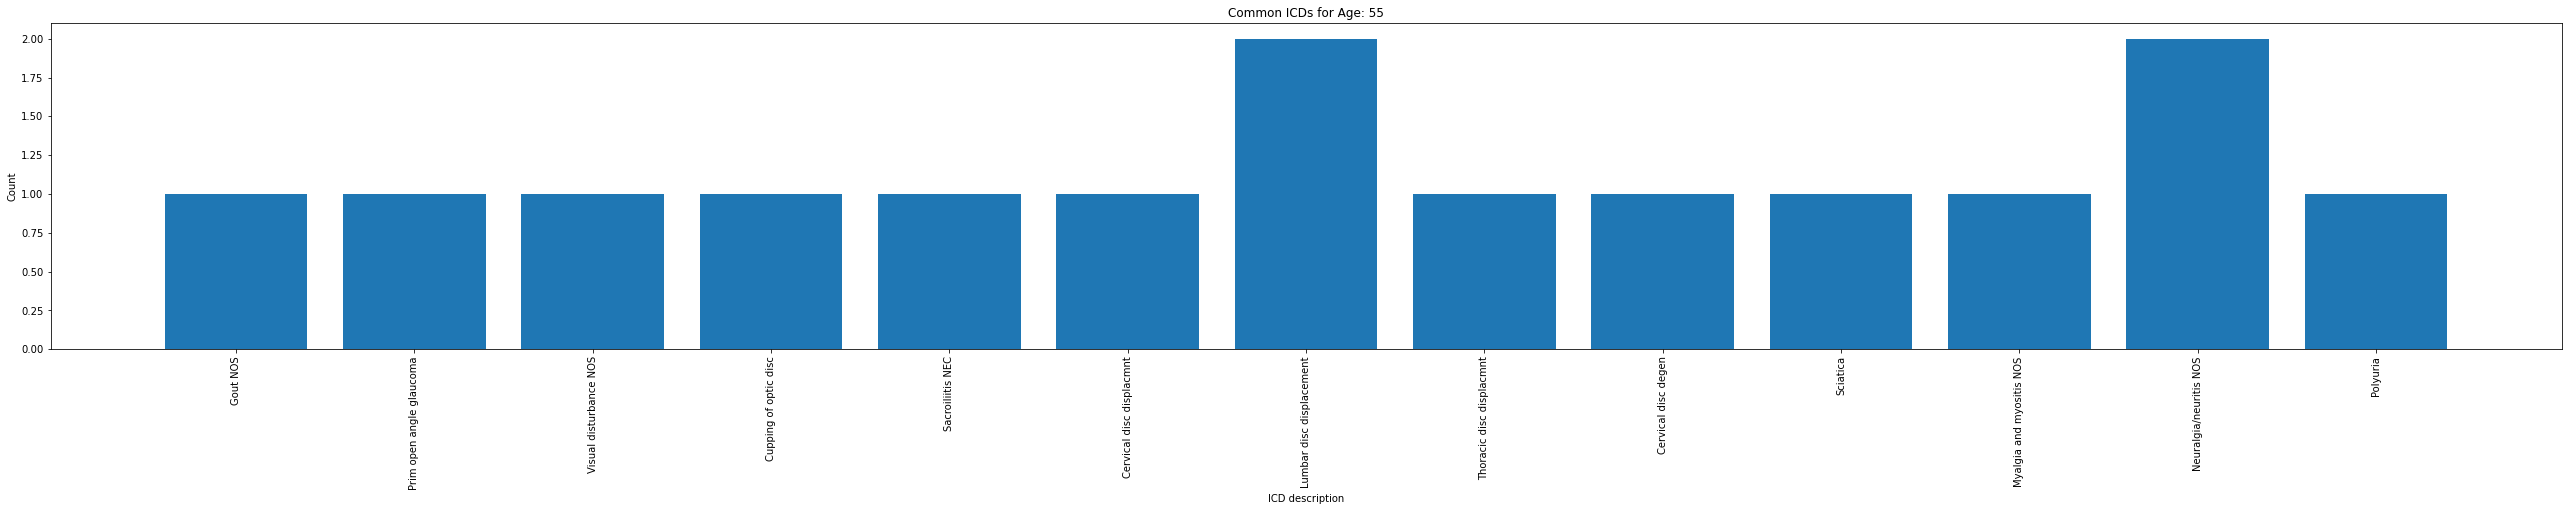

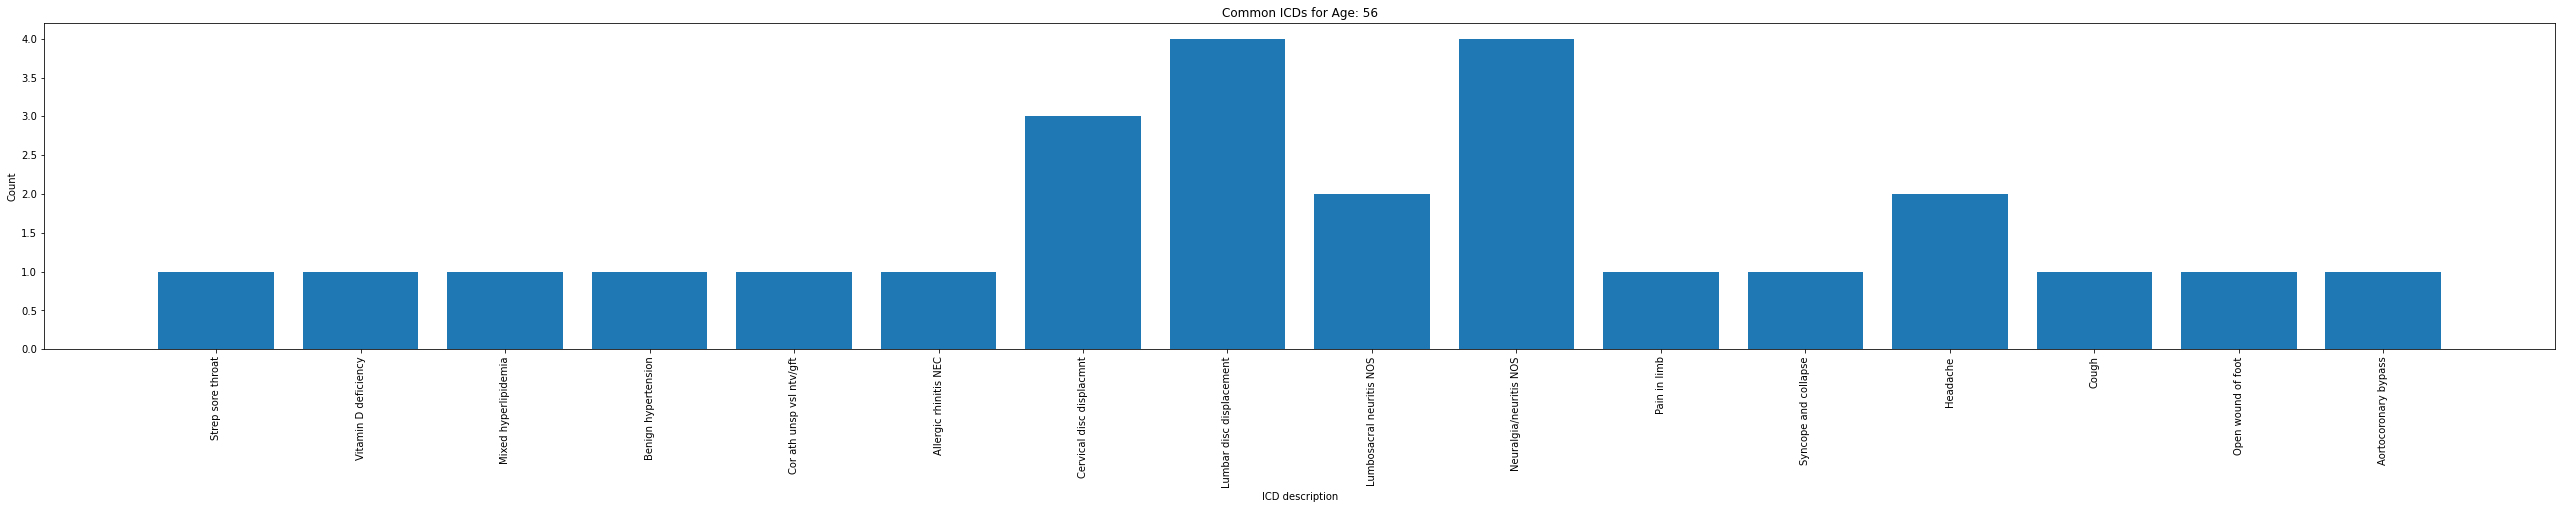

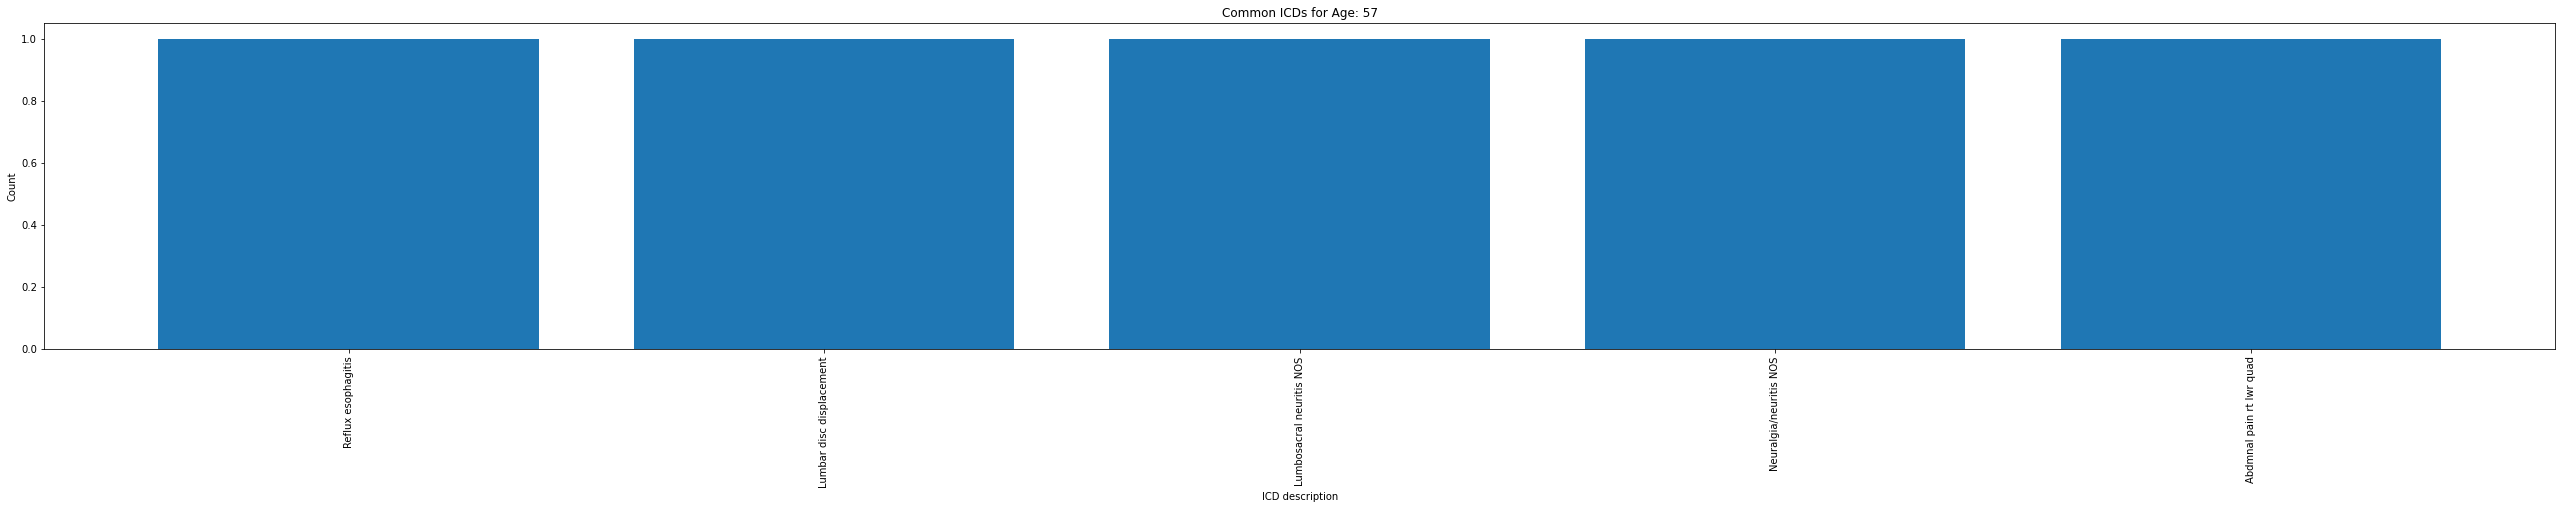

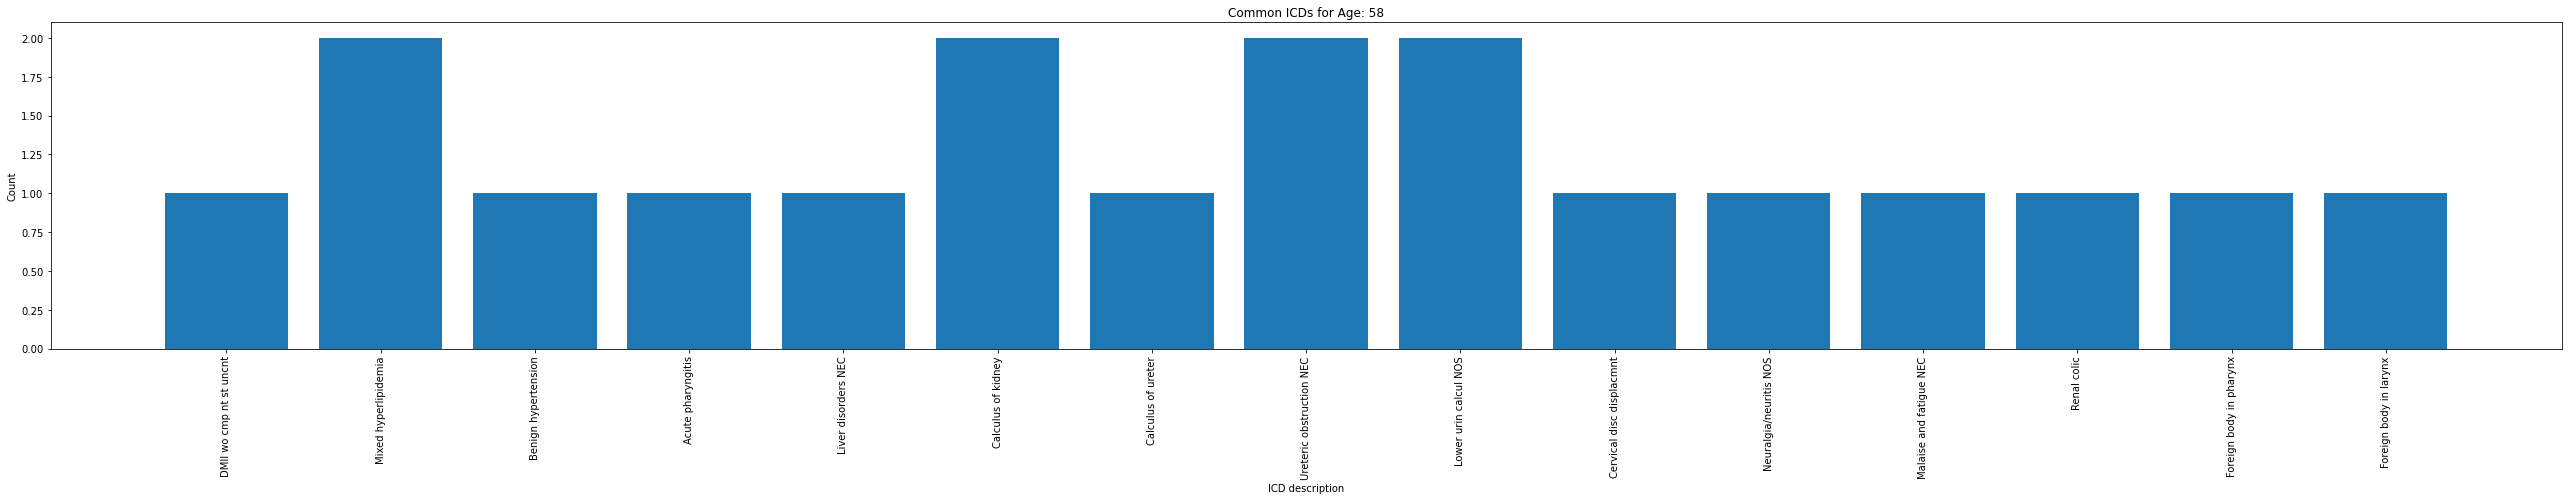

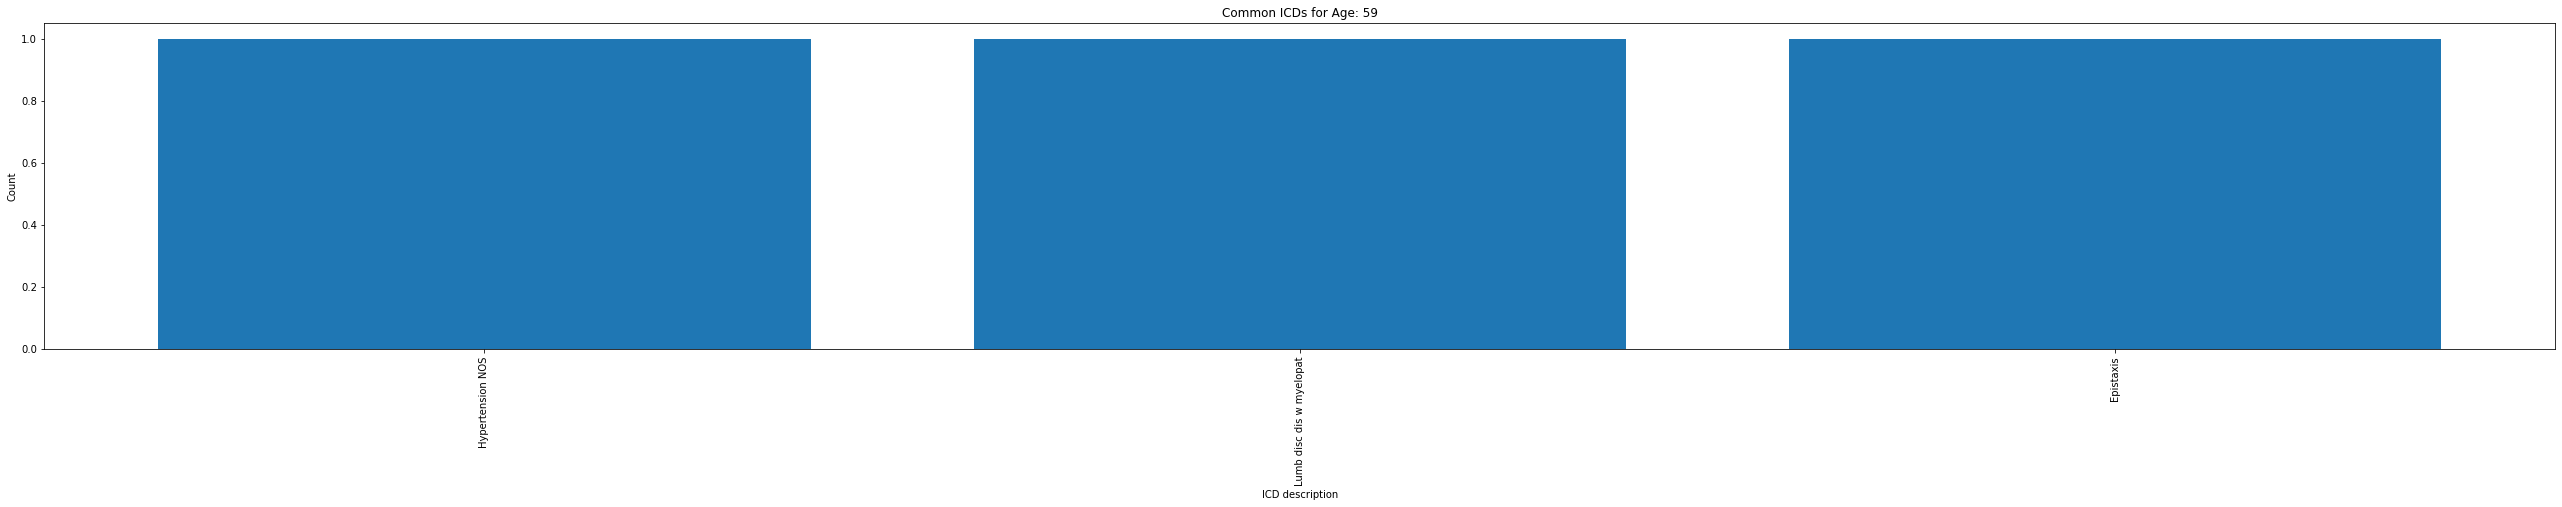

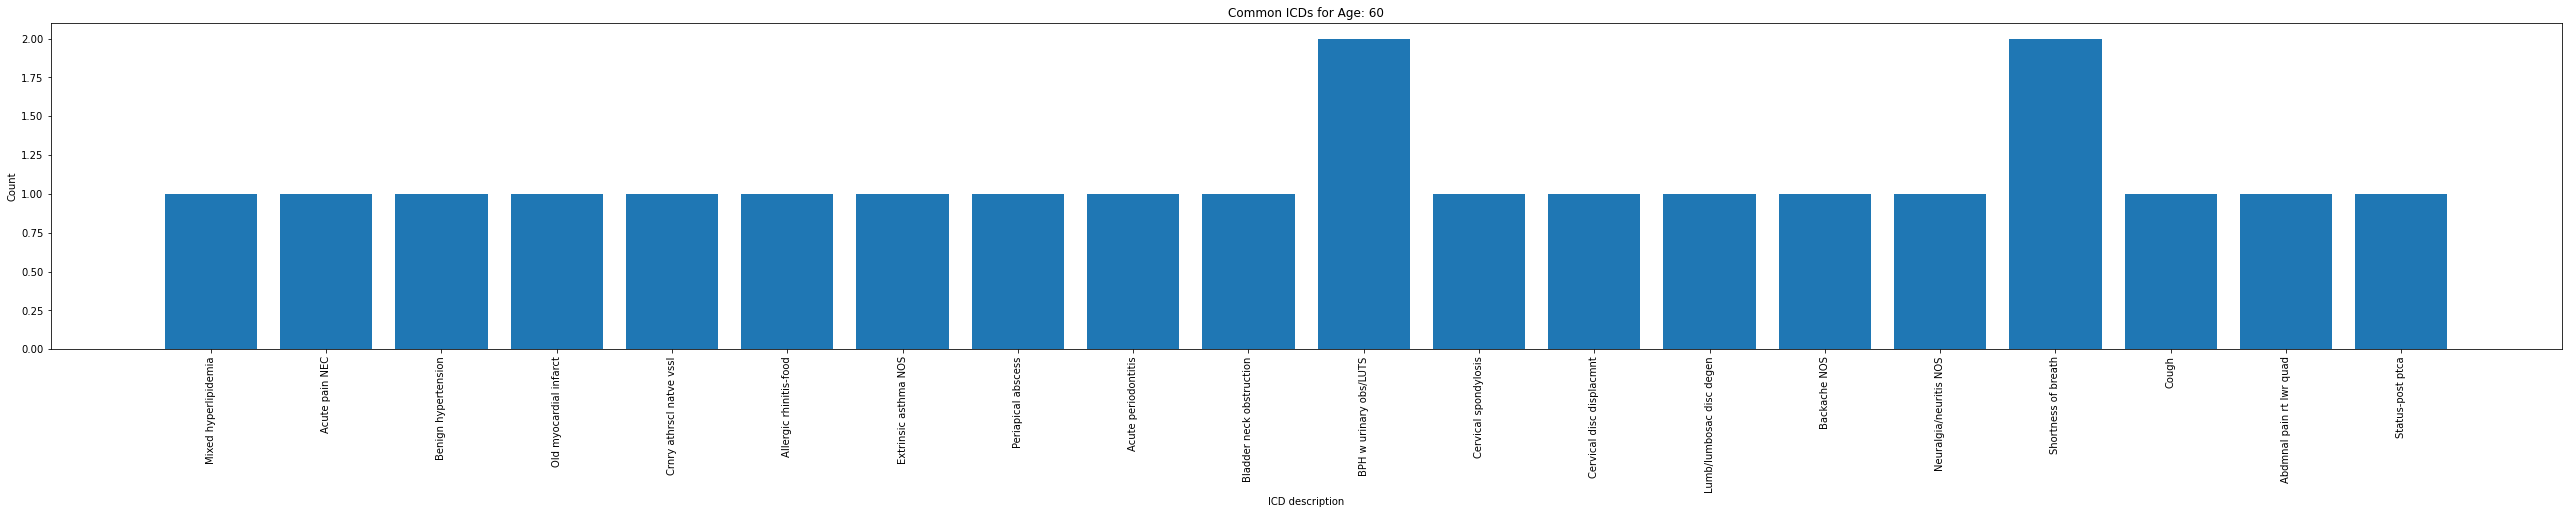

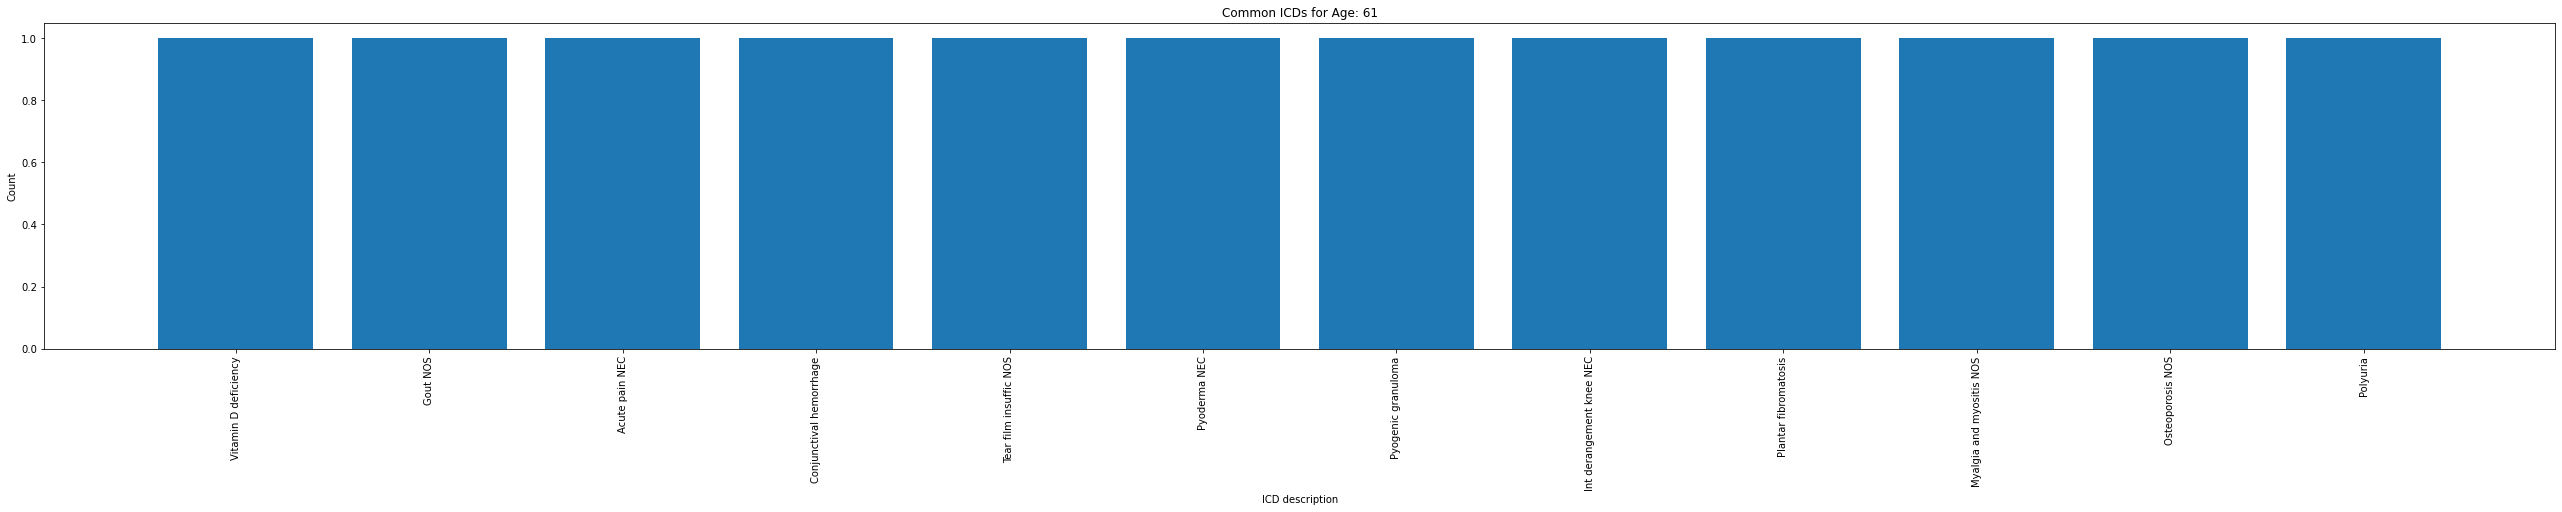

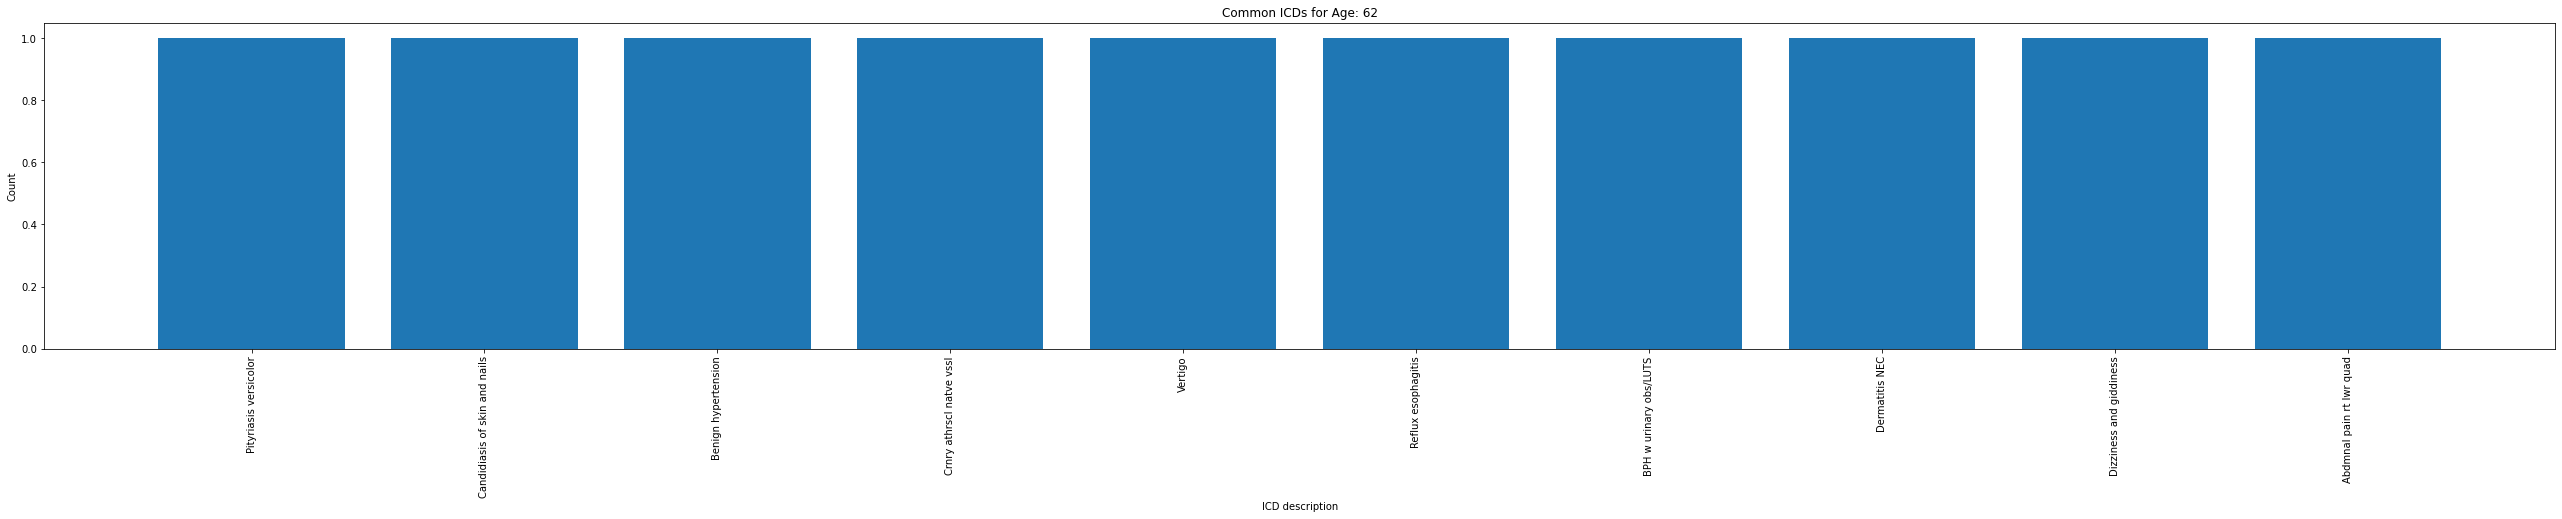

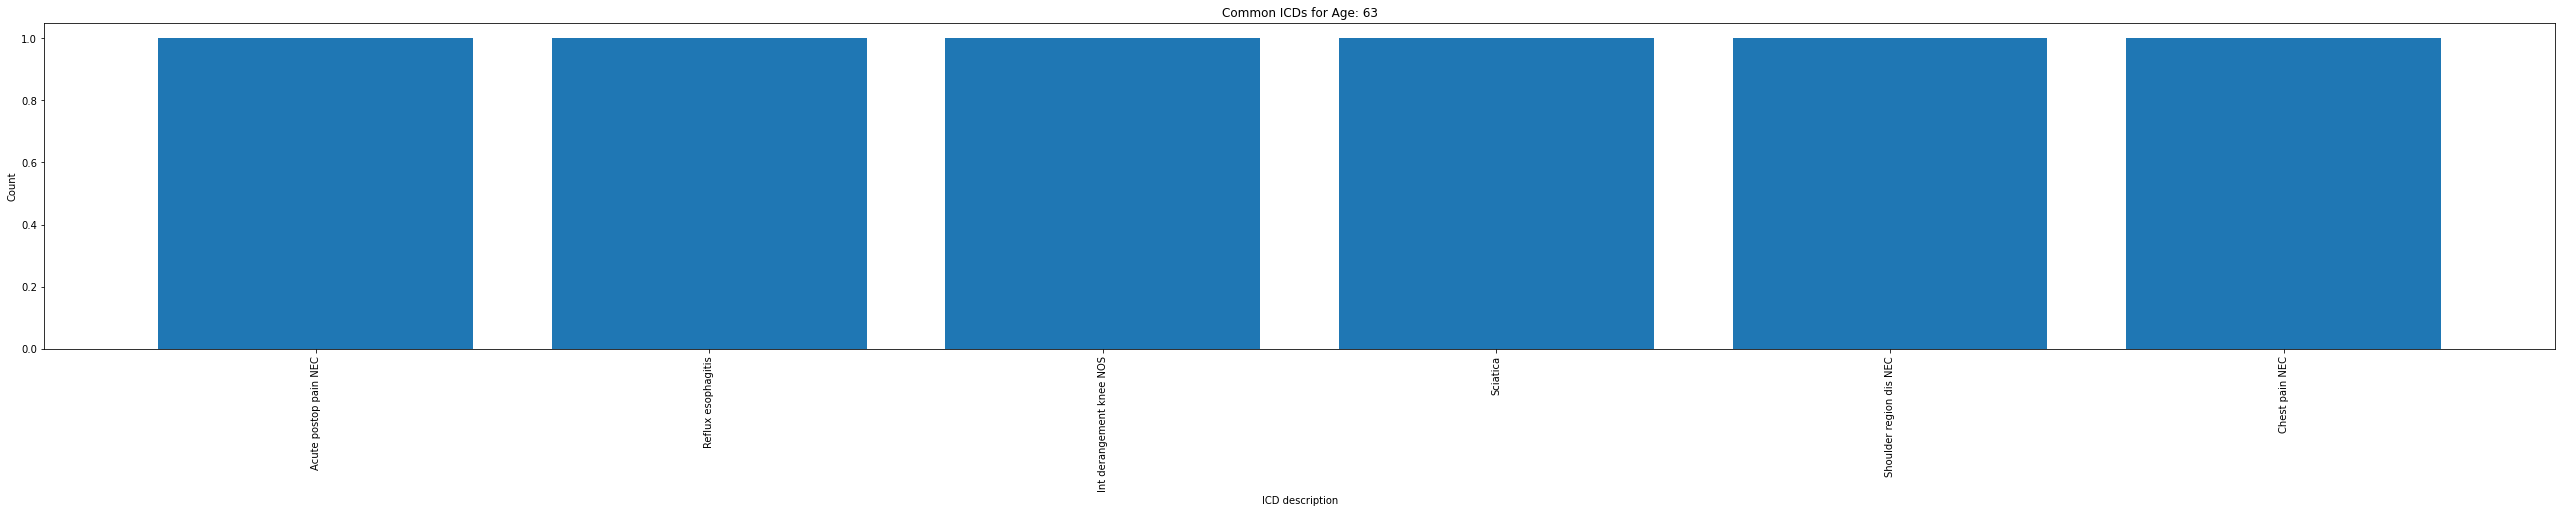

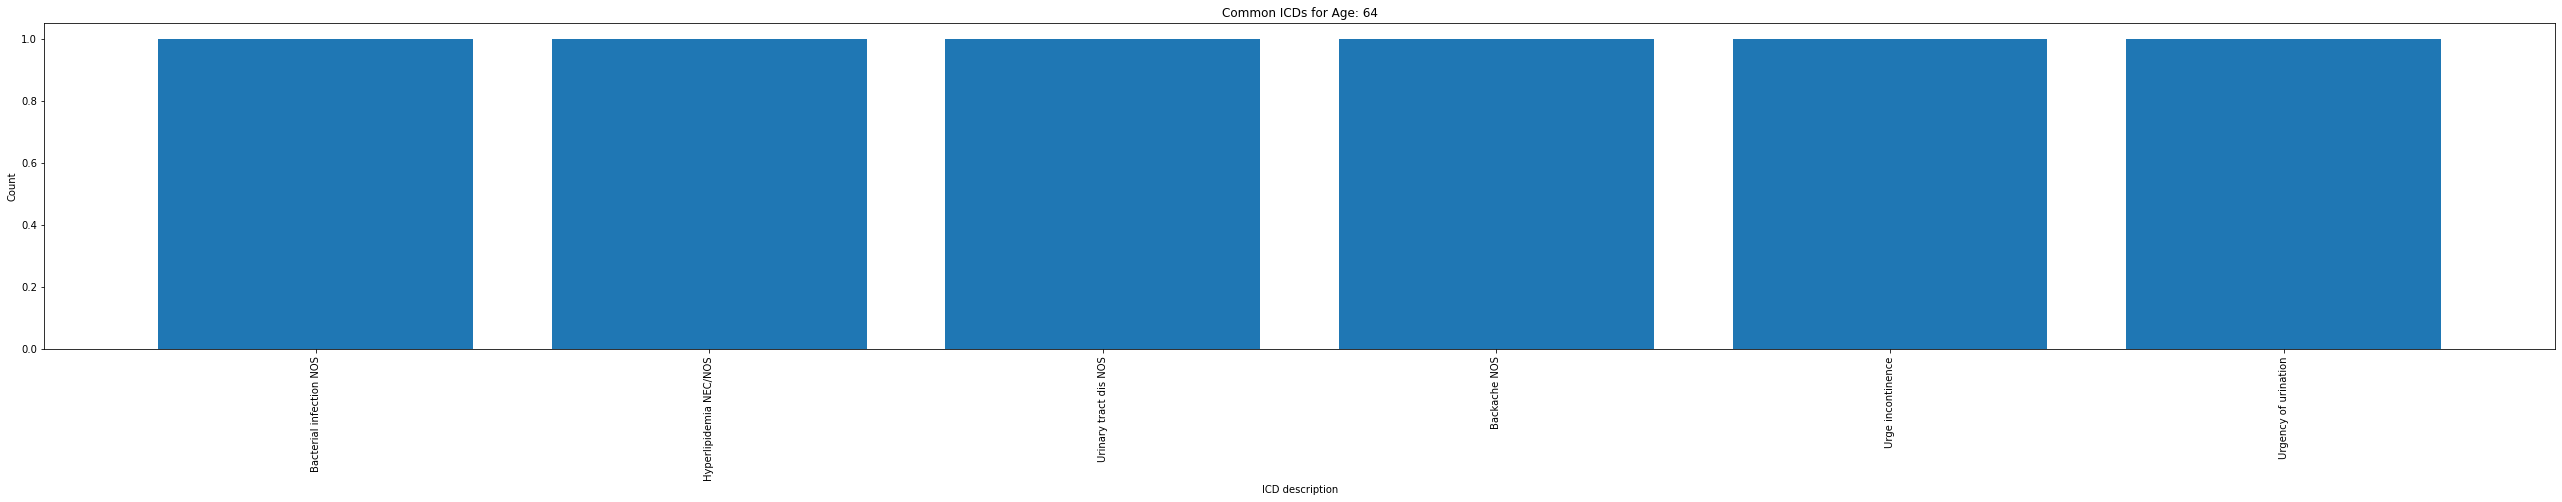

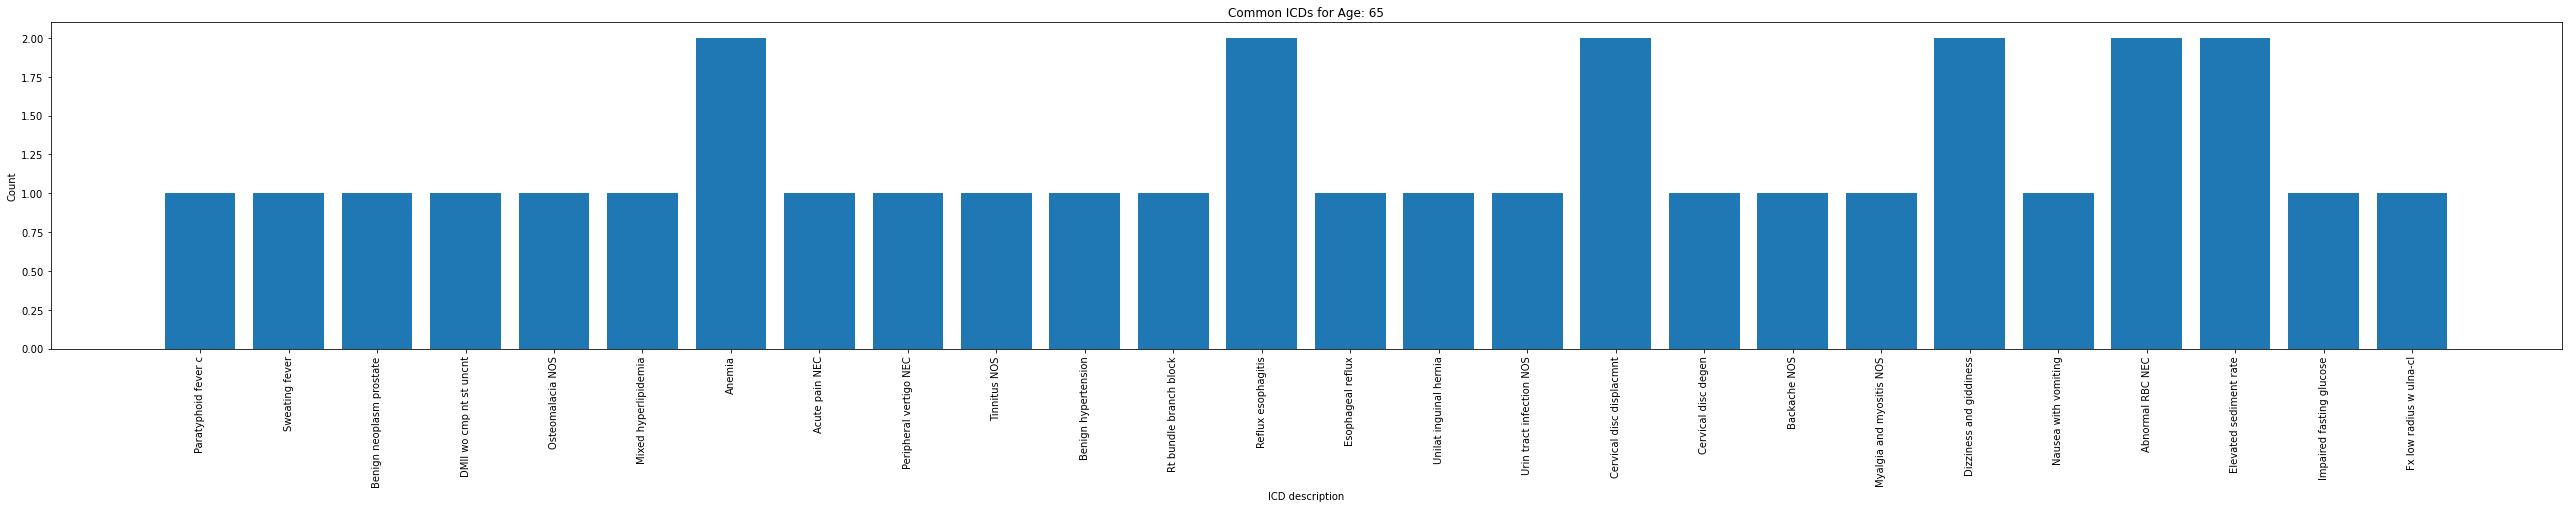

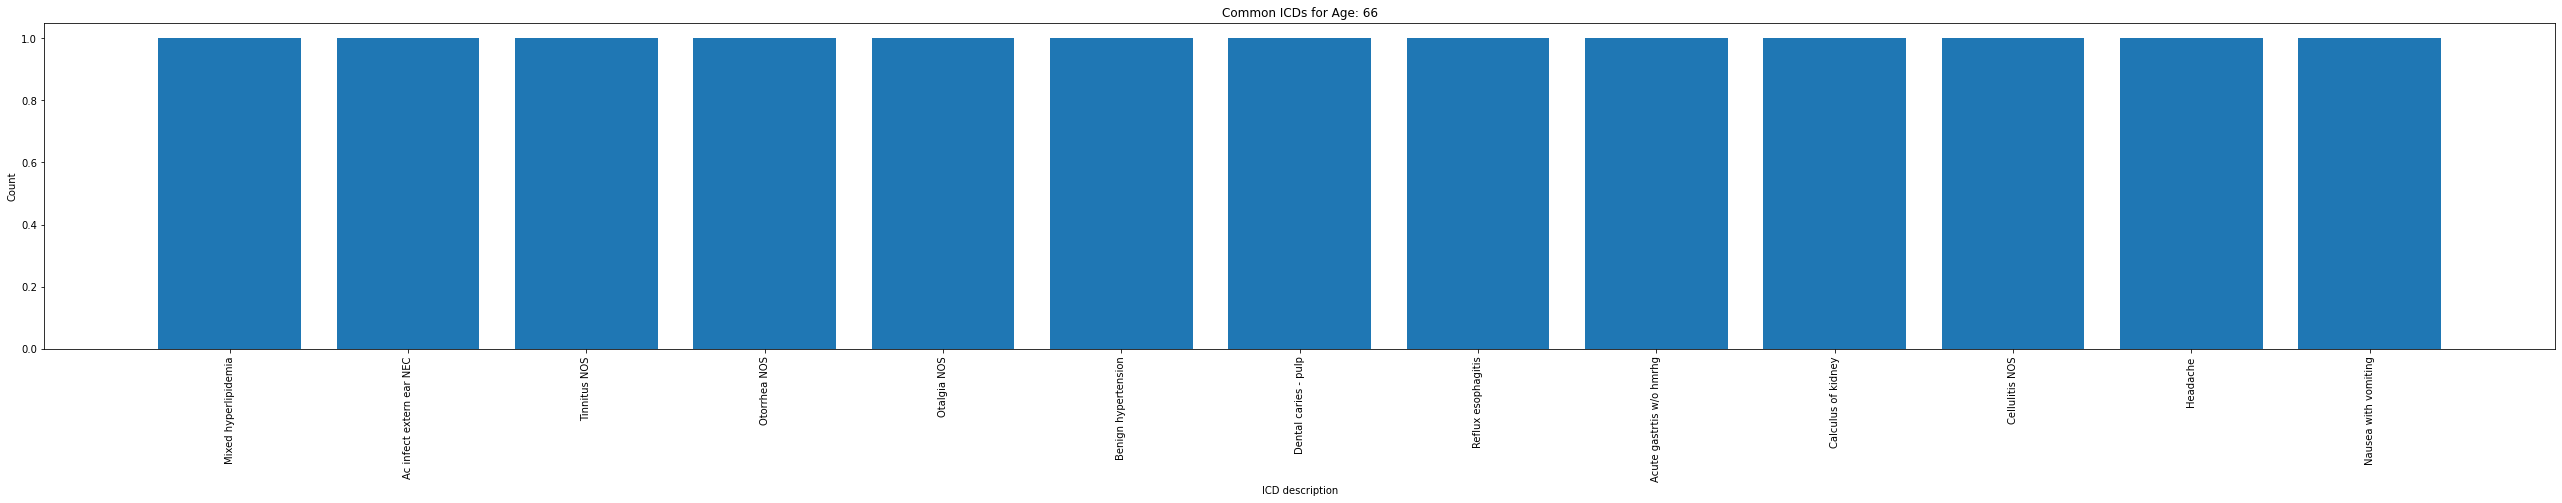

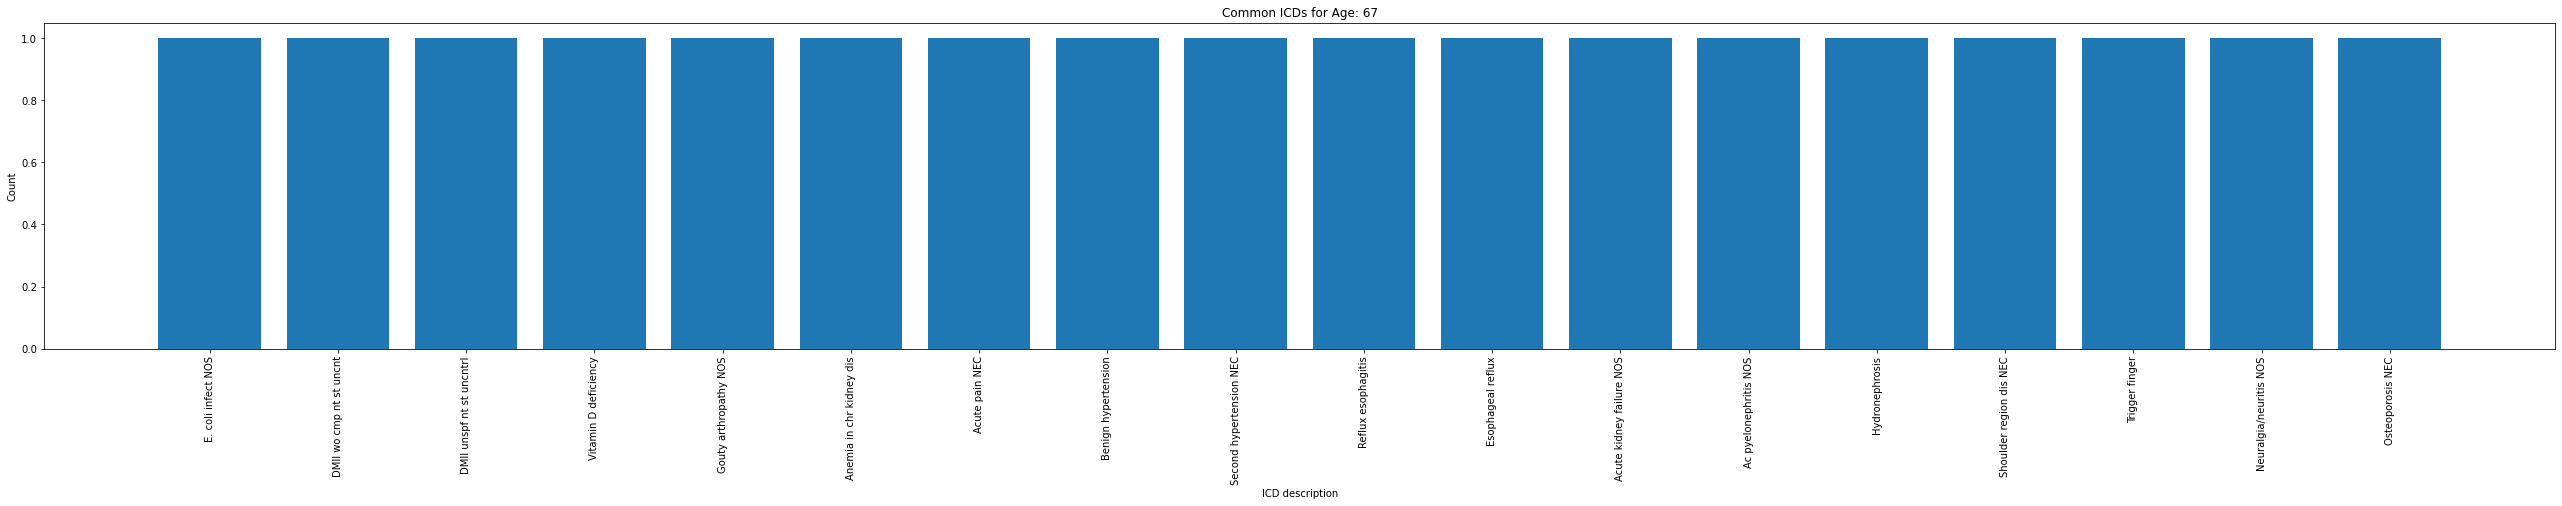

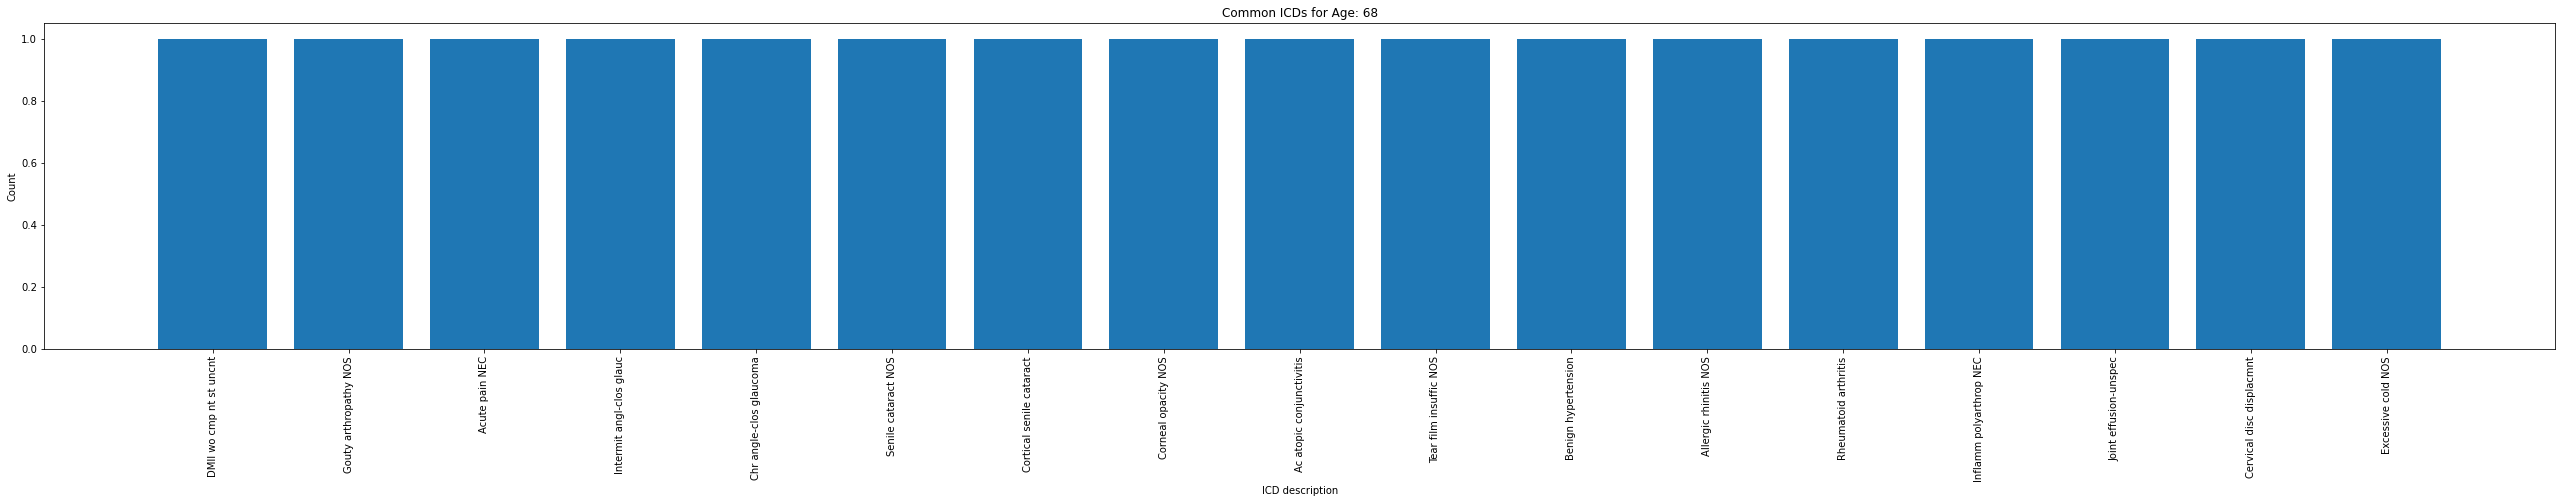

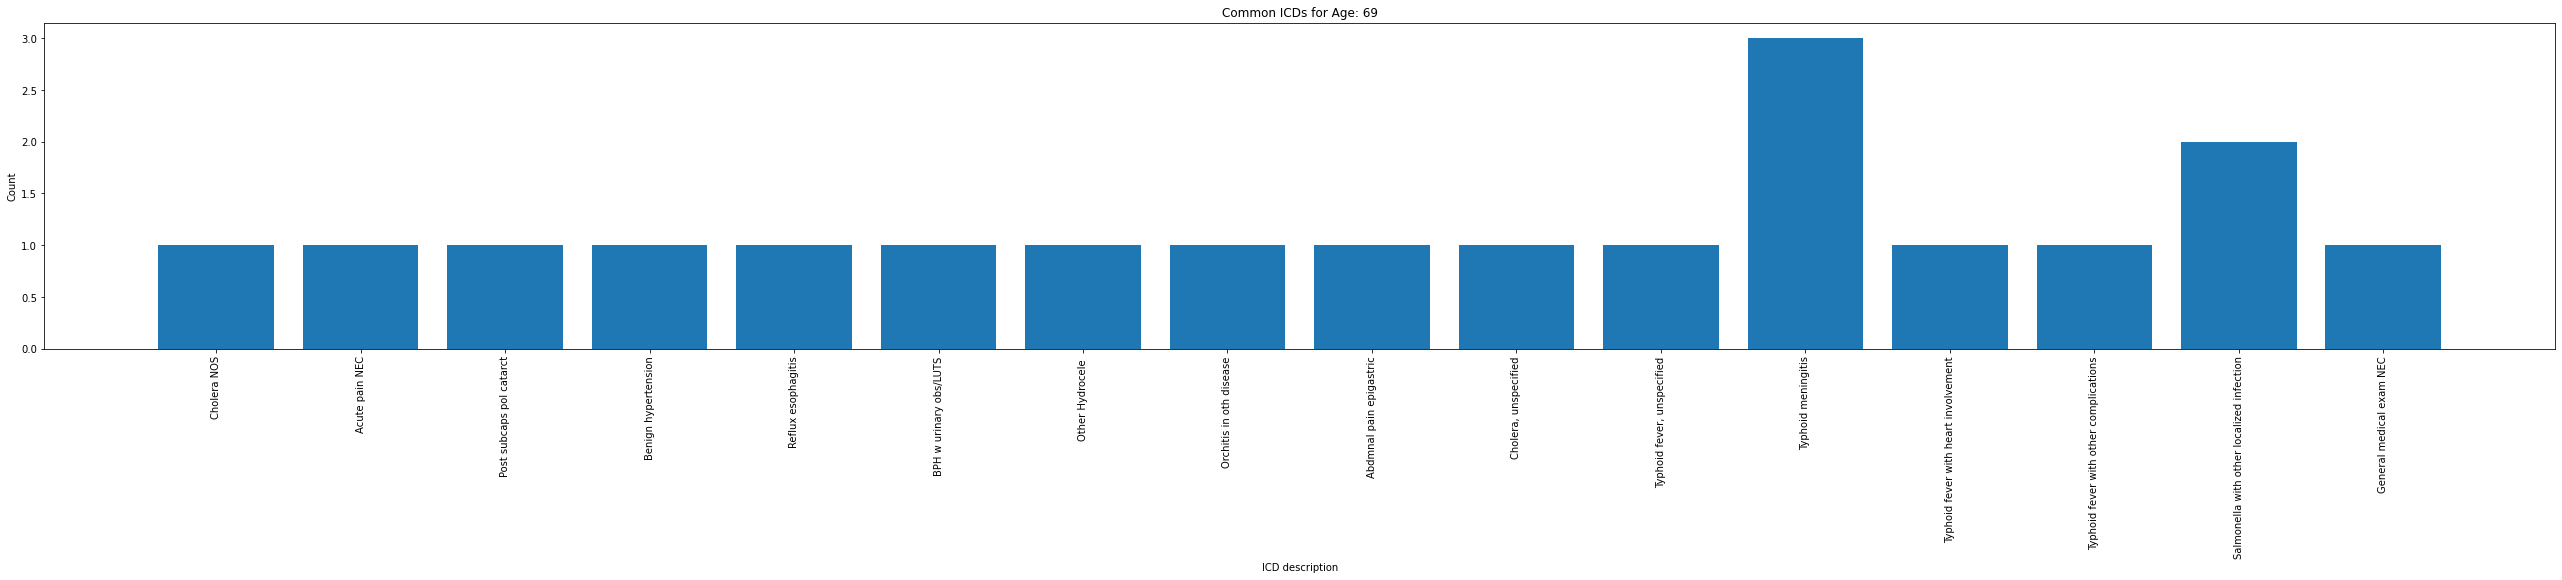

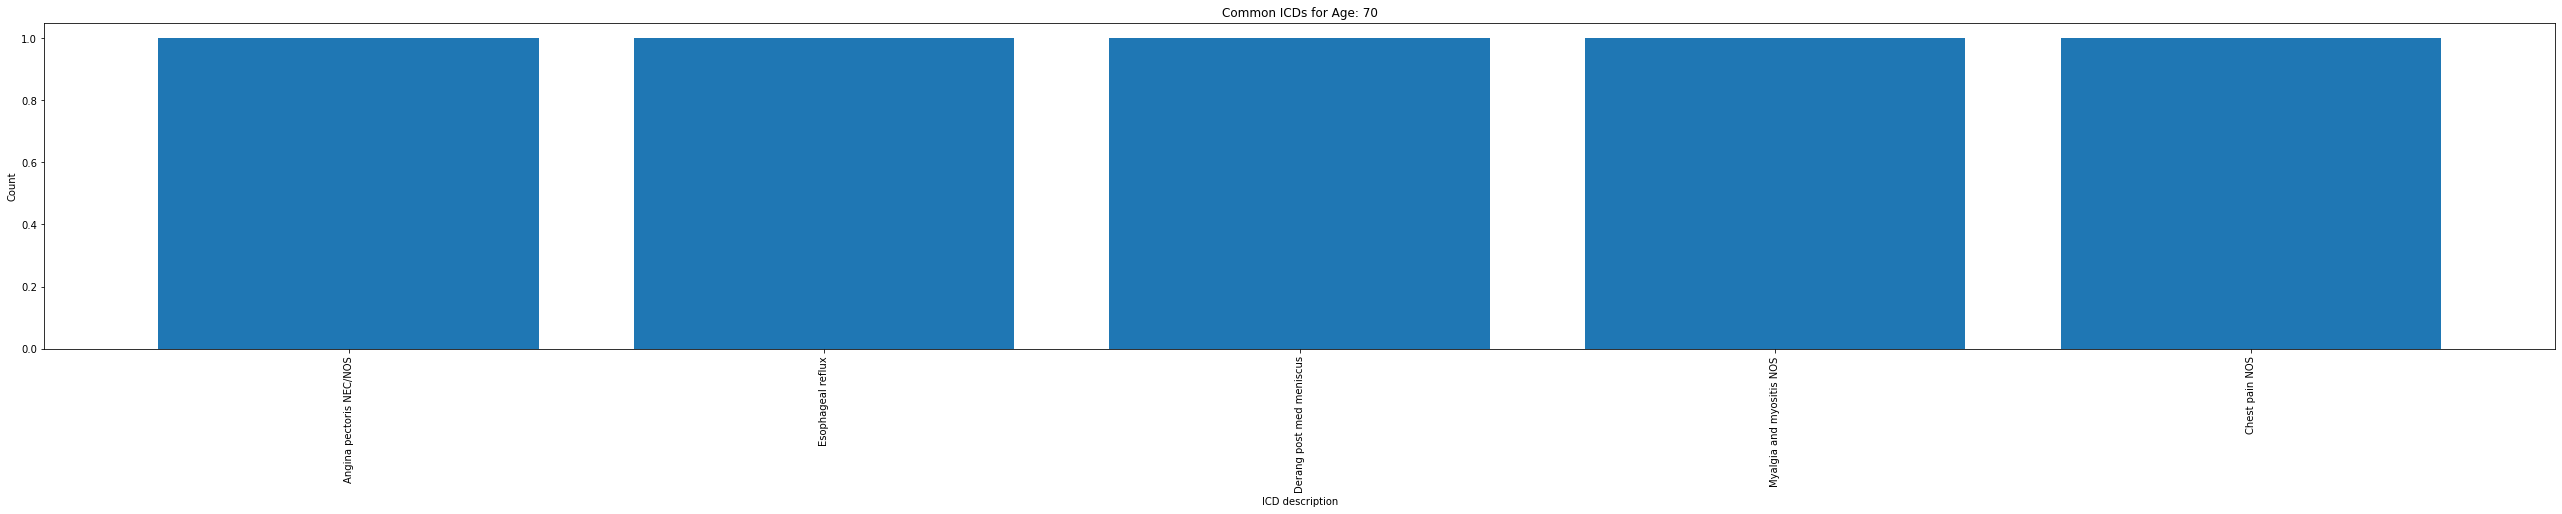

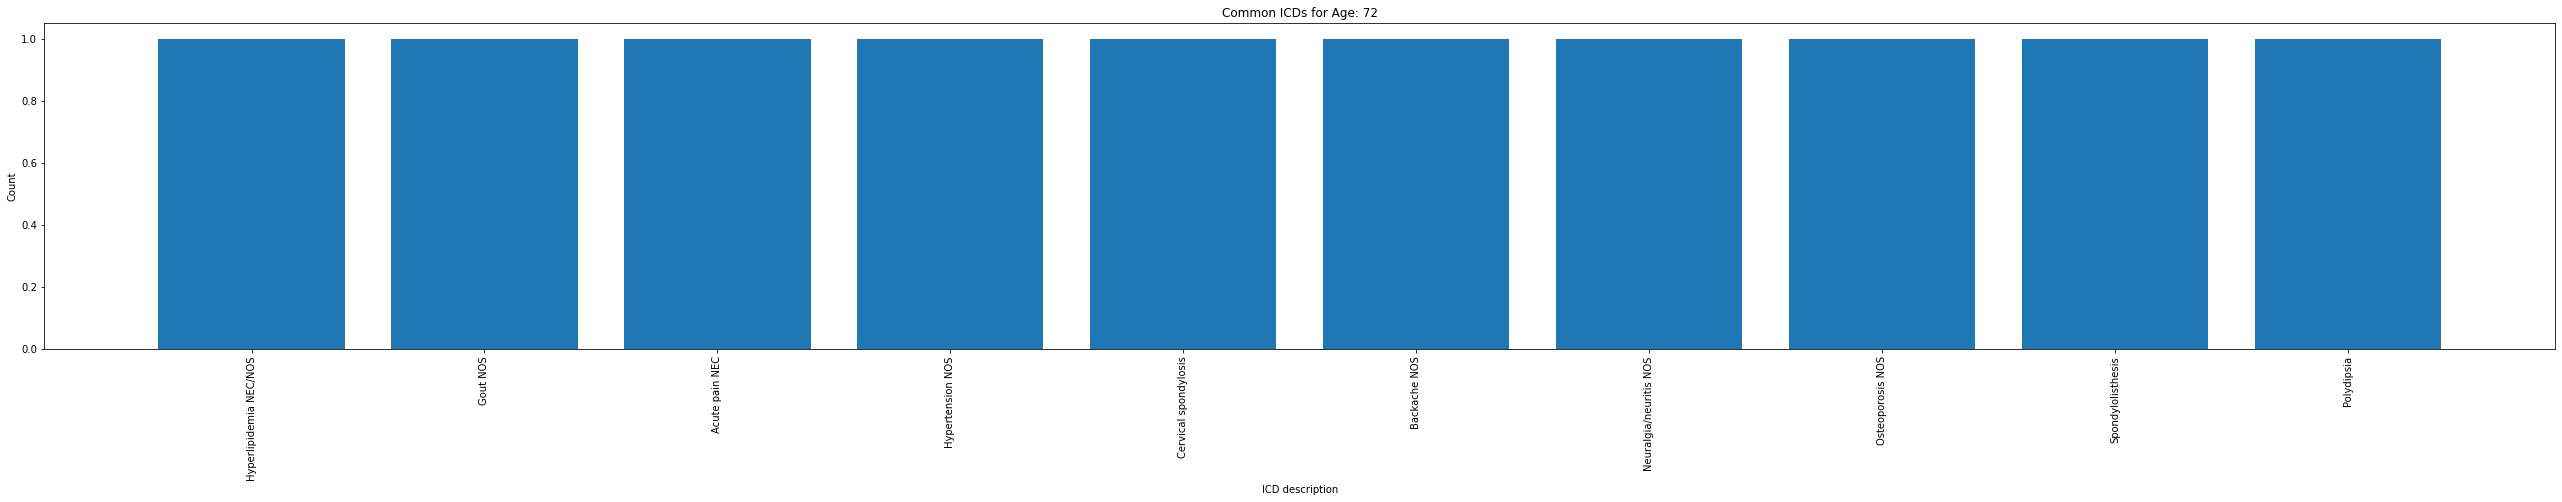

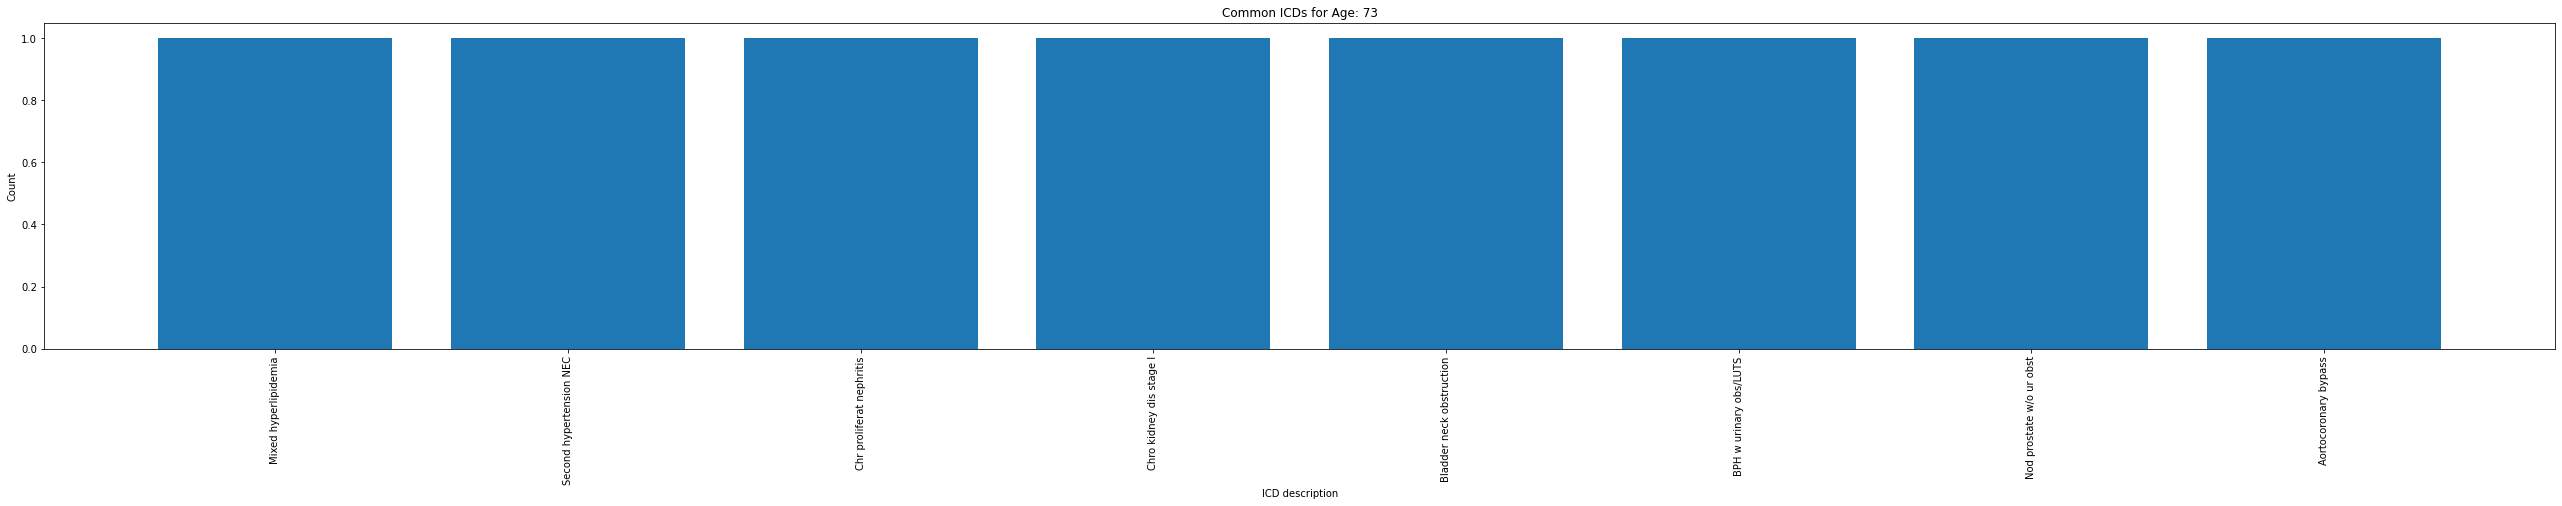

In [15]:
for age, group in new.groupby('Age'):
    plt.figure(figsize=(45,6))
    plt.bar(group['ICDDesc'], group['count'])
    plt.title(f'Common ICDs for Age: {age}')
    plt.xlabel('ICD description')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    

In [16]:
df.head()

0   PatID         DOB  Gender ICDCode                         ICDDesc  Age  \
0   31881  1954-01-01    Male  A01.01              Typhoid meningitis   69   
1   31881  1954-01-01    Male  A01.00      Typhoid fever, unspecified   69   
2   30030  1986-11-15  Female     1.9                     Cholera NOS   36   
3  174649  1989-01-04    Male   A01.4  Paratyphoid fever, unspecified   34   
4  174648  1994-04-10    Male  A01.00      Typhoid fever, unspecified   29   

0 age_group  
0       35+  
1       35+  
2       35+  
3     30-35  
4     25-30

In [17]:
grouped_data = df.groupby(['age_group', 'ICDCode', 'ICDDesc'])['PatID'].count().reset_index()
grouped_data.rename(columns={'PatID': 'count'}, inplace=True)


In [18]:
#Data for Age Between 0-15, 16-35, 35< to get which common ICD are present .

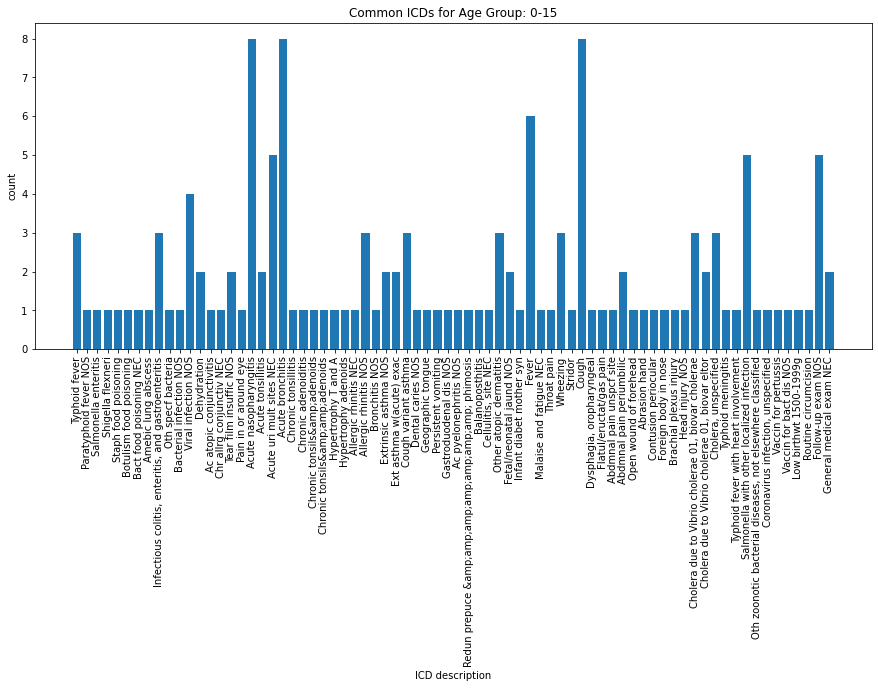

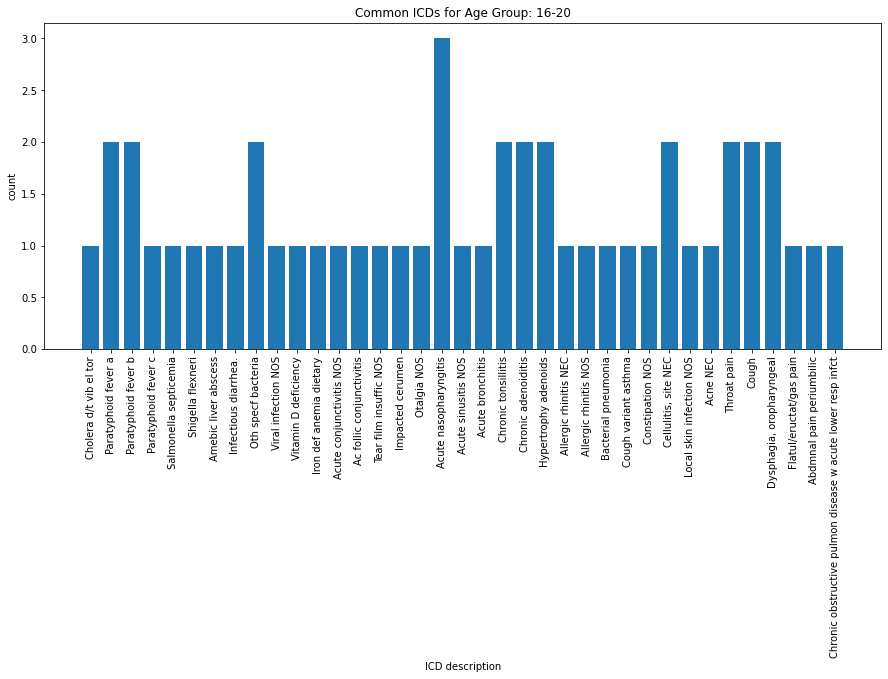

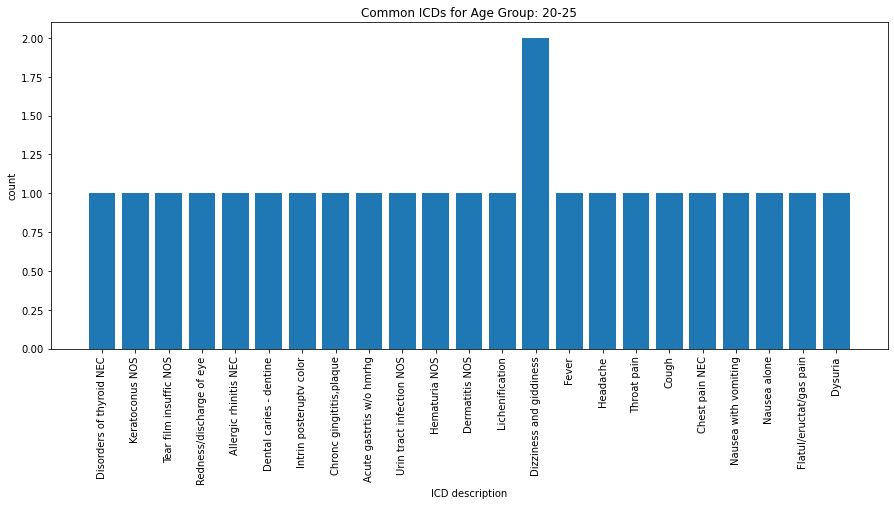

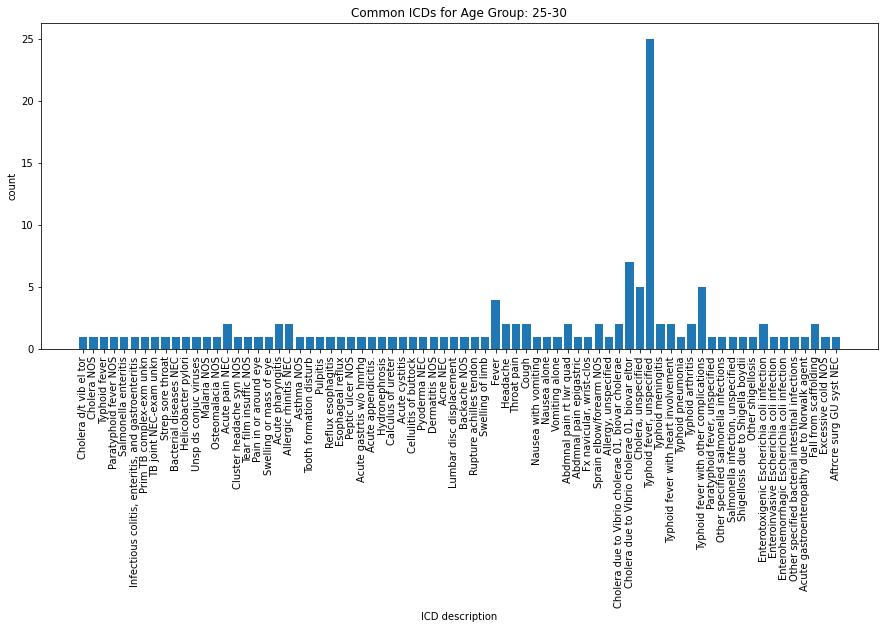

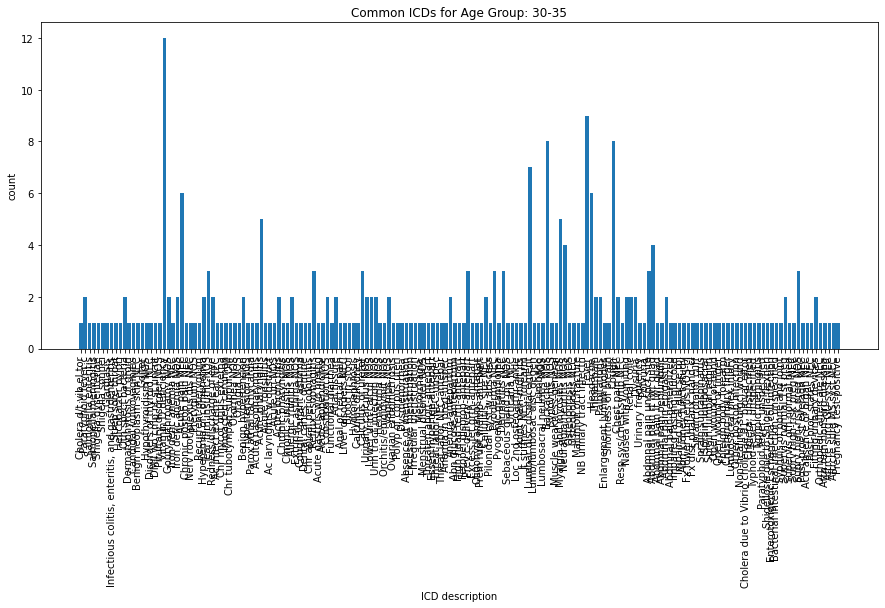

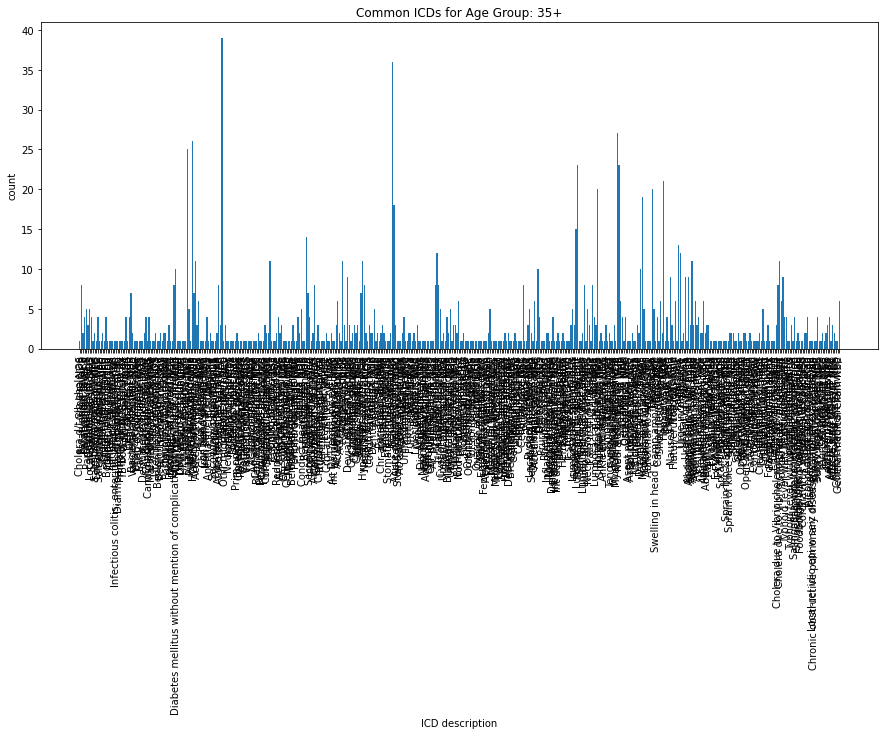

In [19]:
for age_group, group in grouped_data.groupby('age_group'):
    plt.figure(figsize=(15,6))
    
    plt.bar(group['ICDDesc'], group['count'])
    plt.title(f'Common ICDs for Age Group: {age_group}')
    plt.xlabel('ICD description')
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()

In [20]:
exim_impacted_icd = 'A01.00'  # Replace this with the specific ICD code of interest

exim_impacted_data = df[df['ICDCode'] == exim_impacted_icd]
exim_impacted_grouped = exim_impacted_data.groupby('age_group')['PatID'].count().reset_index()
exim_impacted_grouped.rename(columns={'PatID': 'count'}, inplace=True)


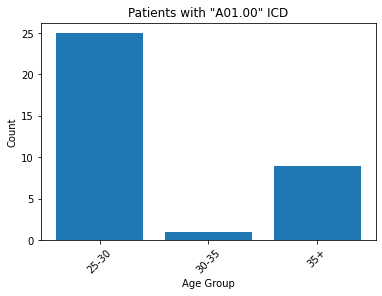

In [21]:
plt.figure()
plt.bar(exim_impacted_grouped['age_group'],exim_impacted_grouped['count'])
plt.title(f'Patients with "{exim_impacted_icd}" ICD')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()